In [1]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]

In [4]:
closure  = False
groomed = False

In [5]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [7]:
with open('latest_pkl/pythia_0503.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/data_combined.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/herwig_all.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_1701.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk.pkl', "rb") as f:
    output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_pythia['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_pythia['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']

In [8]:



reco_mass =18131231
gen_mass =16123123
start_mass = 0

# resp_matrix_4d = resp_matrix_4d[:, :, hist.rebin(2), :, :, :]
# input_data = input_data[:,  :, hist.rebin(2), ...]
# fakes = fakes[:,  :, hist.rebin(2), ...]
# misses = misses[:,  :, :, ...]
# hist_bg = hist_bg[:,  :, hist.rebin(2), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.rebin(2), :,: , ...]
# fakes_herwig = fakes_herwig[:,  :, hist.rebin(2), ...]
# misses_herwig = misses_herwig[:,  :, :, ...]



# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :, hist.loc(start_mass):hist.loc(gen_mass), :]
# input_data = input_data[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# fakes = fakes[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# misses = misses[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass) :hist.loc(gen_mass), :]
# input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]

resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass)+1, :,hist.loc(start_mass) :hist.loc(gen_mass)+1, :]
input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass)+1, ...]
hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
#resp_matrix_pythia = resp_matrix_pythia 
resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass)+1, :,hist.loc(start_mass): hist.loc(gen_mass)+1, ...]
fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass)+1, ...]





# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass):, :, hist.loc(start_mass):, :]
# input_data = input_data[:,  :, hist.loc(start_mass):, ...]
# fakes = fakes[:,  :, hist.loc(start_mass):, ...]
# misses = misses[:,  :,hist.loc(start_mass) :, ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):, ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass) :, :]
# input_data = input_data[:,  :,hist.loc(start_mass) :, ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :, ...]
# misses = misses[:,  :, hist.loc(start_mass):, ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :, ...]




In [9]:
resp_matrix_4d.axes['mreco'].edges

array([0.0e+00, 2.5e+00, 5.0e+00, 7.5e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       3.0e+01, 4.0e+01, 5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01,
       1.0e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02,
       1.7e+02, 1.8e+02, 1.9e+02, 2.0e+02, 6.2e+03, 1.3e+04])

In [10]:
resp_matrix_4d.axes['mgen'].edges

array([0.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01,
       1.0e+02, 1.2e+02, 1.4e+02, 1.6e+02, 1.8e+02, 2.0e+02, 1.3e+04])

In [11]:
# edges = [0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
#        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
#        1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,    1.3e+04]

# edges_gen = [0.0e+00, 1.0e+01, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
#        1.2e+02, 1.4e+02, 1.6e+02,  200, 1.3e+04]
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# input_data = rebin_hist(input_data, 'mreco',edges)

In [12]:
# edges = [0.0e+00, 1.0e+01, 2.0e+01, 3.0e+01, 4.0e+01,
#        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02]
#         #, 1.1e+02,
#       # 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,   1.3e+04]

# edges_gen = [0.0e+00,  2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02]
#        #,1.2e+02, 1.4e+02, 1.6e+02,  1.3e+04]

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
# input_data = rebin_hist(input_data, 'mreco',edges)

In [13]:
# edges = [ 2.0e+01, 3.0e+01, 4.0e+01,
#        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 110, 120, 130, 140, 150, 160, 180, 13000]
#         #, 1.1e+02,
#       # 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,   1.3e+04]

# edges_gen = [ 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02, 120, 140, 160, 13000]
#        #,1.2e+02, 1.4e+02, 1.6e+02,  1.3e+04]

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
# input_data = rebin_hist(input_data, 'mreco',edges)

In [14]:
# edges = [0.0e+00, 1.0e+01, 2.0e+01, 4.0e+01,
#         6.0e+01, 7.0e+01, 8.0e+01,  1.0e+02, 
#        1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,   1.3e+04]

# edges_gen = [0.0e+00,  2.0e+01,  6.0e+01, 8.0e+01,
#        1.2e+02, 1.4e+02, 1.6e+02,  1.3e+04]

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
# input_data = rebin_hist(input_data, 'mreco',edges)

In [15]:
input_data.axes['mreco'].edges[:-2]

array([  0.,   5.,  10.,  15.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
        90., 100., 110., 120., 130., 140., 150., 160., 180., 200.])

In [16]:
resp_matrix_4d.axes['mgen'].edges

array([0.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01,
       1.0e+02, 1.2e+02, 1.4e+02, 1.6e+02, 1.8e+02, 2.0e+02, 1.3e+04])

In [17]:
from unfold_utils.integrate_and_rebin import *



In [18]:
from cycler import cycler

# Set tab20 as the default color cycle
tab20_colors = plt.cm.tab20.colors
plt.rcParams['axes.prop_cycle'] = cycler(color=tab20_colors)

In [19]:
ww_bg = ww16*hist_bg['ww_UL16NanoAODv9', ...].values() + ww16*hist_bg['ww_UL16NanoAODAPVv9', ...].values() + ww17*hist_bg['ww_UL17NanoAODv9', ...].values() + ww18*hist_bg['ww_UL18NanoAODv9', ...].values() ,   # WW
wz_bg = wz16*hist_bg['wz_UL16NanoAODv9', ...].values() + wz16*hist_bg['wz_UL16NanoAODAPVv9', ...].values() + wz17*hist_bg['wz_UL17NanoAODv9', ...].values() + wz18*hist_bg['wz_UL18NanoAODv9', ...].values(),      # WZ
zz_bg = zz16*hist_bg['zz_UL16NanoAODv9', ...].values() + zz16*hist_bg['zz_UL16NanoAODAPVv9', ...].values() + zz17*hist_bg['zz_UL17NanoAODv9', ...].values() + zz18*hist_bg['zz_UL18NanoAODv9', ...].values(),     # zz

input_data.values().shape
reshape_value = input_data.values().shape[1]* input_data.values().shape[2]

ww_bg = ww_bg[0].reshape(reshape_value)
wz_bg = wz_bg[0].reshape(reshape_value)
zz_bg = zz_bg[0].reshape(reshape_value)

In [20]:
ptreco_center = resp_matrix_4d.axes['ptreco'].centers
ptreco_width = resp_matrix_4d.axes['ptreco'].widths
ptreco_edge = resp_matrix_4d.axes['ptreco'].edges

ptgen_center = resp_matrix_4d.axes['ptgen'].centers
ptgen_width = resp_matrix_4d.axes['ptgen'].widths
ptgen_edge = resp_matrix_4d.axes['ptgen'].edges
mreco_center = resp_matrix_4d.axes['mreco'].centers
mreco_edge = resp_matrix_4d.axes['mreco'].edges
mgen_center = resp_matrix_4d.axes['mgen'].centers

mreco_width = resp_matrix_4d.axes['mreco'].widths
mgen_width = resp_matrix_4d.axes['mgen'].widths
mgen_edge = resp_matrix_4d.axes['mgen'].edges

In [21]:
correlation_dic = {
    'JES_AbsoluteMPFBias': 1,
    'JES_AbsoluteScale': 1,
    'JES_AbsoluteStat': 0,
    'JES_FlavorQCD': 1,
    'JES_Fragmentation': 1,
    'JES_PileUpDataMC': 0.5,
    'JES_PileUpPtBB': 0.5,
    'JES_PileUpPtEC1': 0.5,
    'JES_PileUpPtEC2': 0.5,
    'JES_PileUpPtHF': 0.5,
    'JES_PileUpPtRef': 0.5,
    'JES_RelativeFSR': 0.5,
    'JES_RelativeJEREC1': 0,
    'JES_RelativeJEREC2': 0,
    'JES_RelativeJERHF': 0.5,
    'JES_RelativePtBB': 0.5,
    'JES_RelativePtEC1': 0,
    'JES_RelativePtEC2': 0,
    'JES_RelativePtHF': 0.5,
    'JES_RelativeBal': 0.5,
    'JES_RelativeSample': 0,
    'JES_RelativeStatEC': 0,
    'JES_RelativeStatFSR': 0,
    'JES_RelativeStatHF': 0,
    'JES_SinglePionECAL': 1,
    'JES_SinglePionHCAL': 1,
    'JES_TimePtEta': 0
}

jes_sys_list = ['JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown',
                'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
                'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown',
                'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
                'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up',
                'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
                'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down',
                'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 
                'JES_RelativeStatECUp', 'JES_RelativeStatECDown', 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
                'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']


non_jes_sys_list = ['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown',
                    'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp',
                    'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp',
                    'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 
                    'JERUp', 'JERDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']


non_jes_sys_list_up = [sys for sys in non_jes_sys_list if sys[-2:] == 'Up' ]
non_jes_sys_list_down = [sys for sys in non_jes_sys_list if sys[-4:] == 'Down' ]

jes_sys_list_up = [sys for sys in jes_sys_list if sys[-2:] == 'Up' ]
jes_sys_list_down = [sys for sys in jes_sys_list if sys[-4:] == 'Down' ]

In [22]:
sys_matrix_dic = {}

for sys in jes_sys_list_up:
    m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    
    m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
    m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
    m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
    
    rho = 0.5 ## correlation factor
    
    sigma_2016 = m_sys_2016 - m_nom_2016
    sigma_2017 = m_sys_2017 - m_nom_2017
    sigma_2018 = m_sys_2018 - m_nom_2018
    
    sigma_corr = rho*sigma_2016 + rho*sigma_2017 + rho*sigma_2018
    
    sigma_uncorr_2016 = (1-rho)*sigma_2016
    sigma_uncorr_2017 = (1-rho)*sigma_2017
    sigma_uncorr_2018 = (1-rho)*sigma_2018
    
    m_nom =  m_nom_2016 + m_nom_2017 + m_nom_2018
    m_corr = m_nom + sigma_corr
    
    m_uncorr_2016 = m_nom + sigma_uncorr_2016
    
    m_uncorr_2017 = m_nom + sigma_uncorr_2017

    m_uncorr_2018 = m_nom + sigma_uncorr_2018

    

    sys_matrix_dic[sys+'_corr'] = m_corr
    sys_matrix_dic[sys+'_uncorr_2016'] = m_uncorr_2016
    sys_matrix_dic[sys+'_uncorr_2017'] = m_uncorr_2017
    sys_matrix_dic[sys+'_uncorr_2018'] = m_uncorr_2018
    
non_jes_sys_matrix_dic = {}
for sys in non_jes_sys_list_up:
    sys_matrix_dic[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()
    non_jes_sys_matrix_dic[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()



sys_matrix_dic_down = {}
for sys in jes_sys_list_down:
    m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    
    m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
    m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
    m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
    
    rho = 0.5 ## correlation factor
    
    sigma_2016 = m_sys_2016 - m_nom_2016
    sigma_2017 = m_sys_2017 - m_nom_2017
    sigma_2018 = m_sys_2018 - m_nom_2018
    
    sigma_corr = rho*sigma_2016 + rho*sigma_2017 + rho*sigma_2018
    
    sigma_uncorr_2016 = (1-rho)*sigma_2016
    sigma_uncorr_2017 = (1-rho)*sigma_2017
    sigma_uncorr_2018 = (1-rho)*sigma_2018
    
    m_nom =  m_nom_2016 + m_nom_2017 + m_nom_2018
    m_corr = m_nom + sigma_corr
    
    m_uncorr_2016 = m_nom + sigma_uncorr_2016
    
    m_uncorr_2017 = m_nom + sigma_uncorr_2017

    m_uncorr_2018 = m_nom + sigma_uncorr_2018

    

    sys_matrix_dic_down[sys+'_corr'] = m_corr
    sys_matrix_dic_down[sys+'_uncorr_2016'] = m_uncorr_2016
    sys_matrix_dic_down[sys+'_uncorr_2017'] = m_uncorr_2017
    sys_matrix_dic_down[sys+'_uncorr_2018'] = m_uncorr_2018
    

for sys in non_jes_sys_list_down:
    sys_matrix_dic_down[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()


KeyError: "'JES_AbsoluteMPFBiasUp' not in axis"

In [23]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolder = Unfolder(input_data, 
                    resp_matrix_4d[{'systematic':'nominal'}] ,
                    #resp_matrix_4d_jk,
                    fakes = fakes,
                    misses = misses,
                    #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    #systematics = sys_matrix_dic,
                    systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = 1,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )
# output_nominal, matrix_plot = unfold_using_matrix(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
#                             backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
#                             #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
#                             systematics = sys_matrix_dic,
#                             closure = closure,
#                             groomed = groomed,
#                             is_uf = True,
#                             merge = False,
#                             normalised_xs = True,
#                             do_syst = True,
#                             discard_low_bins = False,
#                             regularisation= 'ScanSURE',
#                             plot = True
#                                     )

#unfolder.plot_response_matrix()

13
[0.0e+00 5.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02
 1.4e+02 1.6e+02 1.8e+02 2.0e+02 1.3e+04]
26
[0.0e+00 2.5e+00 5.0e+00 7.5e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01
 5.0e+01 6.0e+01 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02
 1.4e+02 1.5e+02 1.6e+02 1.7e+02 1.8e+02 1.9e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: divide by zero encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:175: RuntimeWarning: divide by zero encountered in divide
  self.miss_frac = self.miss_values/ ( self.M_np.sum(axis = 1))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:175: RuntimeWarning: invalid value encountered in divide
  self.miss_frac = self.miss_values/ ( self.M_np.sum(axis = 1))


/tmp/ipykernel_878/4259484642.py:6: RuntimeWarning: invalid value encountered in divide
  hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = color_pt[ipt], label = title_list[ipt])


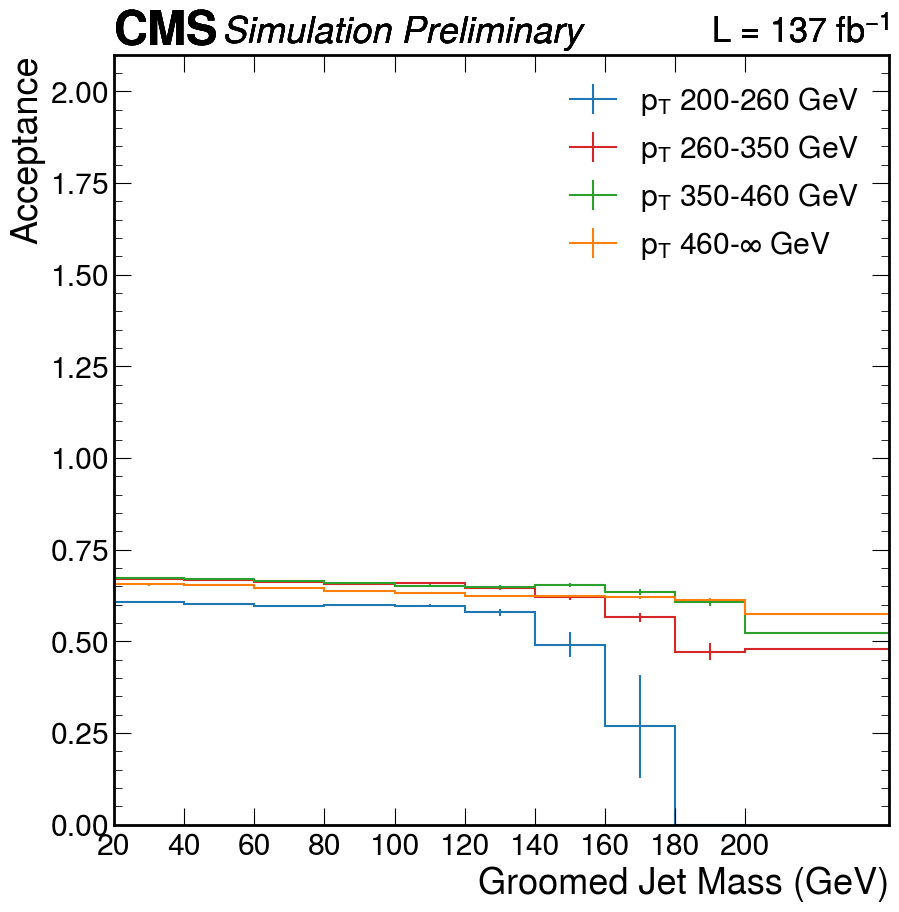

In [24]:

accepted = resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen').values()
missed = misses.project('ptgen', 'mgen').values()
accepted_unc =resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen').variances()**0.5
#mgen_edge[-1] = 240
for ipt in range(4):
    hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = color_pt[ipt], label = title_list[ipt])
    # Set x-ticks to bin edges
    xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mgen_edge, xtick_labels)
    
    plt.legend()

    if not groomed:
        plt.xlim(20,241)
        plt.xlabel("Groomed Jet Mass (GeV)")
    else:
        plt.xlim(10, 241)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    plt.ylabel("Acceptance")
    hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')

/tmp/ipykernel_878/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
/tmp/ipykernel_878/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
/tmp/ipykernel_878/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
/tmp/ipykernel_878/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accep

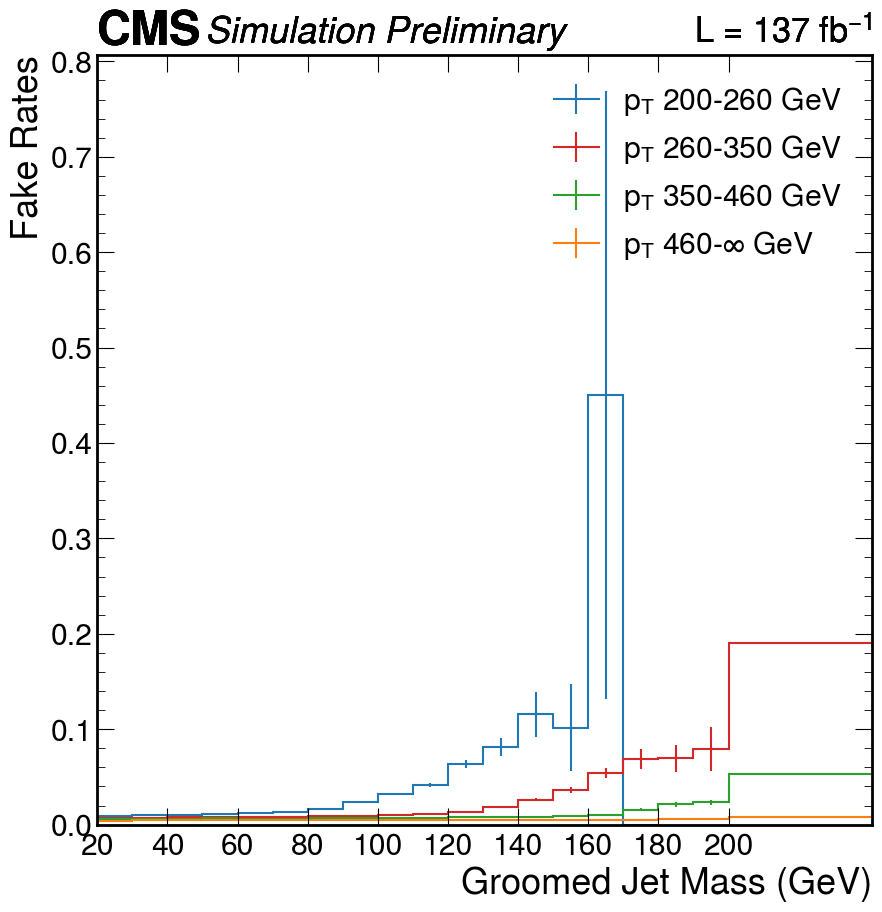

In [25]:

accepted_reco = resp_matrix_4d[{'systematic':'nominal'}].project('ptreco', 'mreco').values()
faked = fakes.project('ptreco', 'mreco').values()
faked_unc =  fakes.project('ptreco', 'mreco').variances()**0.5
# mreco_edge[-2] = 220
# mreco_edge[-1] = 240
for ipt in range(4):
    hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
    # Set x-ticks to bin edges
    xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mgen_edge, xtick_labels)
    
    plt.legend()

    if not groomed:
        plt.xlim(20,241)
        plt.xlabel("Groomed Jet Mass (GeV)")
    else:
        plt.xlim(10, 241)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    plt.ylabel("Fake Rates")
    hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')

In [26]:
mreco_edge

array([0.0e+00, 2.5e+00, 5.0e+00, 7.5e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       3.0e+01, 4.0e+01, 5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01,
       1.0e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02,
       1.7e+02, 1.8e+02, 1.9e+02, 2.0e+02, 6.2e+03, 1.3e+04])

/tmp/ipykernel_878/3504937055.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')
/tmp/ipykernel_878/3504937055.py:3: RuntimeWarning: invalid value encountered in divide
  hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = 'r', label = 'Acceptance')


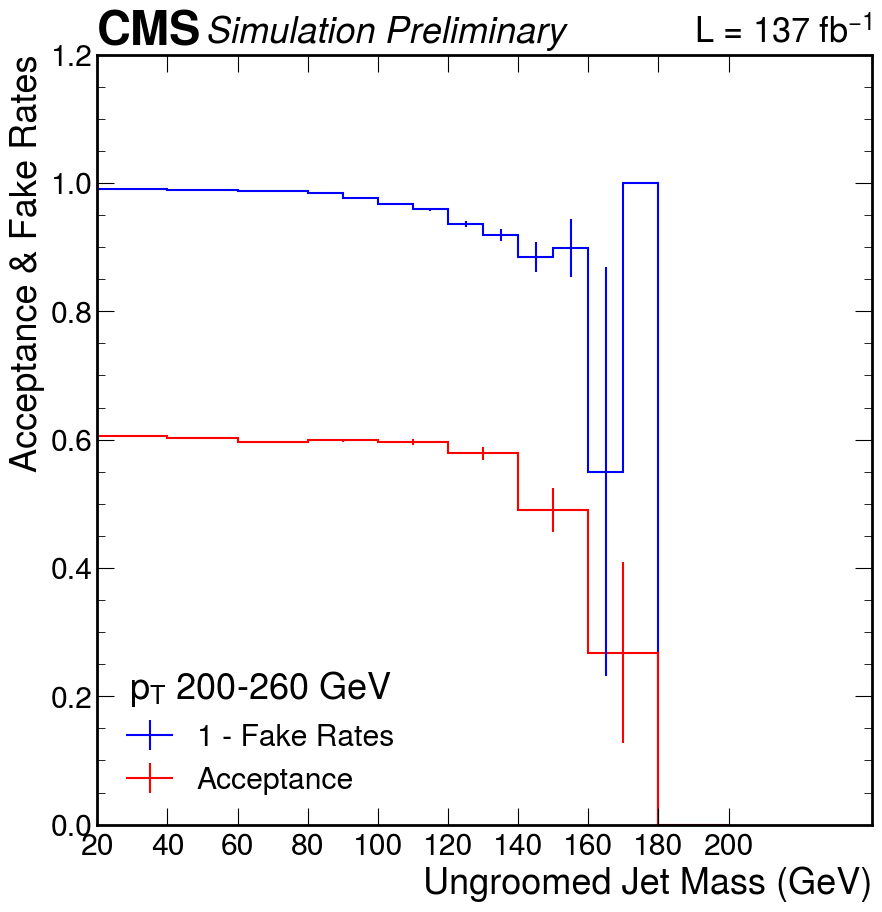

/tmp/ipykernel_878/3504937055.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')


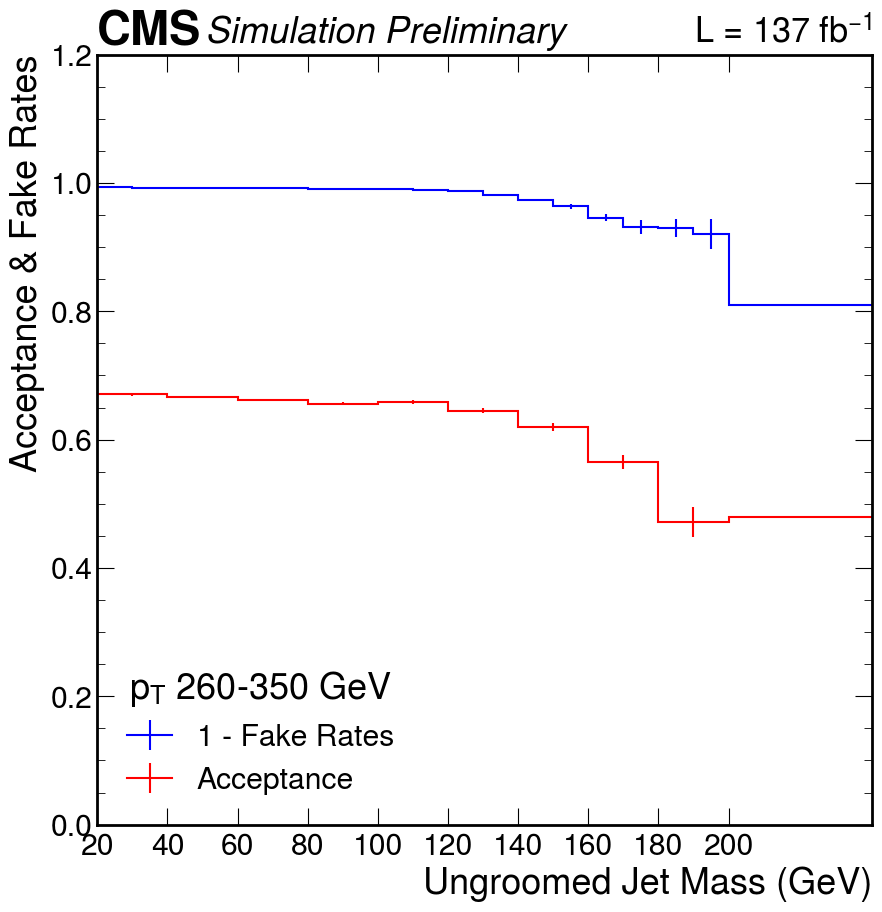

/tmp/ipykernel_878/3504937055.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')


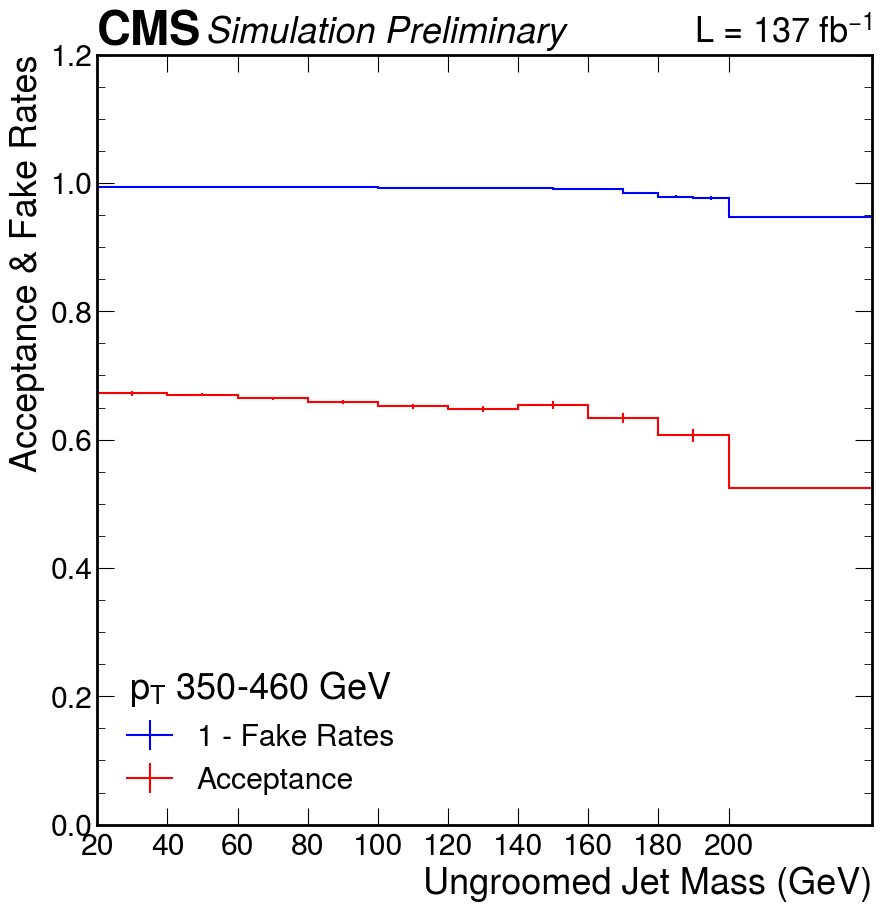

/tmp/ipykernel_878/3504937055.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')


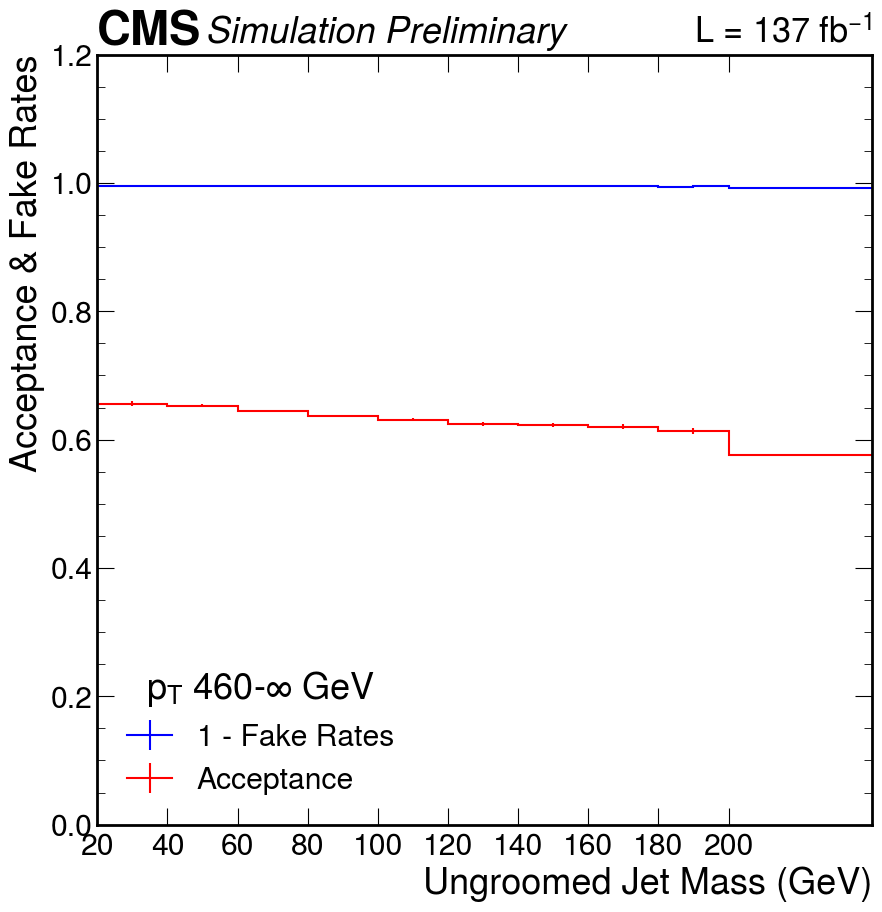

In [27]:
for ipt in range(4):
    hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')
    hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = 'r', label = 'Acceptance')

    xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mgen_edge, xtick_labels)
    
    plt.legend(title = title_list[ipt])
    if not groomed:
        plt.xlim(20,241)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    else:
        plt.xlim(10, 241)
        plt.xlabel("Groomed Jet Mass (GeV)")
    plt.ylabel("Acceptance & Fake Rates")
    plt.ylim(0, 1.2)
    hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')
    
    if groomed:
        plt.savefig(f'plots/fakerates_groomed_{ipt}.pdf')
    else:
        plt.savefig(f'plots/fakerates_ungroomed_{ipt}.pdf')

    plt.show()

In [346]:
# for ipt in range(4):
#     hep.histplot(resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'ptreco', 'mreco')[hist.underflow, : , :][ipt,:].values()/(accepted[ipt]), mreco_edge, color = color_pt[ipt], label = title_list[ipt])
#     xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
#     xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
#     plt.tick_params(axis='x', which='minor', top=False, bottom=False)

#     plt.xticks(mgen_edge, xtick_labels)
    
#     plt.legend(fontsize = 20)

#     if not groomed:
#         plt.xlim(20,241)
#         plt.xlabel("Groomed Jet Mass (GeV)")
#     else:
#         plt.xlim(10, 241)
#         plt.xlabel("Ungroomed Jet Mass (GeV)")
#     plt.ylabel("Fake Rates Due to Underflow")
#     hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')

In [347]:
# m3 = resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen', 'ptreco', 'mreco')[:,:, sum, hist.rebin(2)].values()
# plt.figure(figsize = (20, 20))
# for ipt in range(4):
#     m30 = m3[ipt]
#     plt.subplot(2, 2, ipt+1)
    
#     hep.histplot(np.diag(m3[ipt])/m3[ipt].sum(axis = 1),mgen_edge, label = 'Stability')
#     hep.histplot(np.diag(m3[ipt])/m3[ipt].sum(axis = 0),mgen_edge, label = 'Purity', color = 'r')
#     plt.xlim(20,250)
#     plt.xlabel("Ungroomed Jet Mass (GeV)")
#     plt.ylabel("Fraction")
#     plt.legend(title = title_list[ipt])
#     xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
#     xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
#     plt.tick_params(axis='x', which='minor', top=False, bottom=False)

#     plt.xticks(mgen_edge, xtick_labels)
#     #plt.show()

In [348]:
unfolder_dn = Unfolder(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #backgrounds = None,
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            systematics = sys_matrix_dic_down,
                            #systematics= None,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)


Working until background subtractions
Unfolder object created
Condition number of the matrix  7.886968552694101e+16


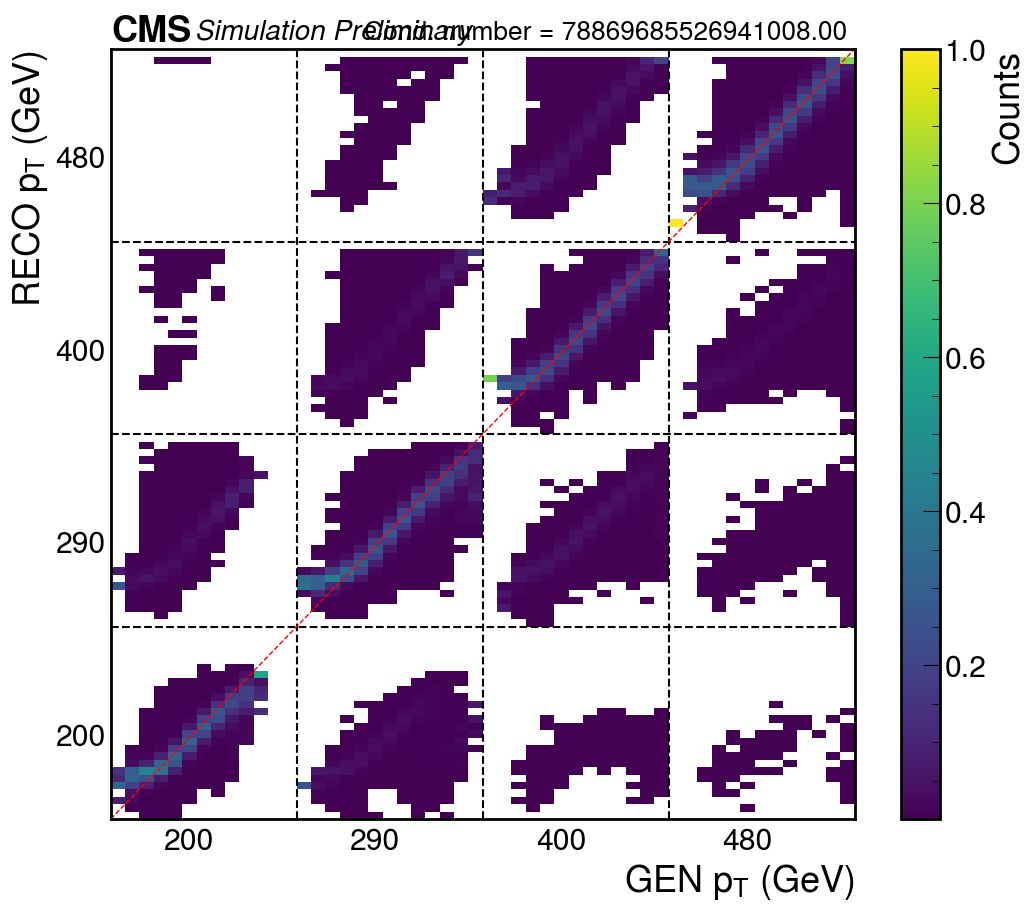

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 4 output bins do not depend on the input data  0 12-13 53
Info in <TUnfold::TUnfold>: 104 input bins and 50 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #12 (signal:ptgen[200,290]:massgen[180,200])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #13 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #53
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signa

In [30]:
unfolder.plot_response_matrix(probability_matrix=True)


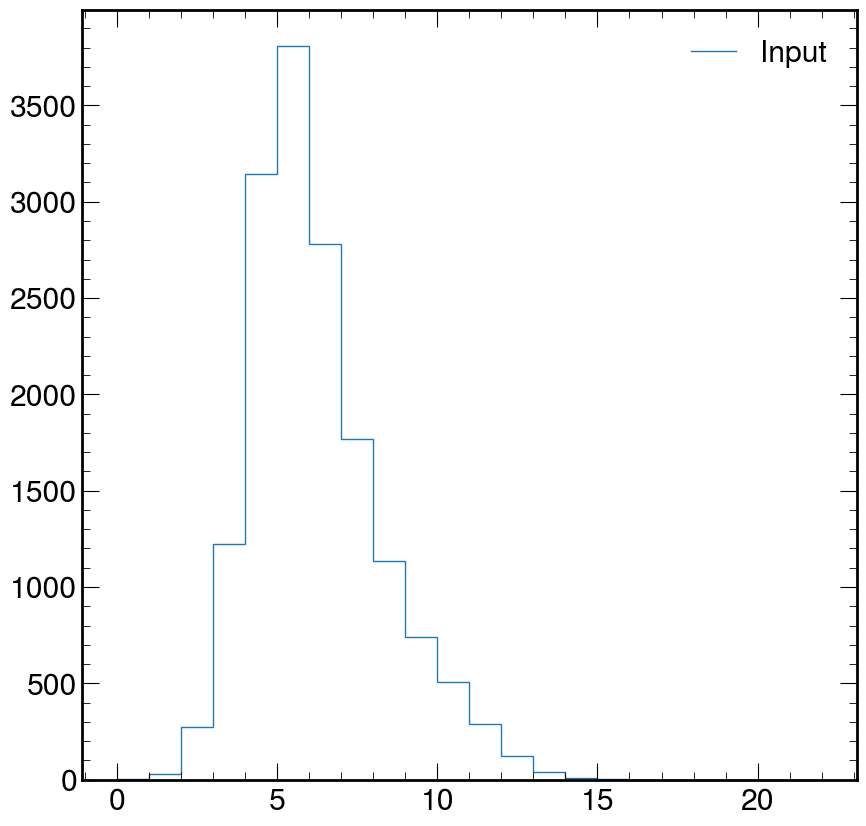

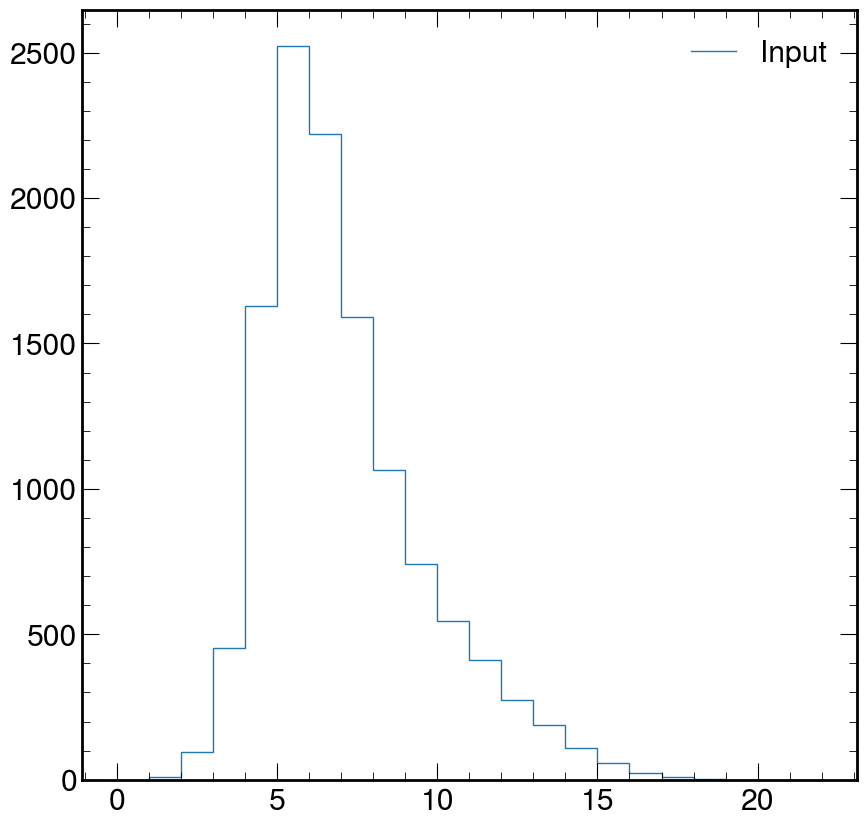

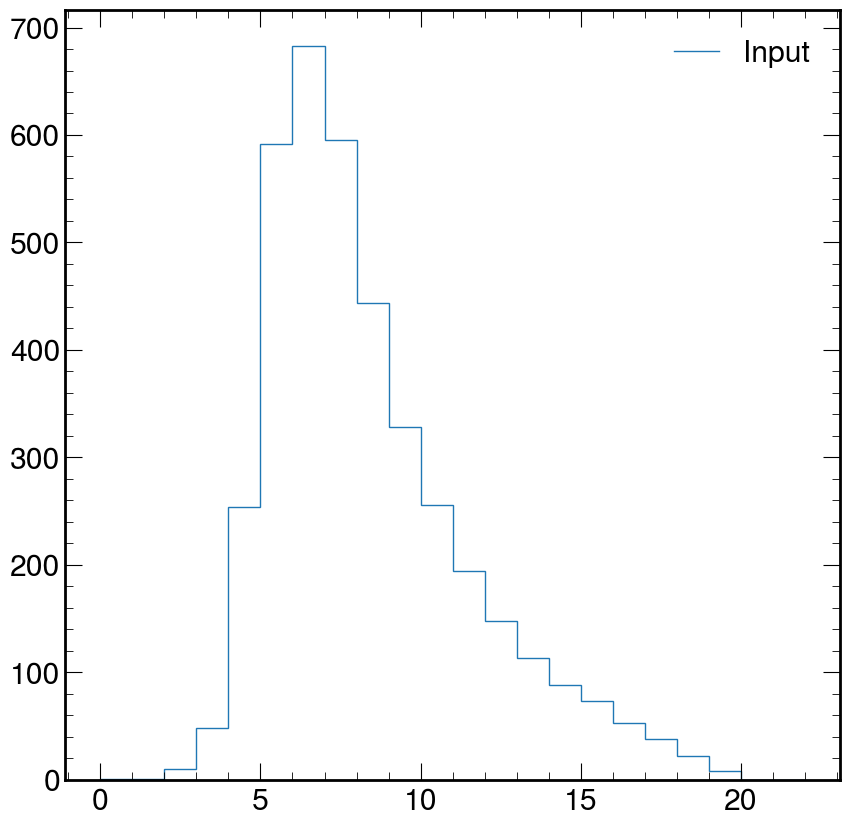

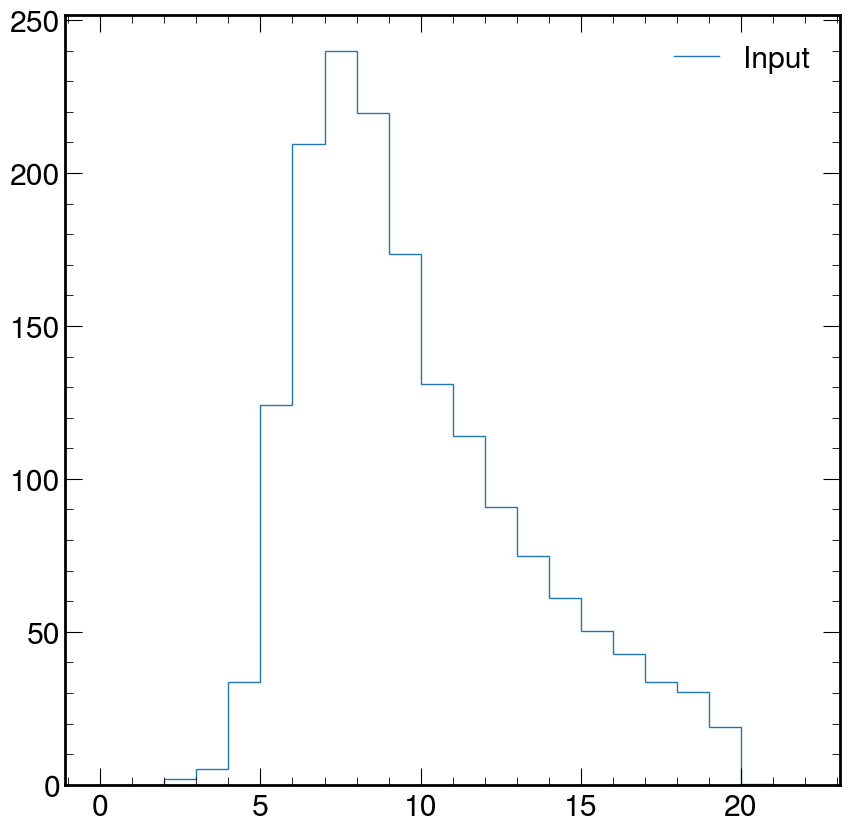

In [350]:
unfolder.plot_input()

In [351]:
len(sys_matrix_dic)

121

In [352]:
#sys_matrix_dic.pop('eletrigUp')

Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 0.008058421877614819
Output Underflow 0.0, output overflow 0.0
324932.9338379129
433022.02648405096


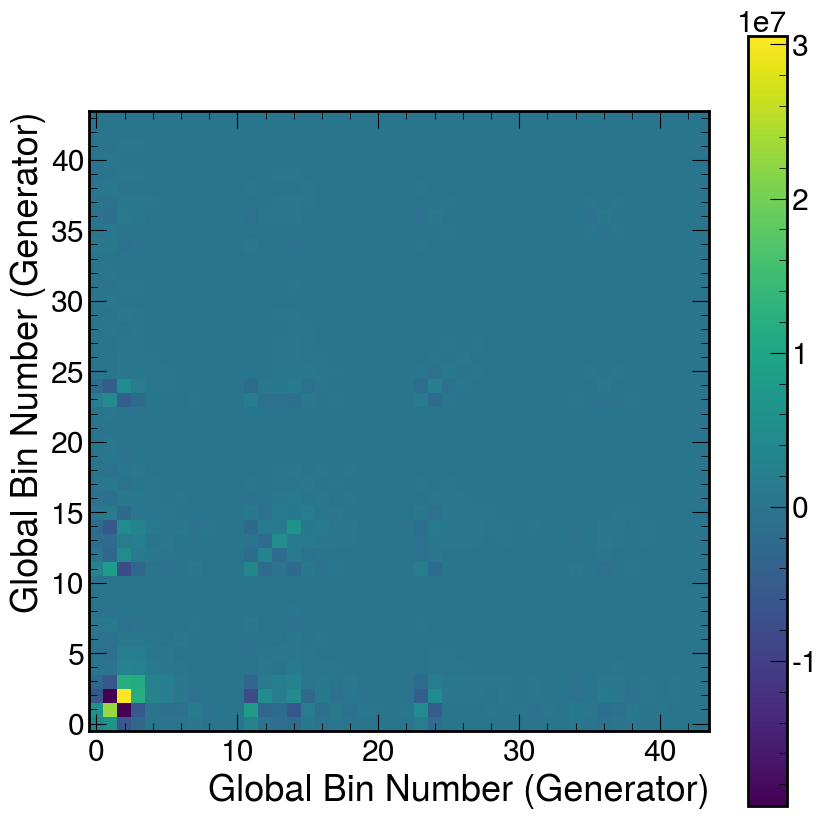

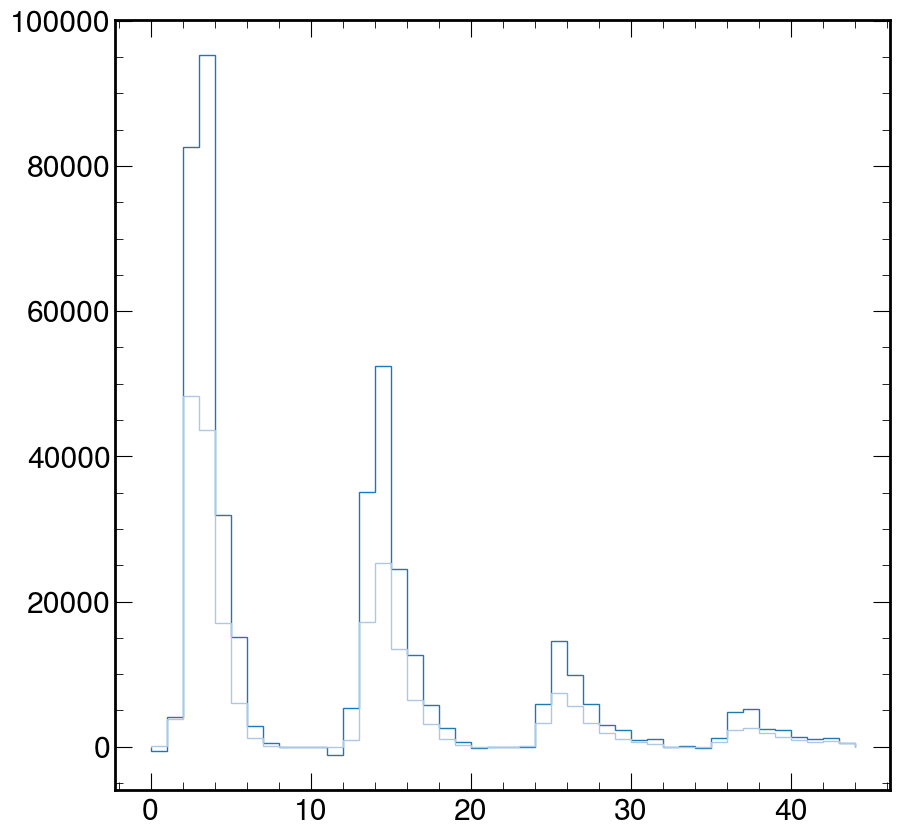

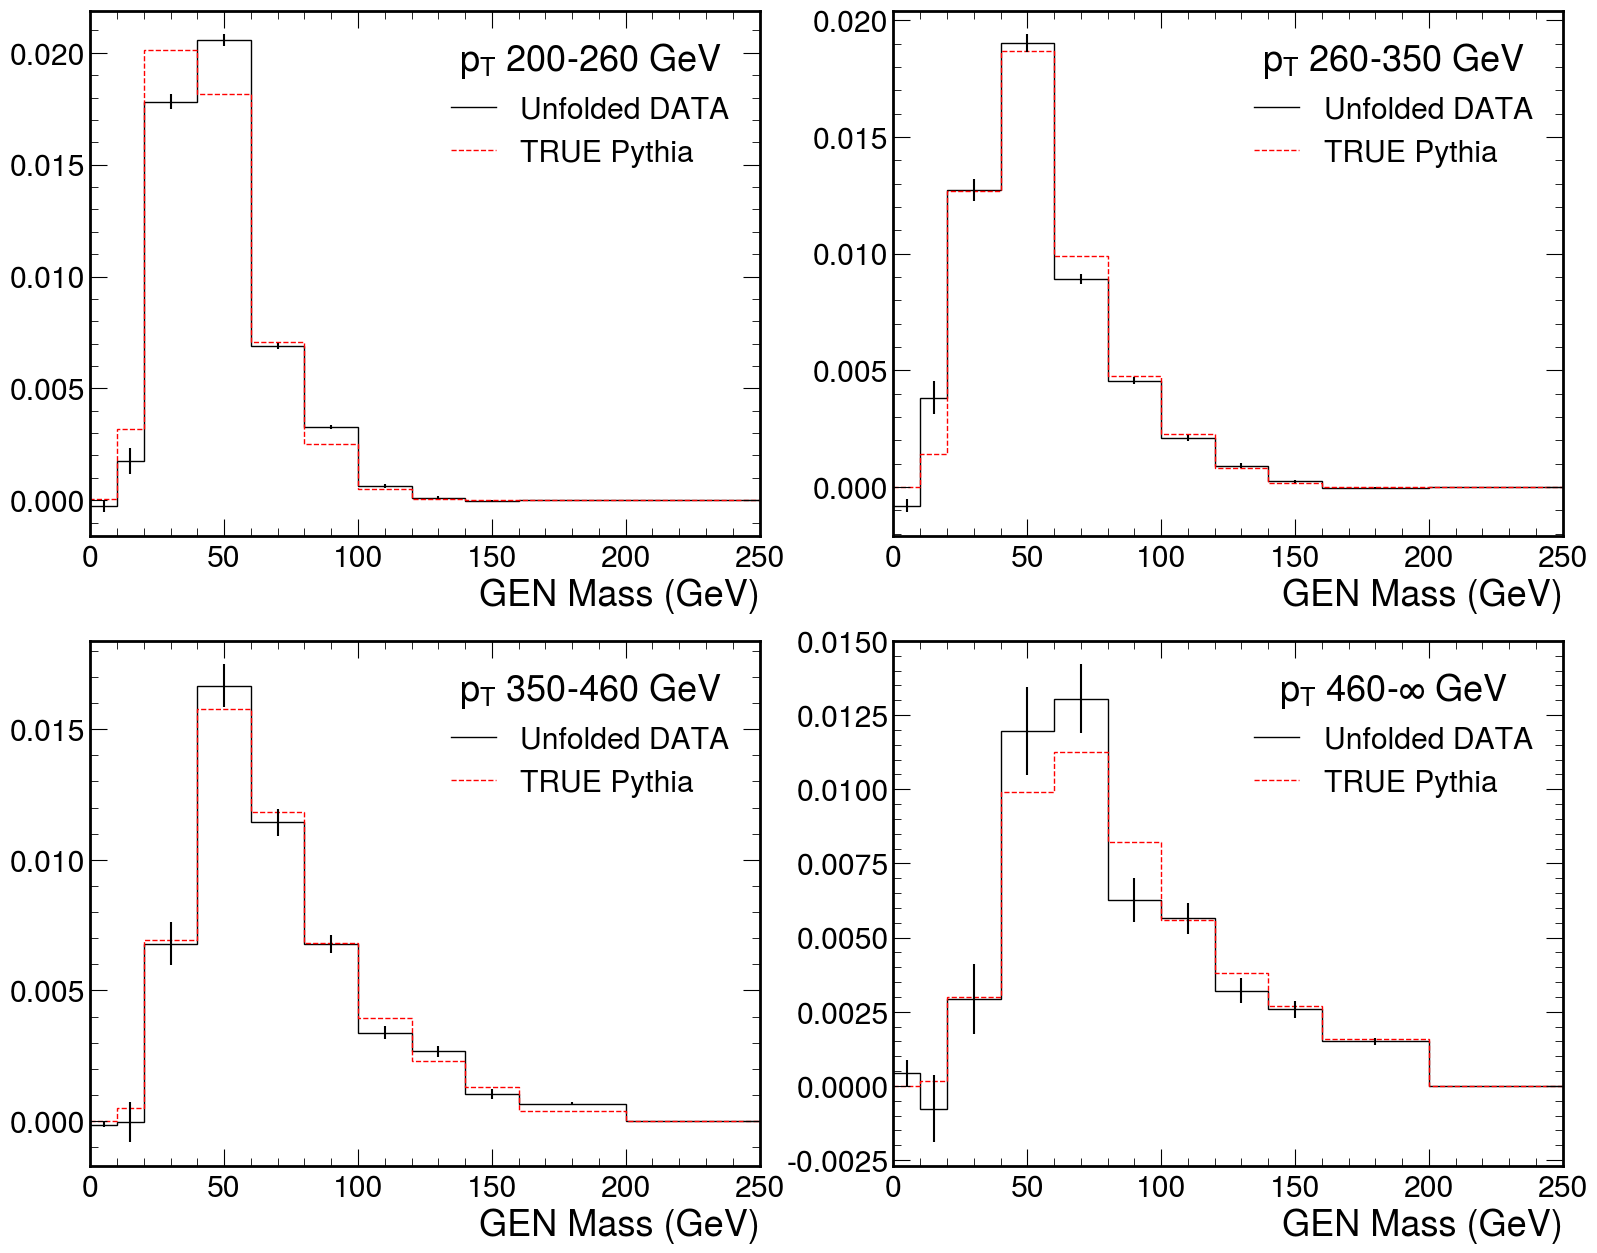

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing 

In [353]:
unfolder.perform_unfold("ScanSURE")

# Plot the covariance matrix or unfolded distributions:
unfolder.plot_covariance()
unfolder.plot_unfolded()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd624306750>, errorbar=None, legend_artist=None)]

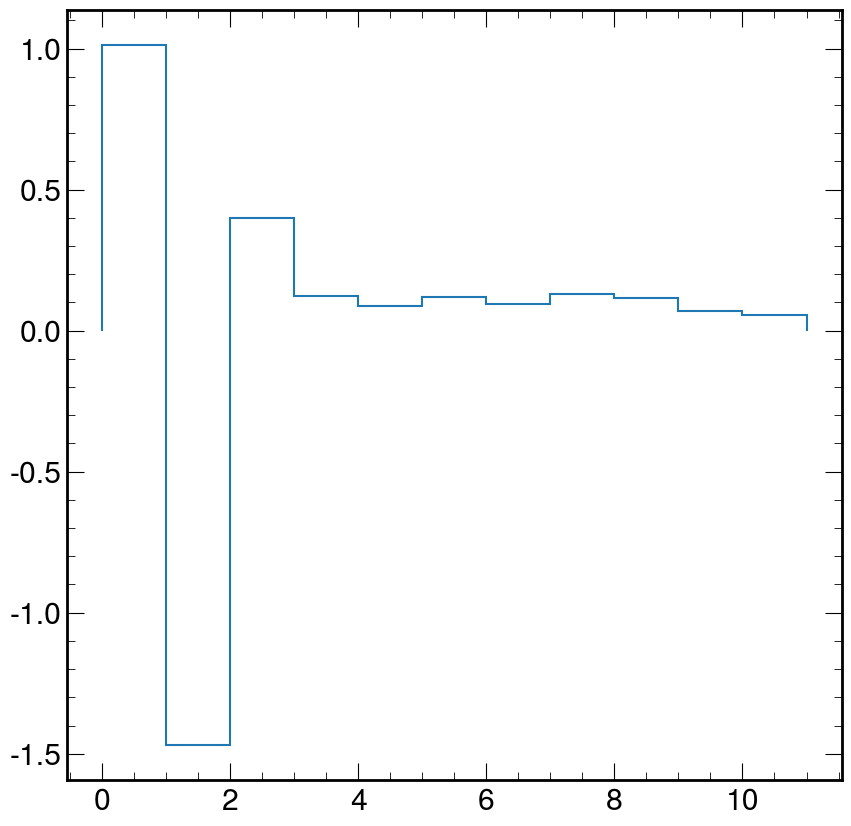

In [354]:
hep.histplot(unfolder.stat_pt_binned[ipt]/unfolder.output_pt_binned[ipt])

In [355]:
# for i in range(4):
#     plt.stairs(o_good[i],  lw = 2, label = "good cond number")
#     plt.stairs(o_bad[i]+10*i, ls = '--',  label = "bad cond number")
# plt.legend()
# plt.yscale('log')

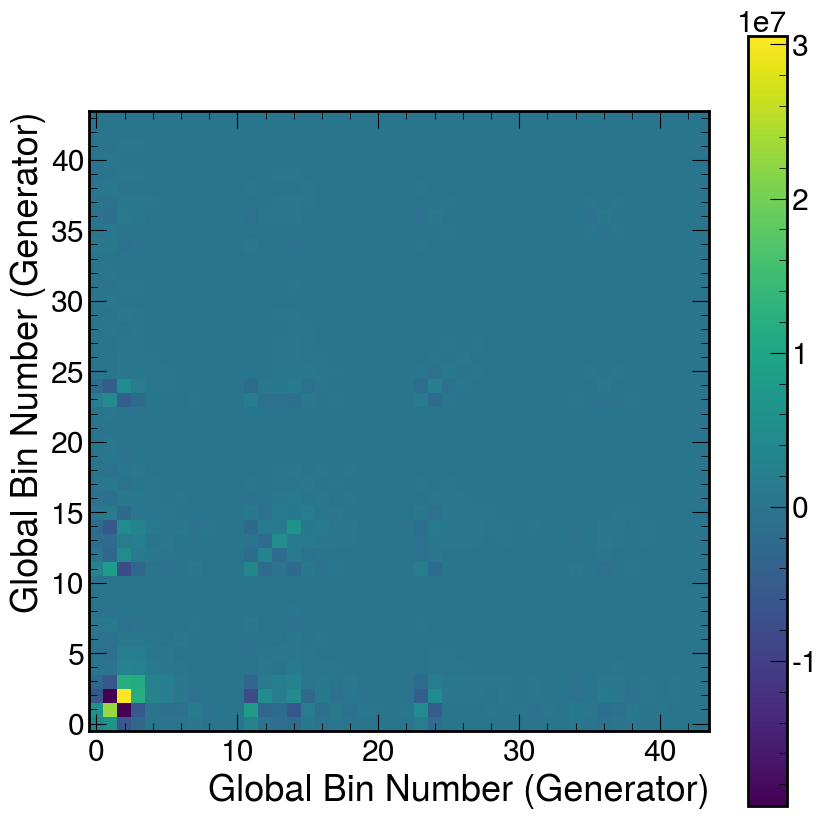

In [356]:
unfolder.plot_covariance()

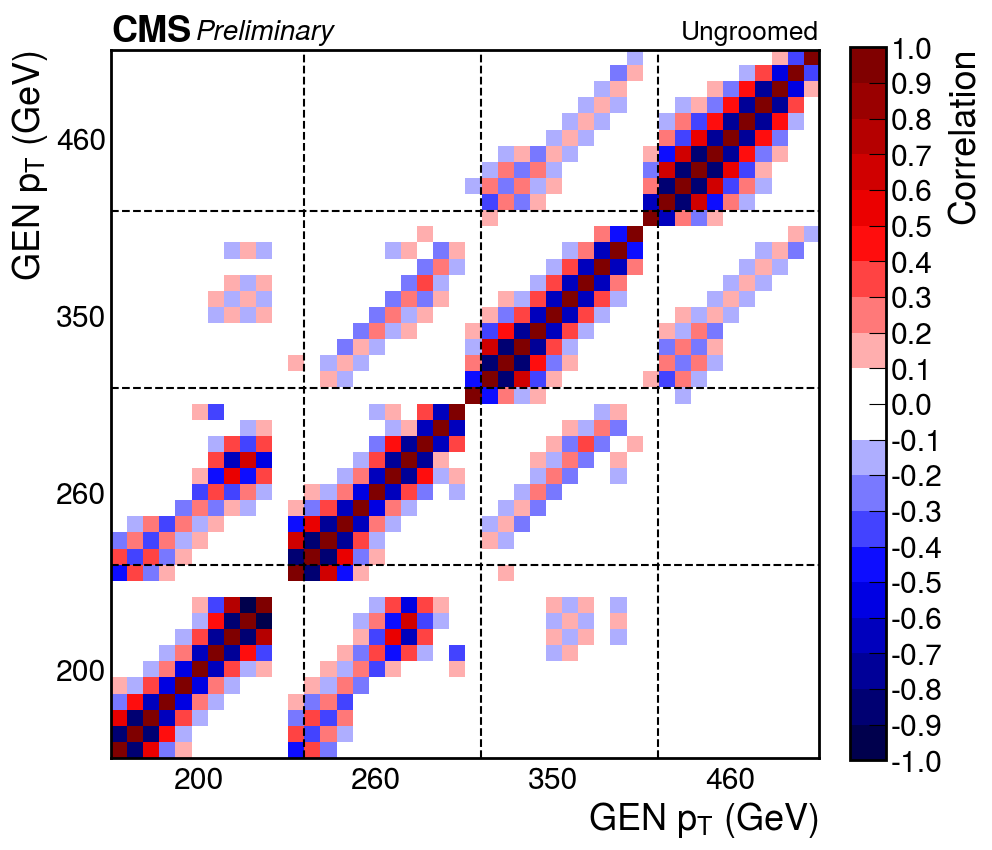

In [357]:
ax = unfolder.plot_correlation()
if groomed:
    hep.cms.label("Preliminary" , fontsize = 20, data = True, ax = ax, rlabel = "Groomed")
else:
    hep.cms.label("Preliminary" , fontsize = 20, data = True, ax = ax, rlabel = "Ungroomed")

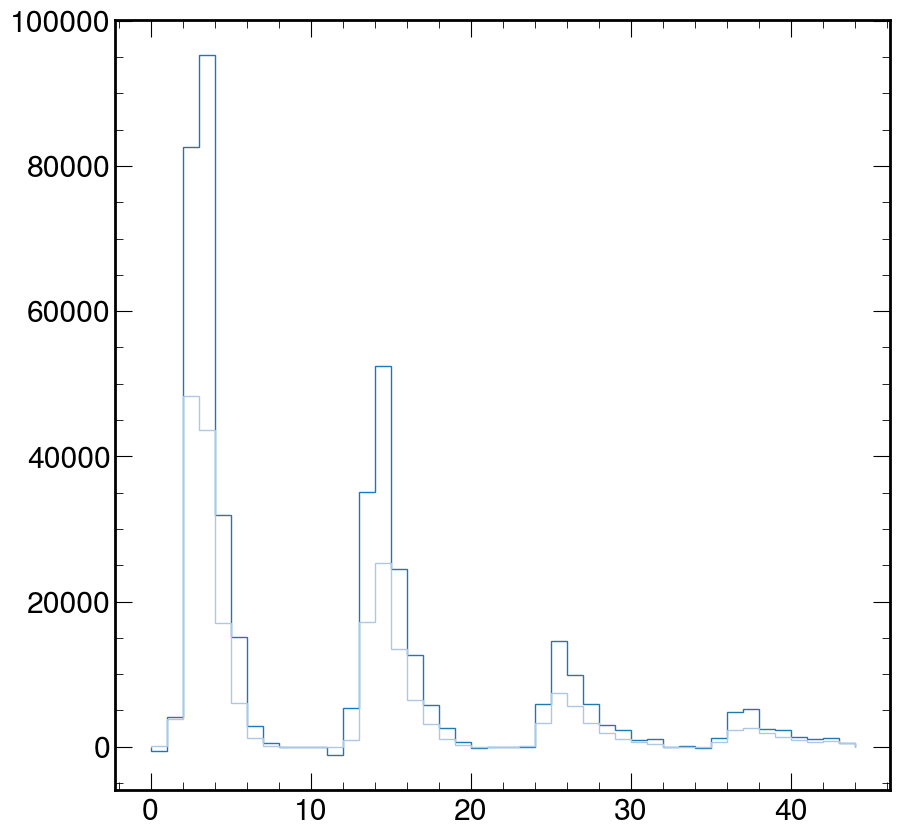

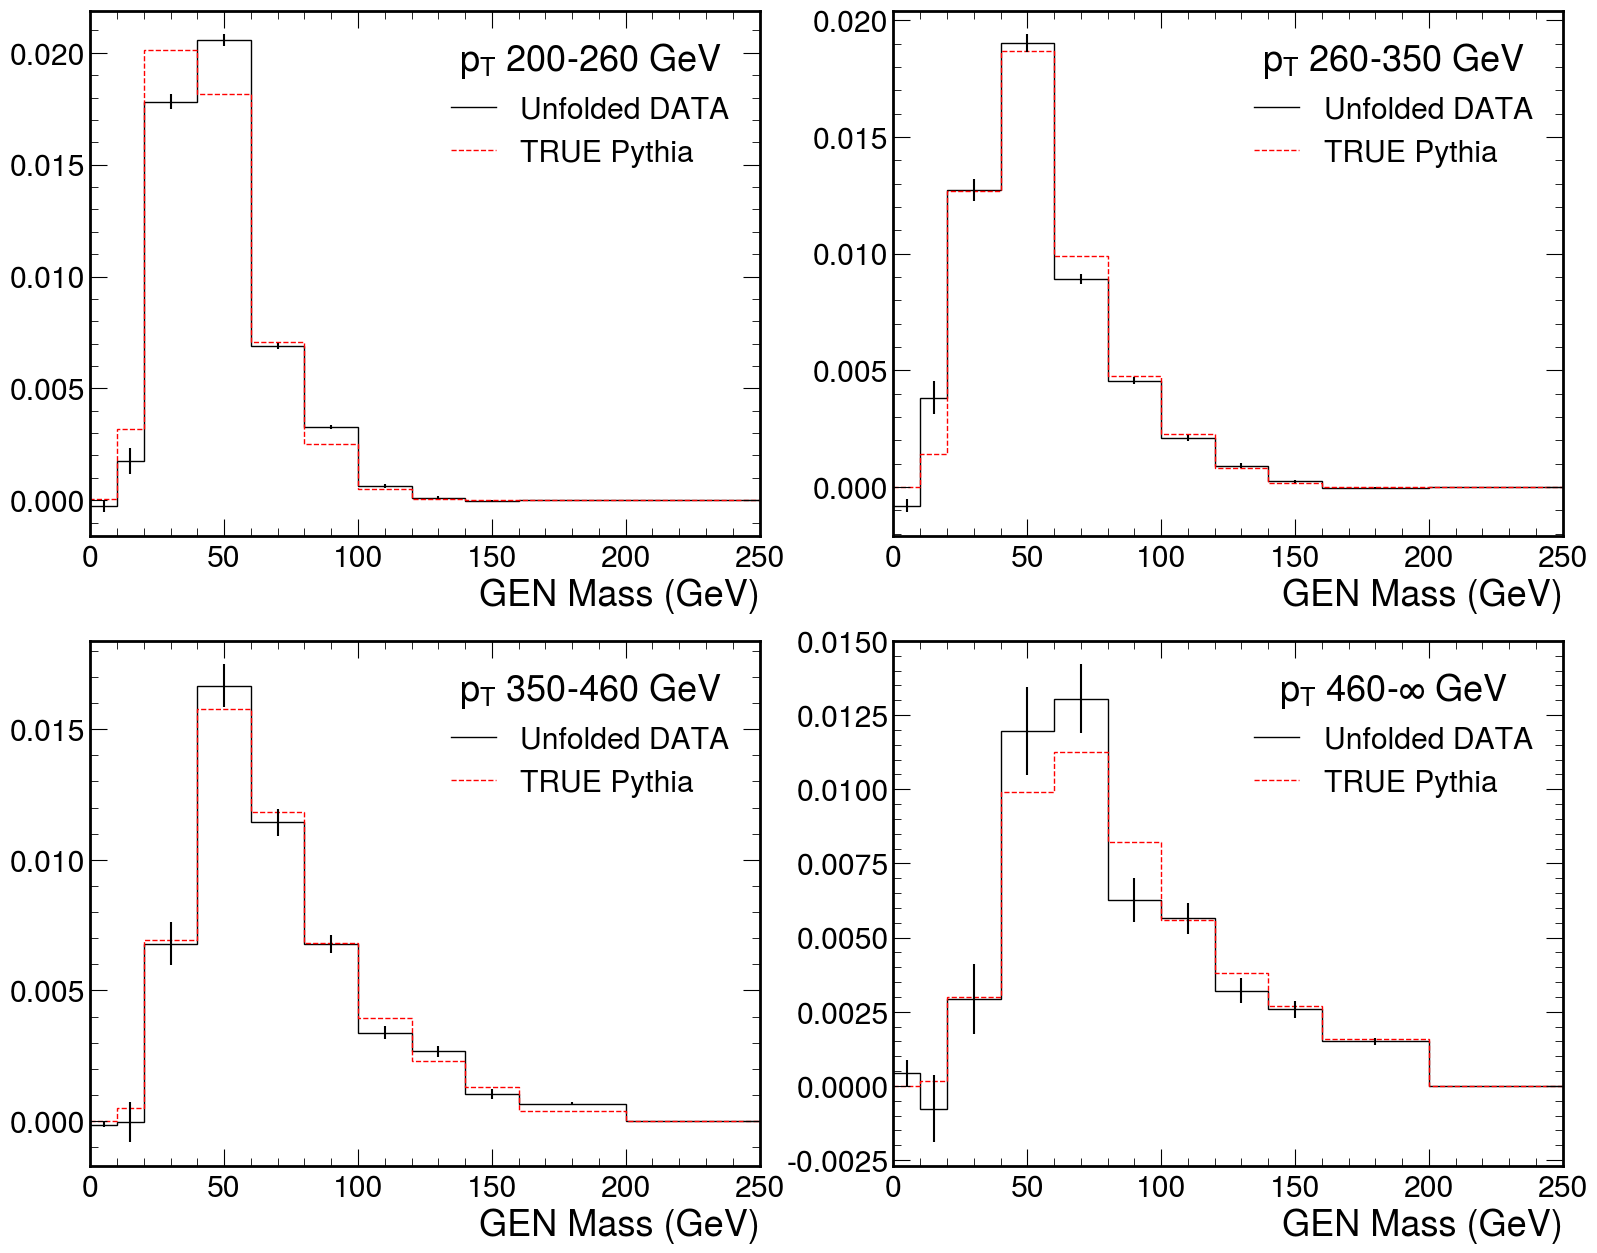

In [358]:
unfolder.plot_unfolded()

Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 0.008058421877614819
Output Underflow 0.0, output overflow 0.0
324932.9338379129
433022.02648405096


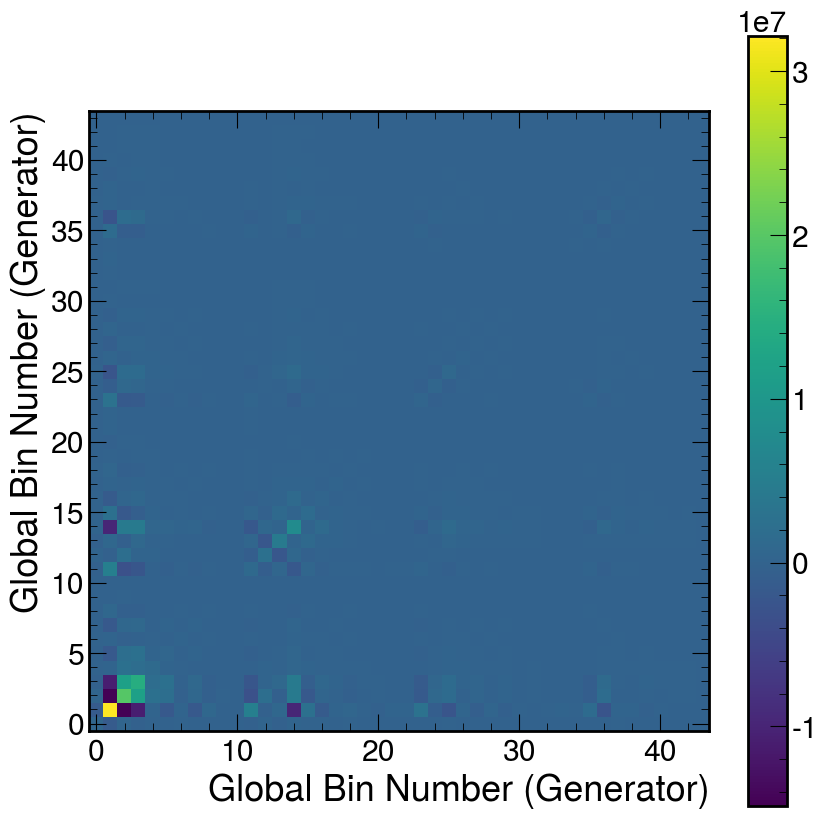

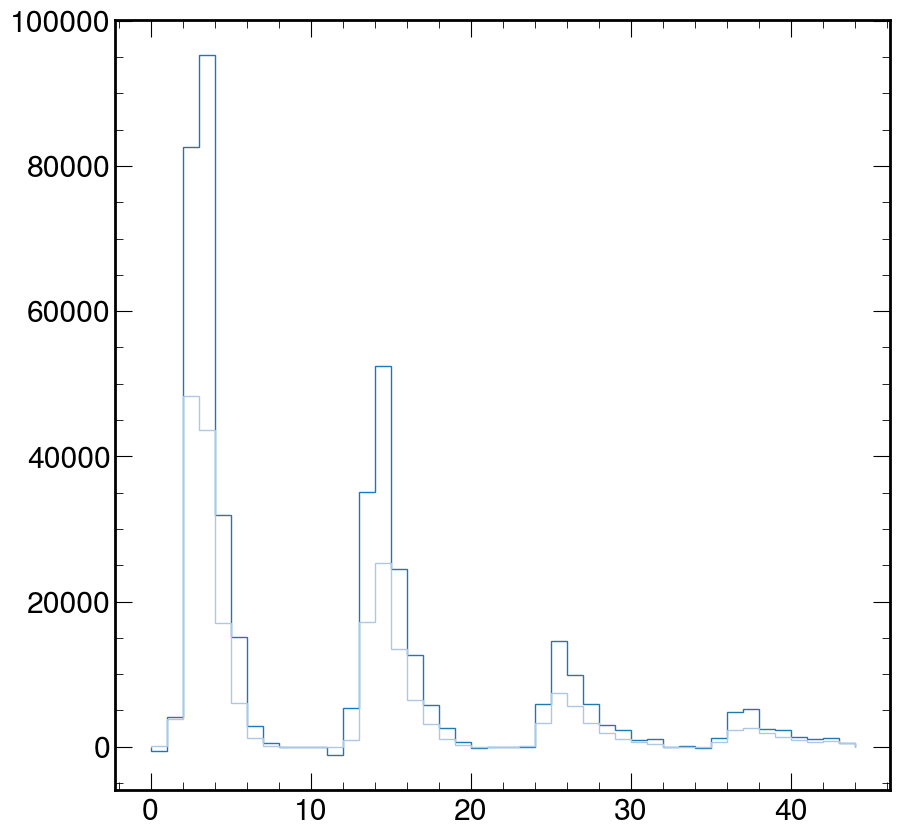

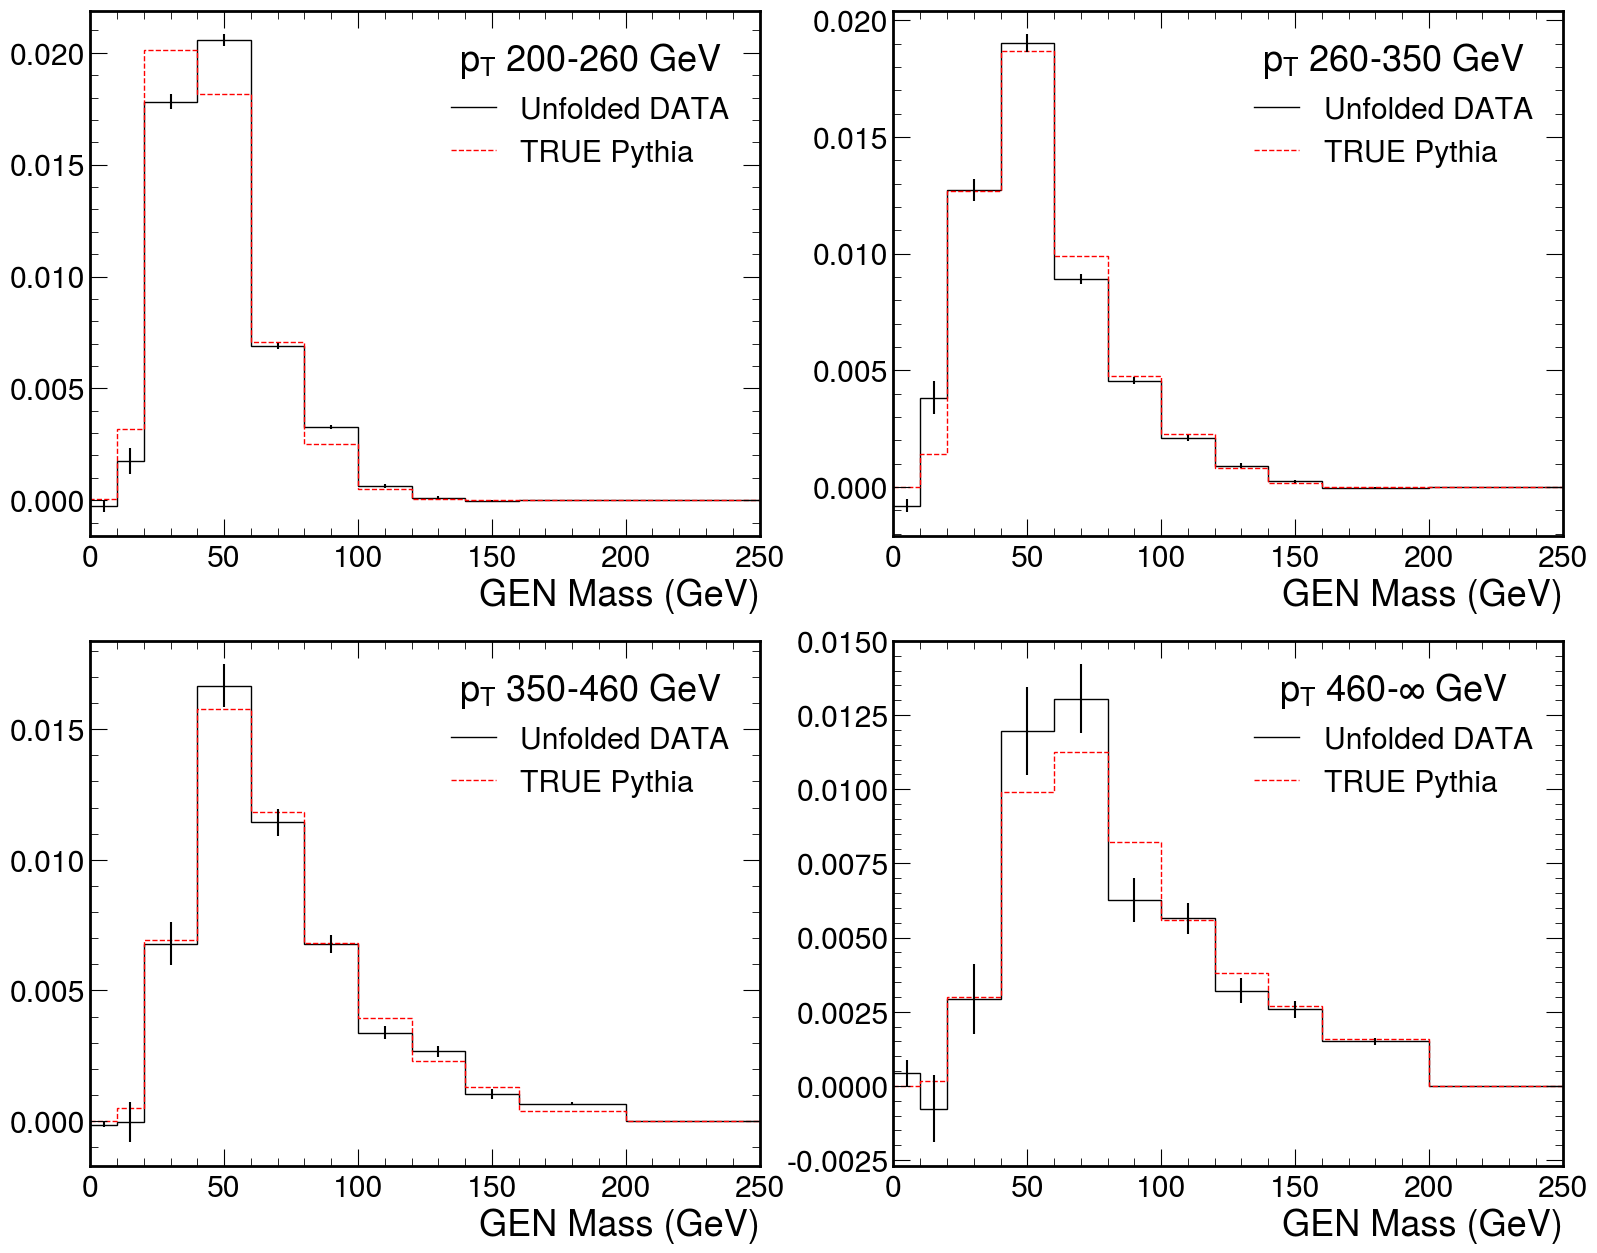

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleDown_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing

In [359]:
unfolder_dn.perform_unfold()

# Plot the covariance matrix or unfolded distributions:
unfolder_dn.plot_covariance()
unfolder_dn.plot_unfolded()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:718: RuntimeWarning: invalid value encountered in divide
  plt.stairs(np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge , label = sys )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:720: RuntimeWarning: invalid value encountered in divide
  plt.stairs(total_sys_jes[i*self.nmbinsGen  :(i+1)*self.nmbinsGen]/np.abs(self.output_pt_binned[i]), self.mgen_edge , label = "JESUp" )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:721: RuntimeWarning: invalid value encountered in divide
  plt.stairs(self.total_sys[i*self.nmbinsGen  :(i+1)*self.nmbinsGen]/np.abs(self.output_pt_binned[i]), self.mgen_edge , label = "Total" )


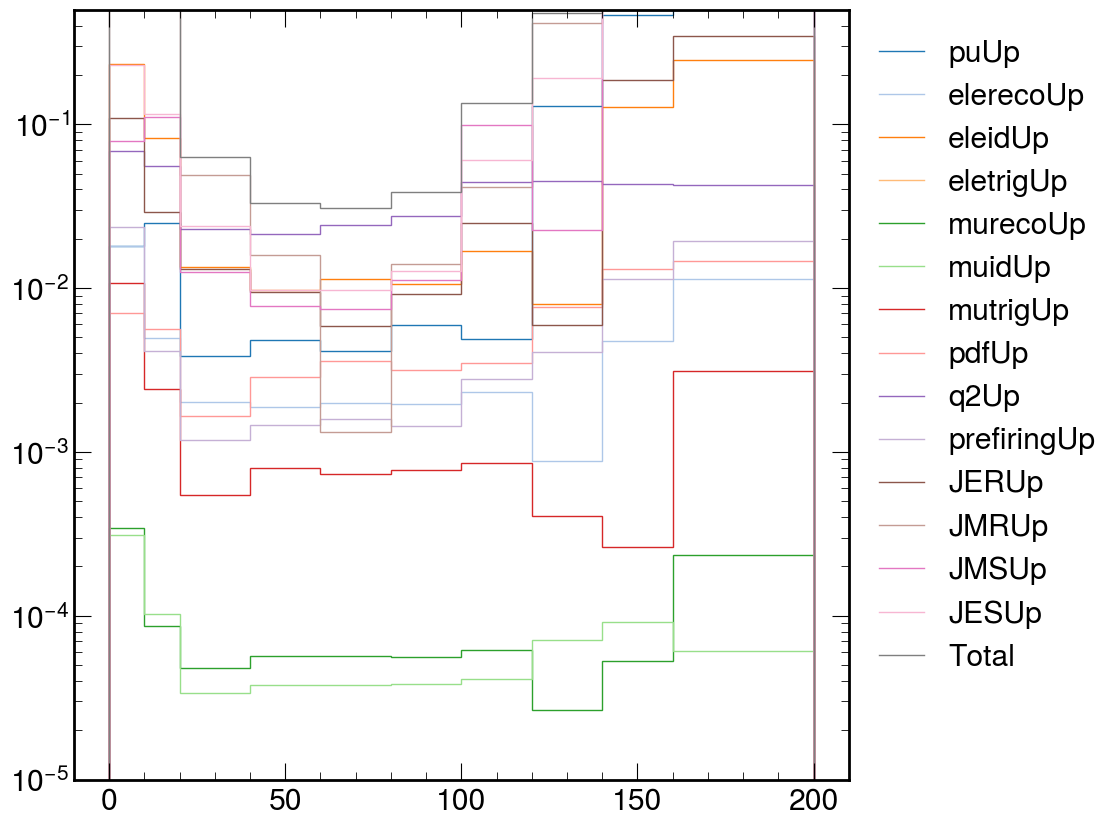

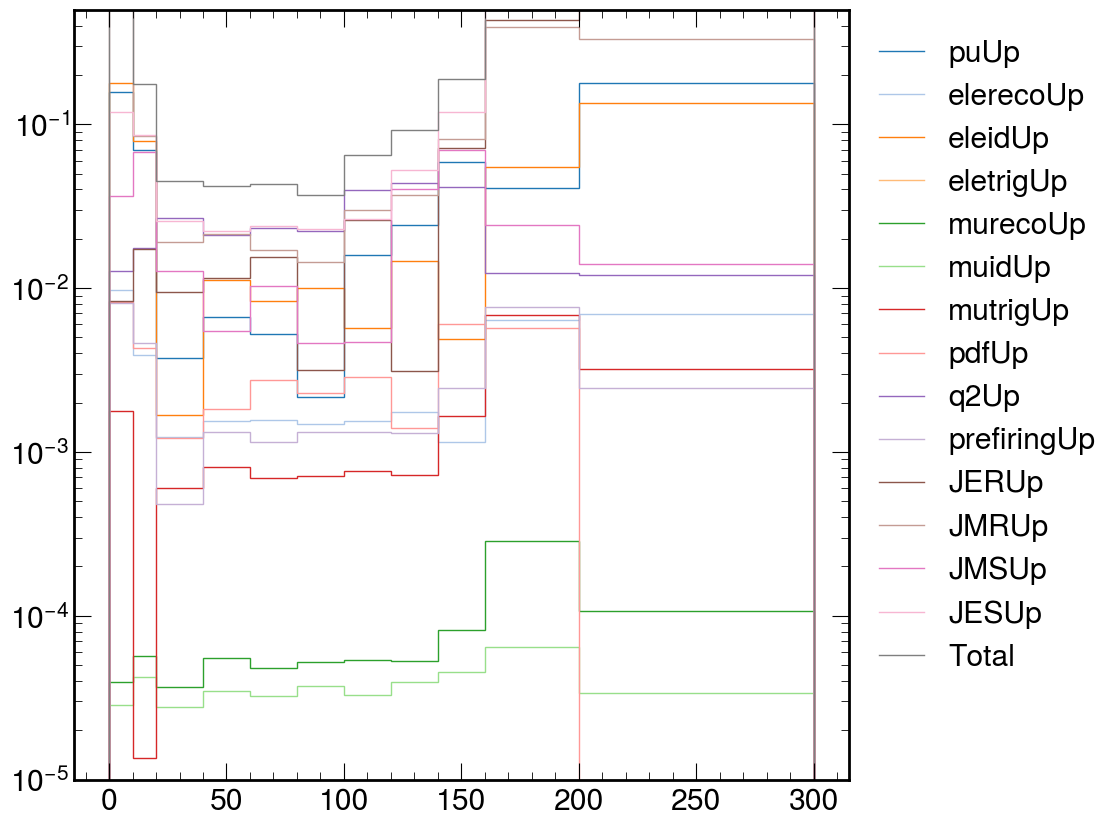

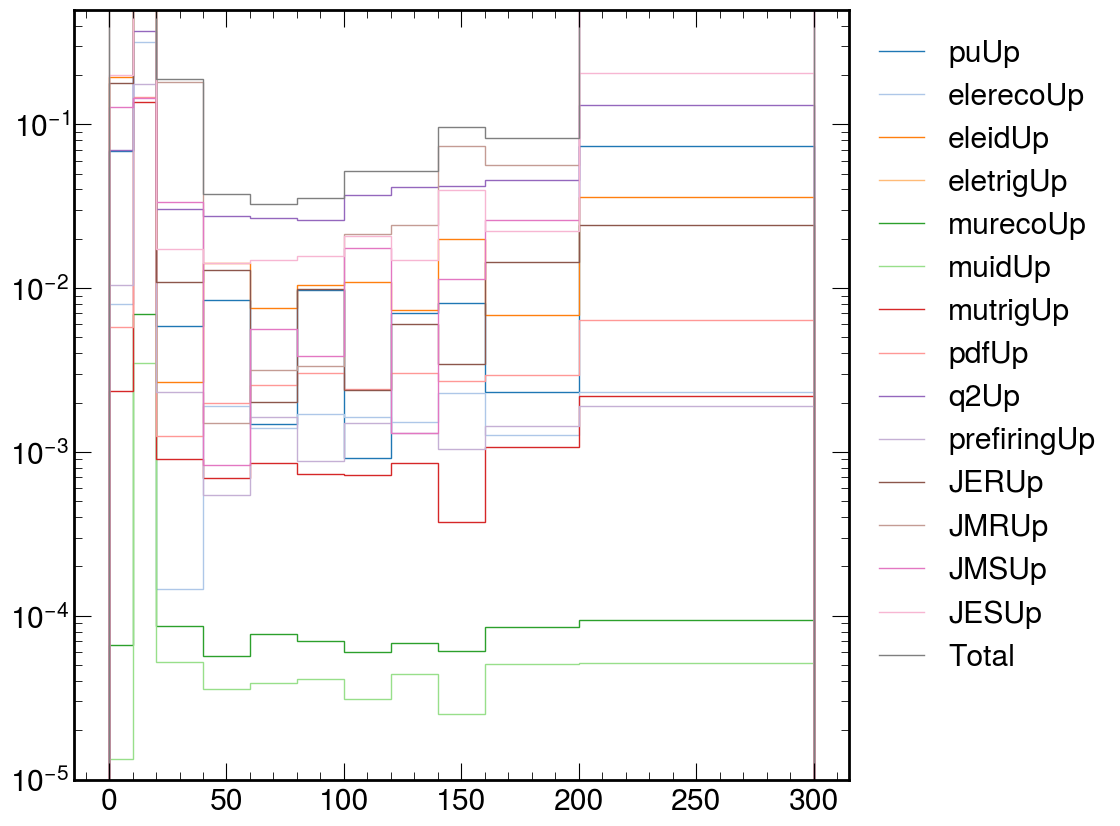

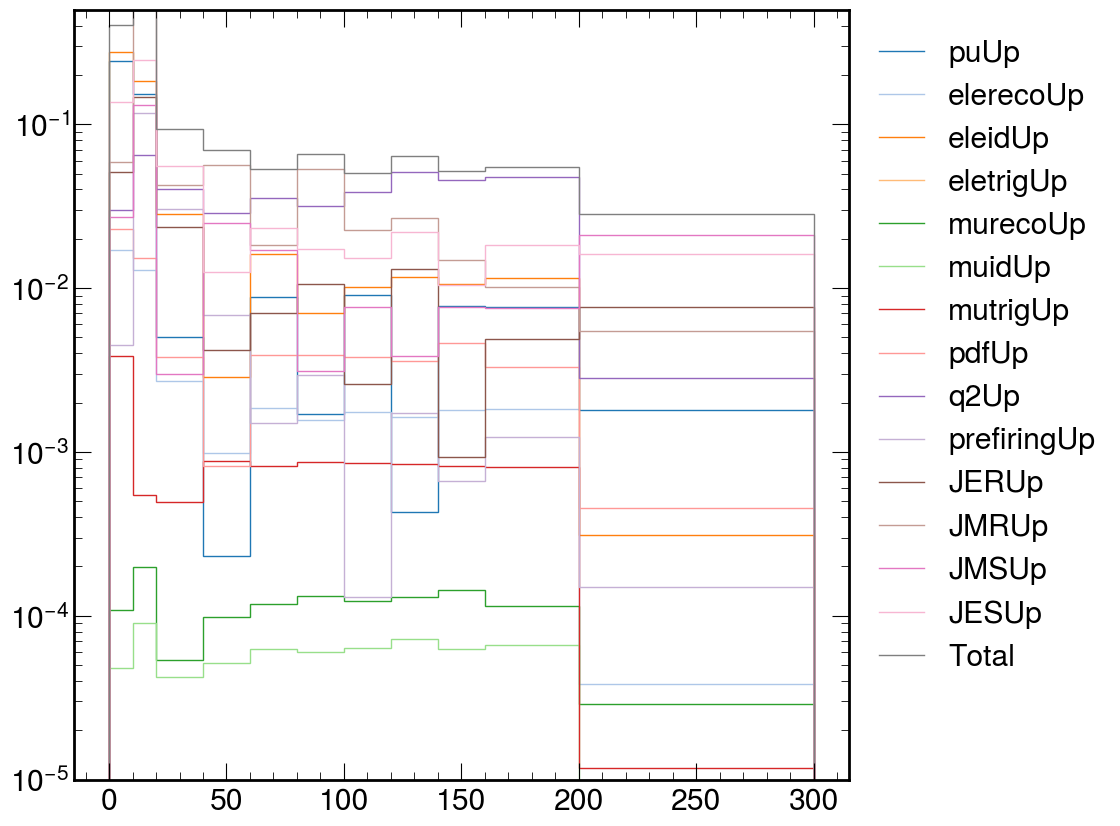

In [360]:
unfolder.plot_systematic_frac()

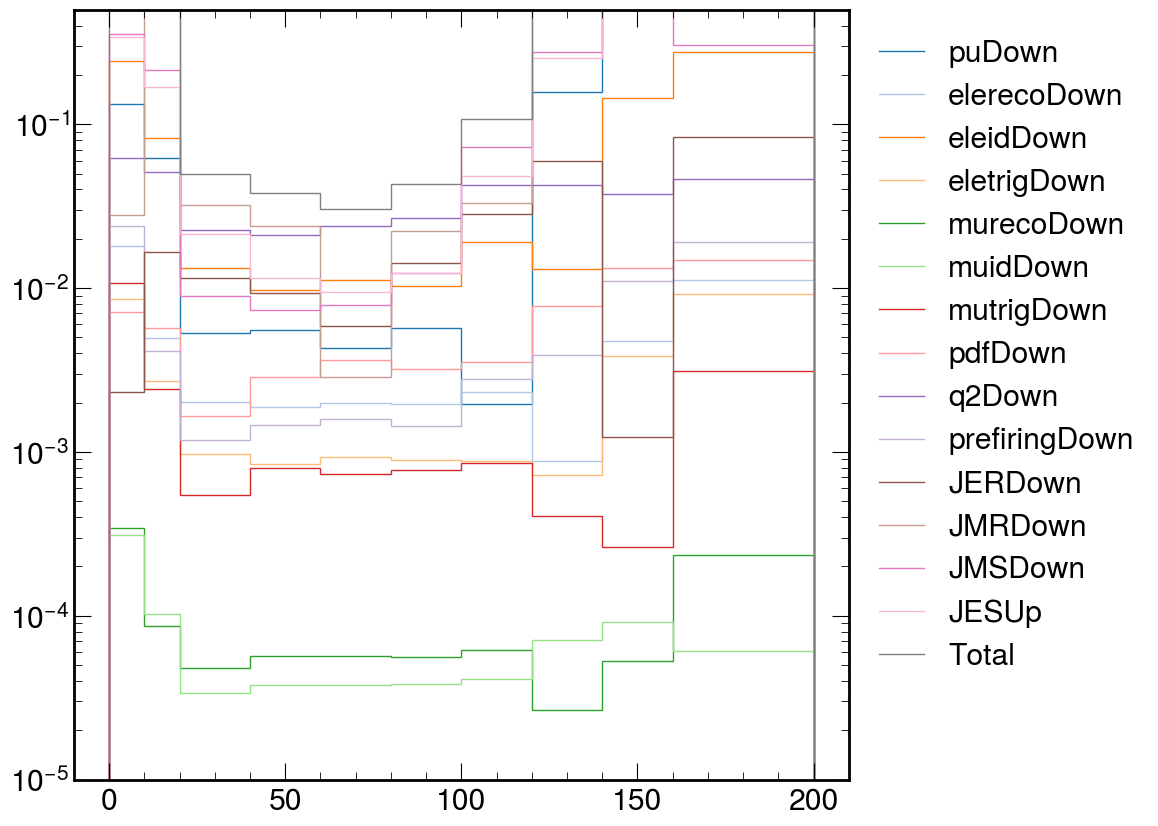

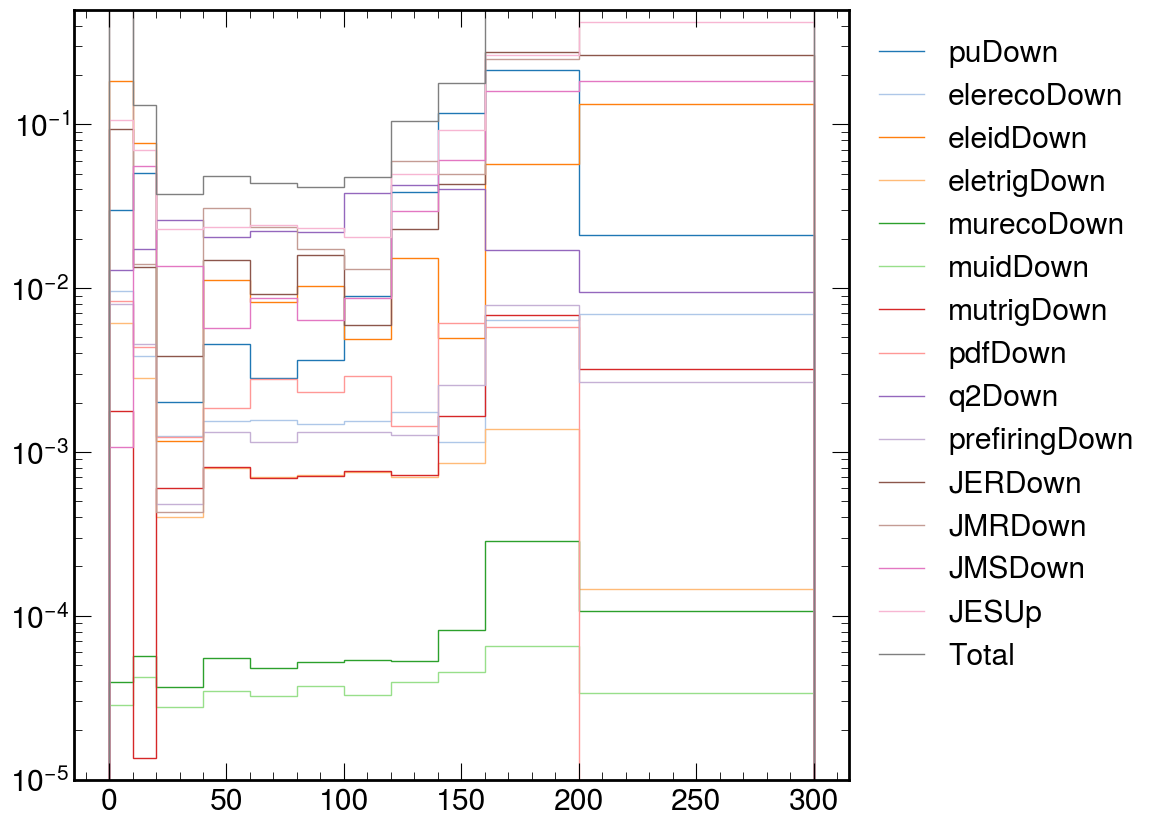

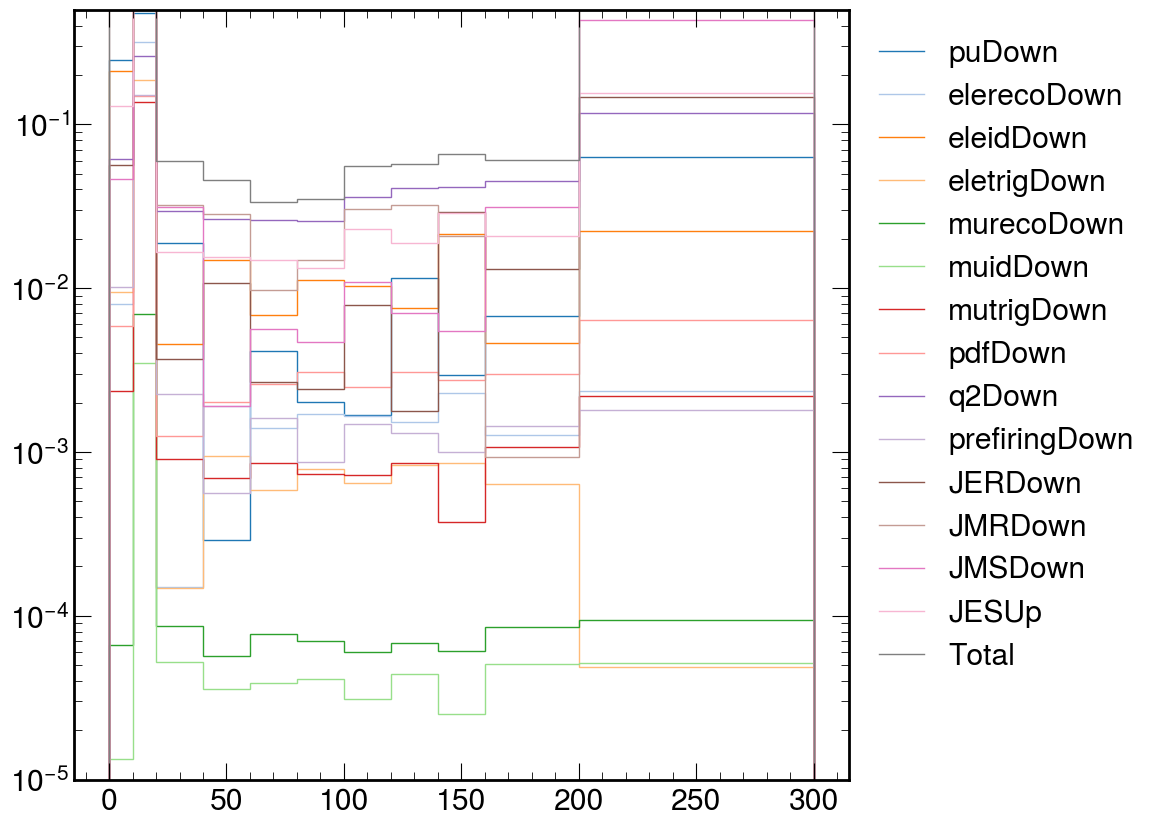

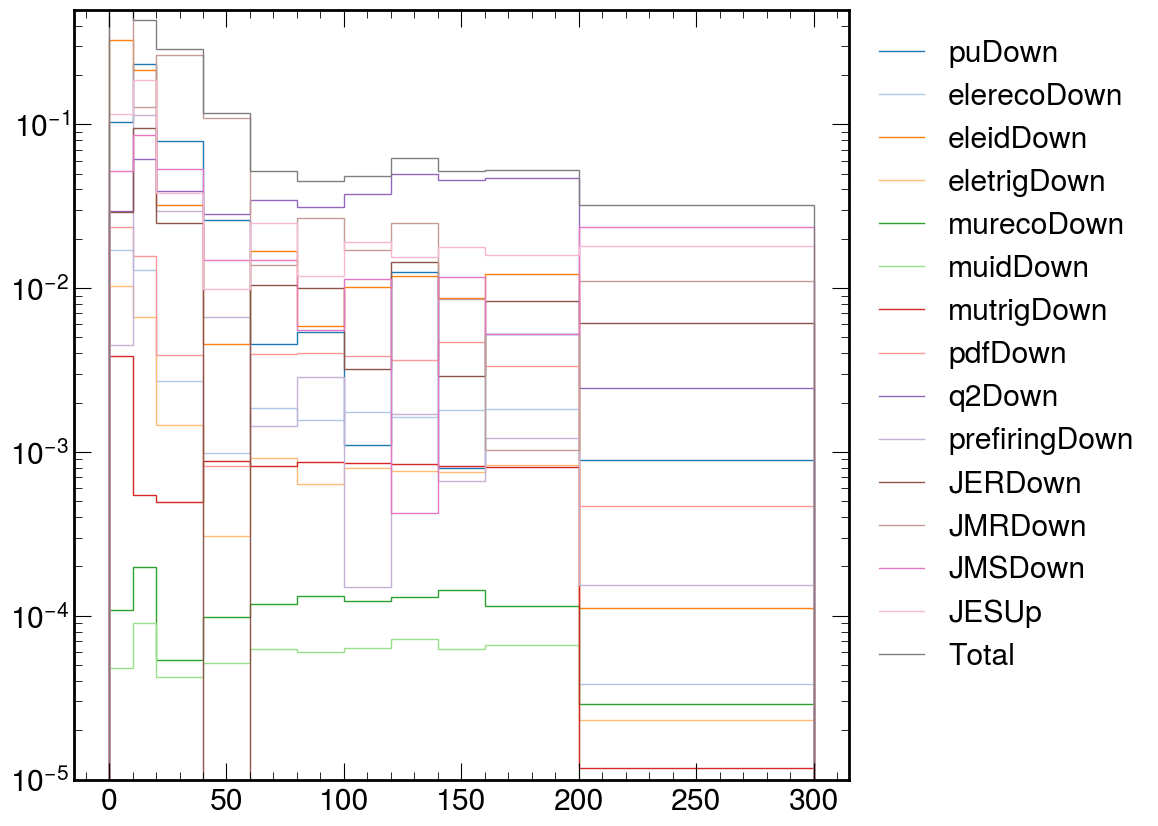

In [361]:
unfolder_dn.plot_systematic_frac()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])


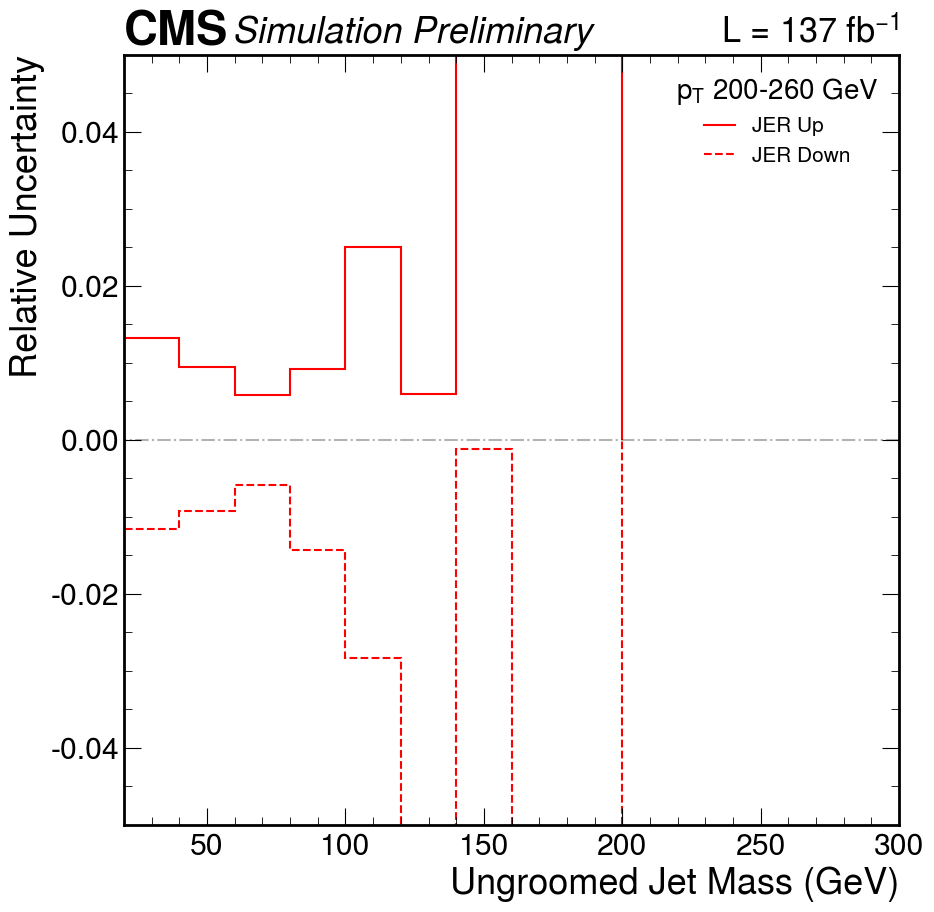

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])


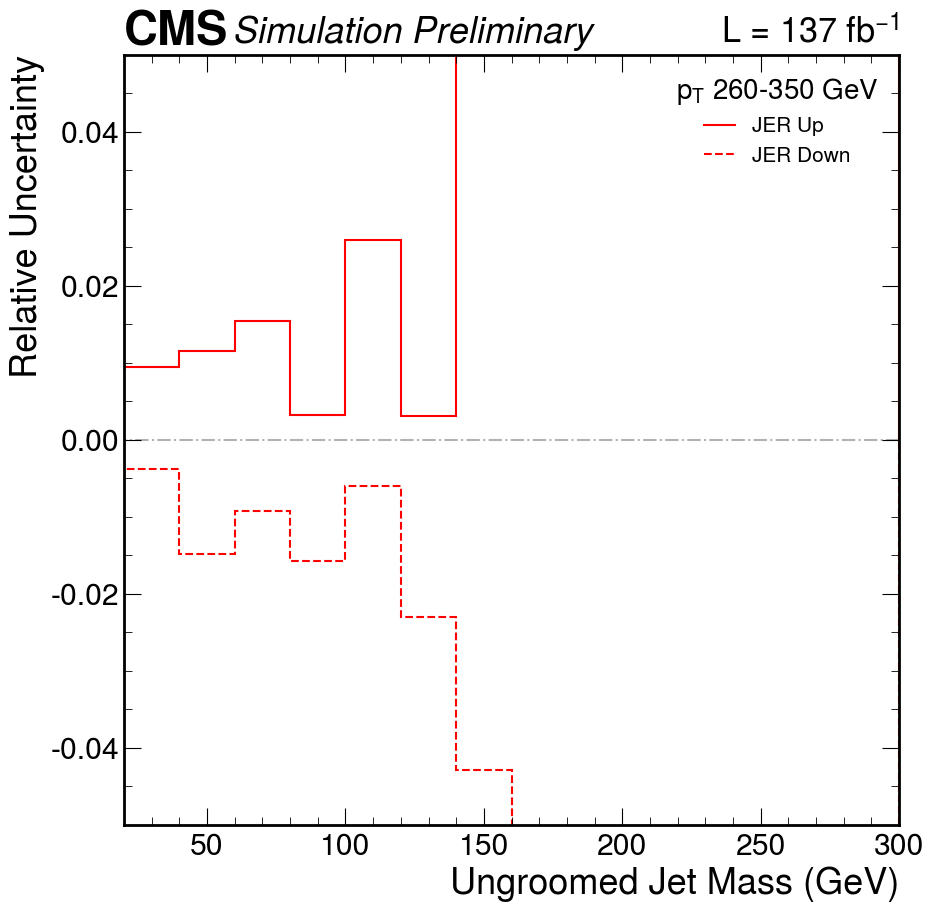

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])


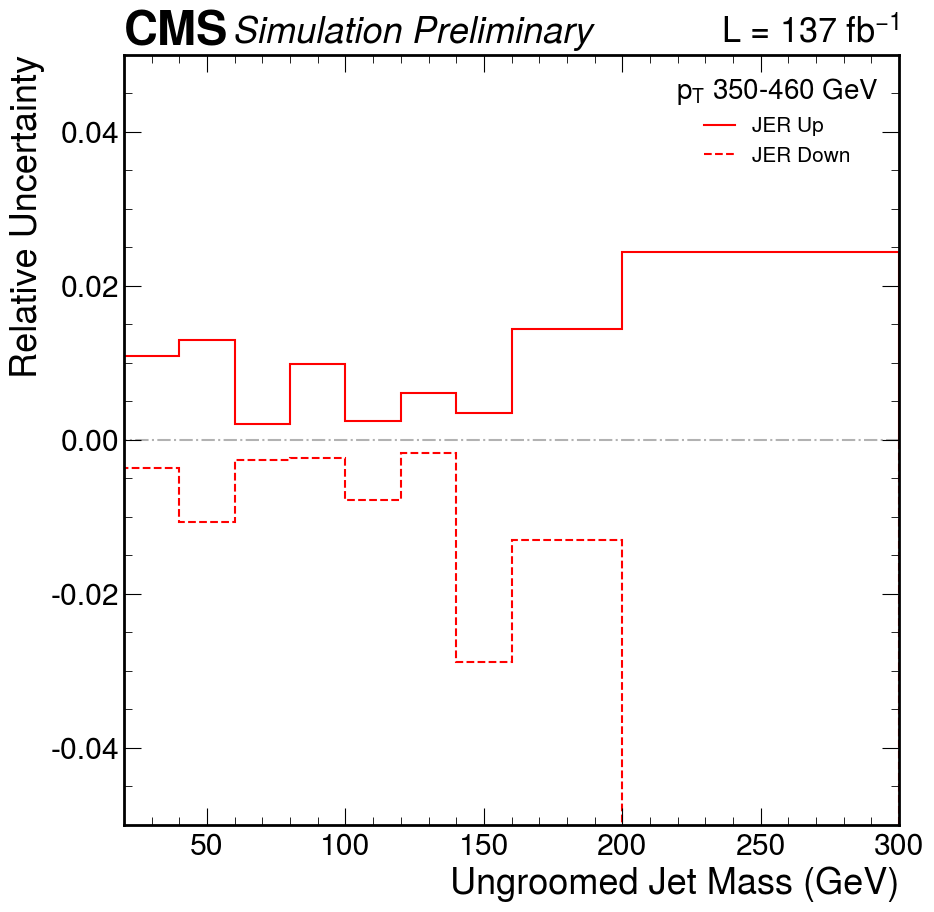

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])


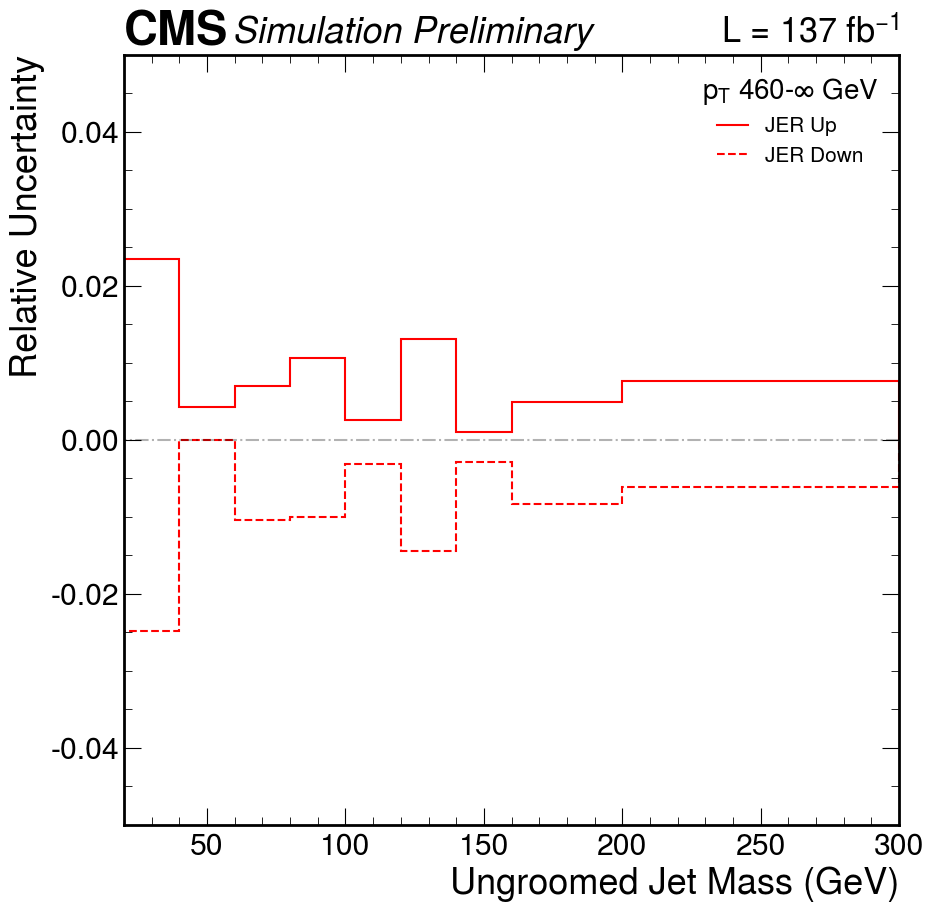

In [362]:
sys = 'JER'
sys2 = 'JMR'
#sys3 = 'eletrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    #hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    #hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    #hep.histplot(unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0],unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Up' , color = 'g')
    #hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.05, 0.05)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

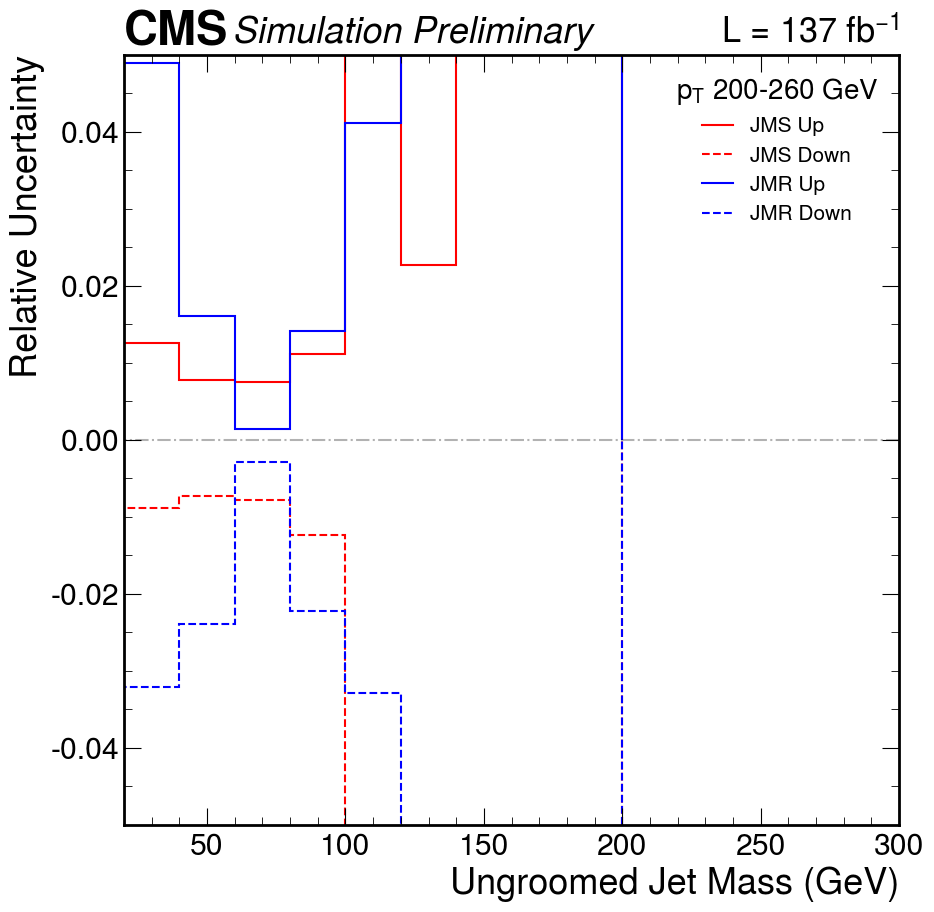

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

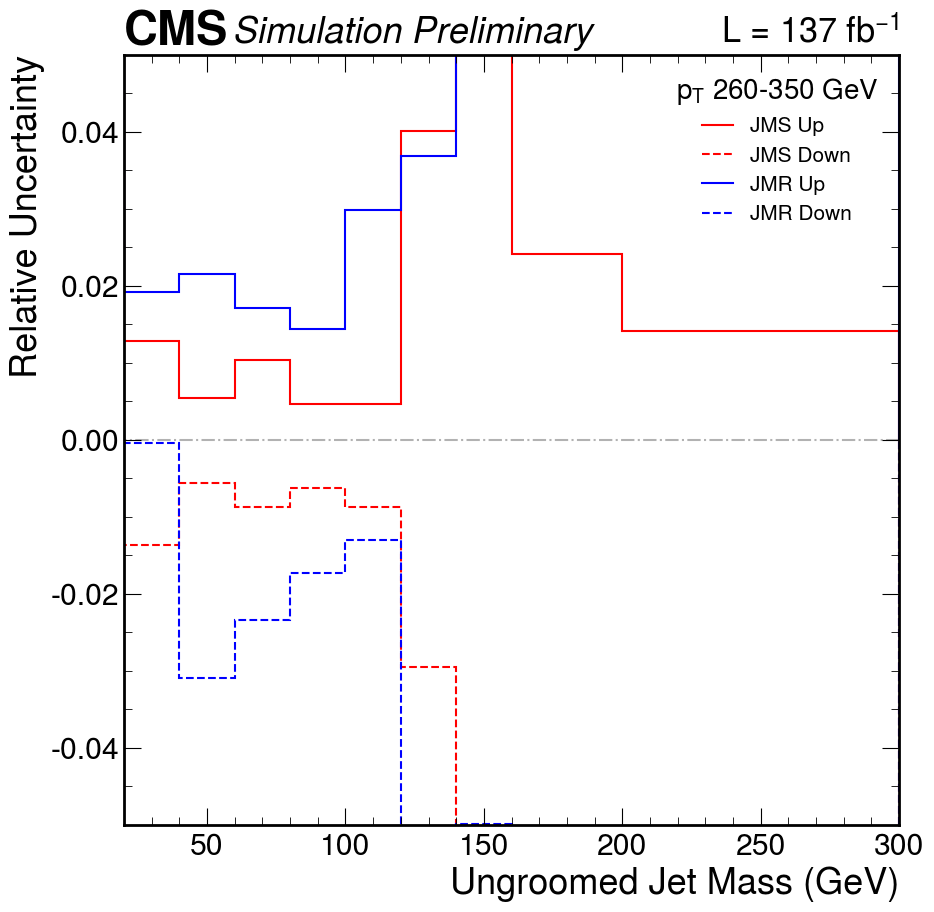

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

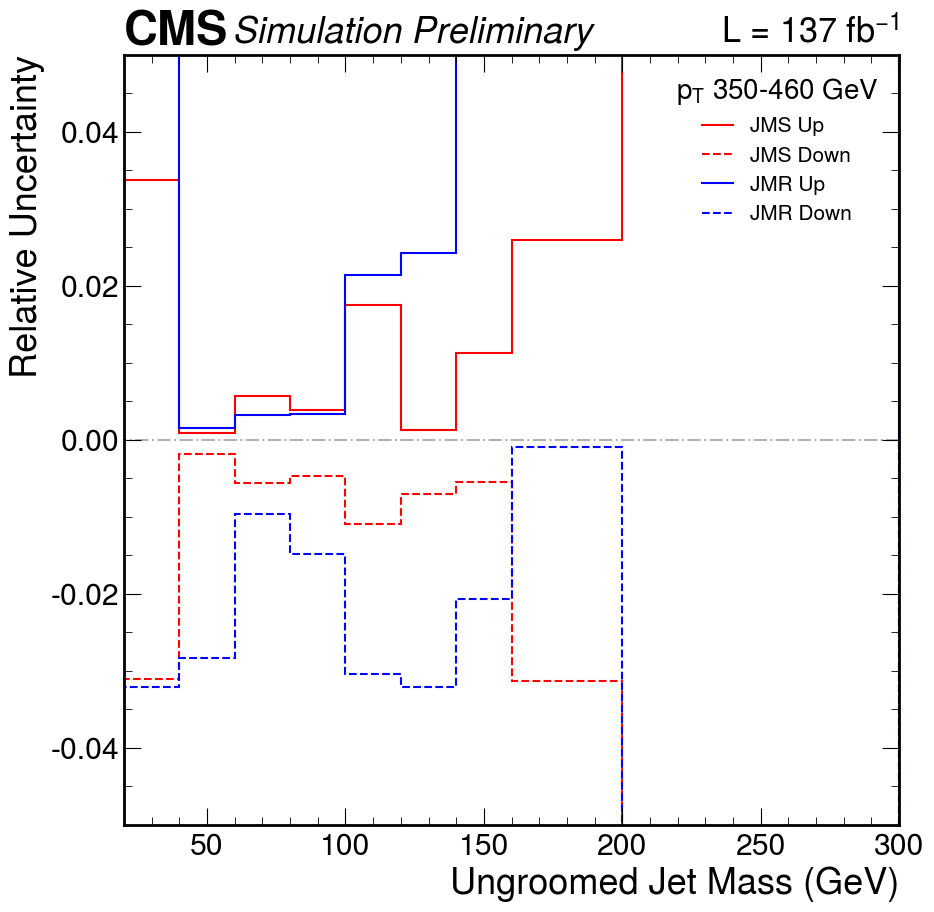

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

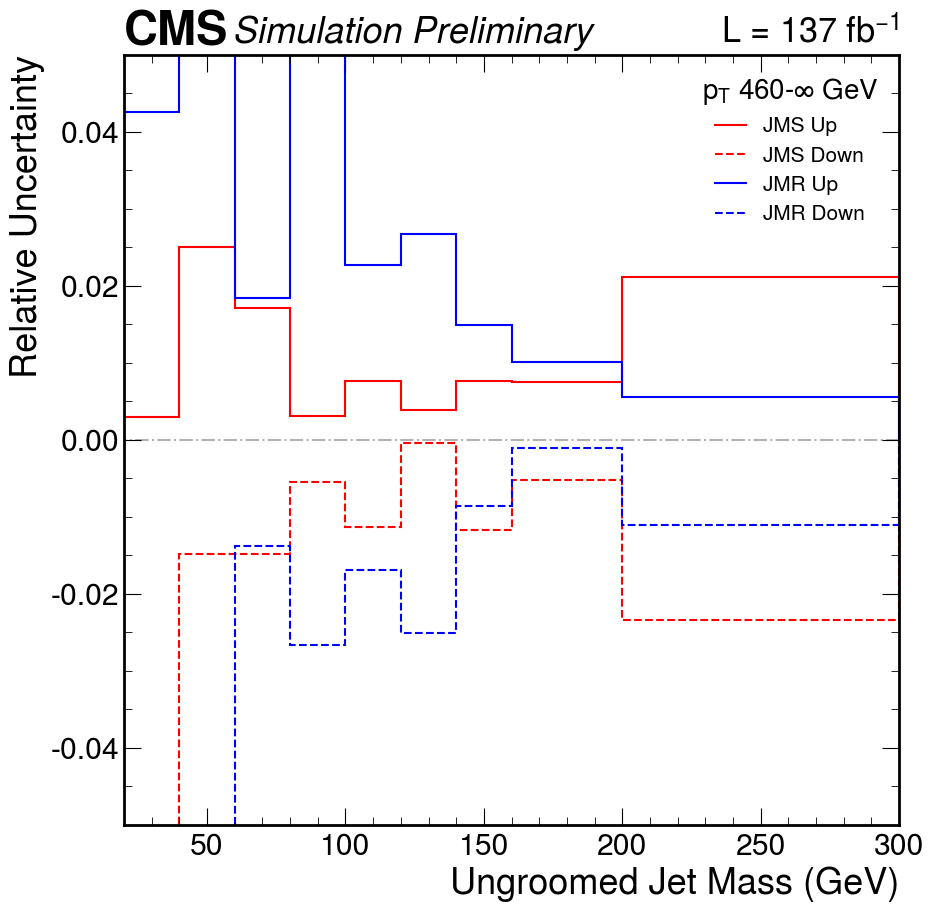

In [363]:
sys = 'JMS'
sys2 = 'JMR'
#sys3 = 'eletrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    #hep.histplot(unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0],unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Up' , color = 'g')
    #hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.05, 0.05)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

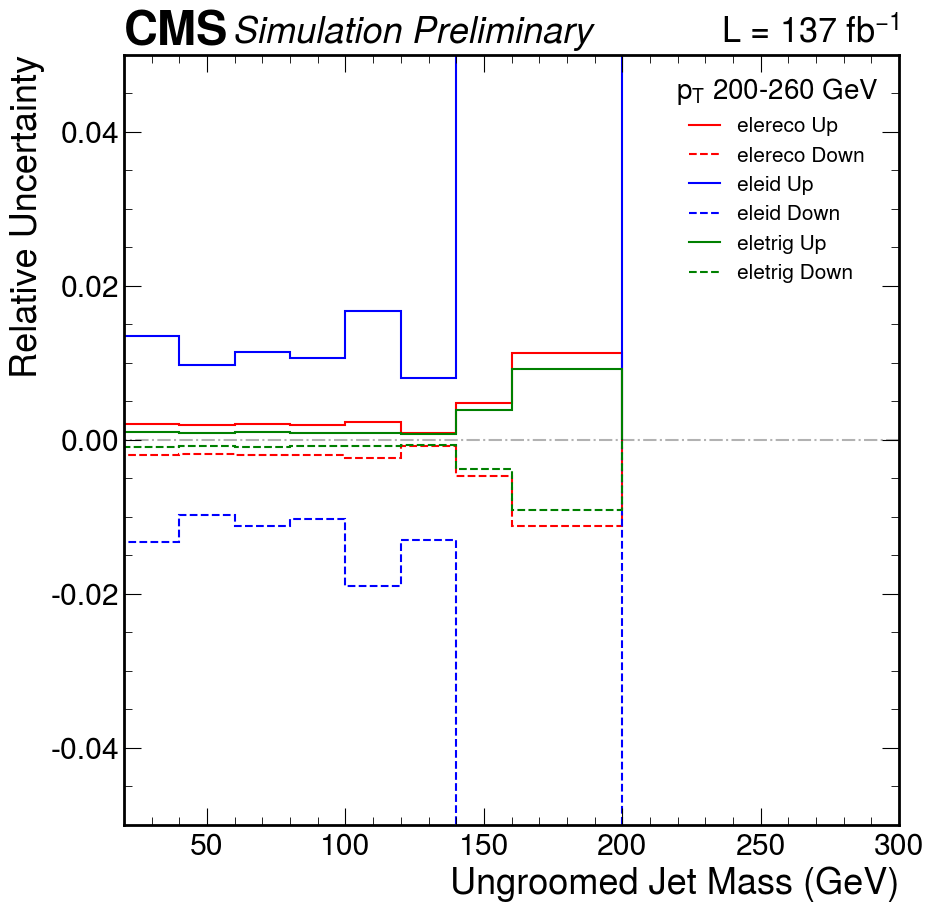

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

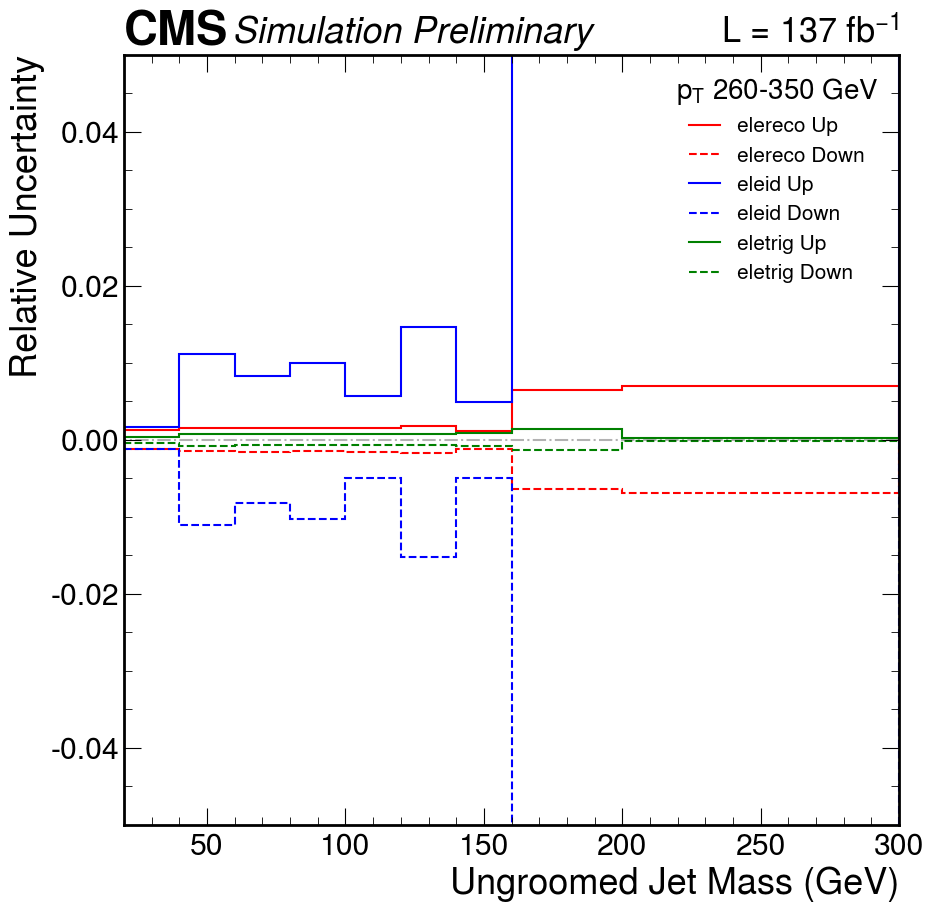

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

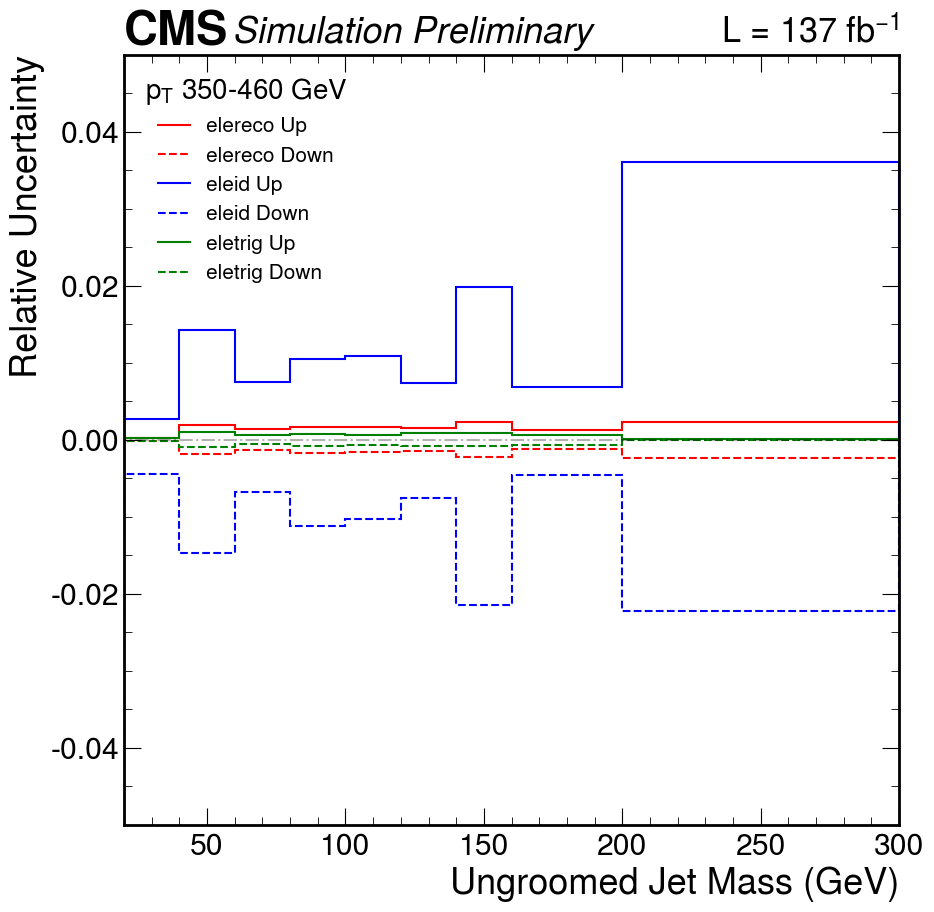

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

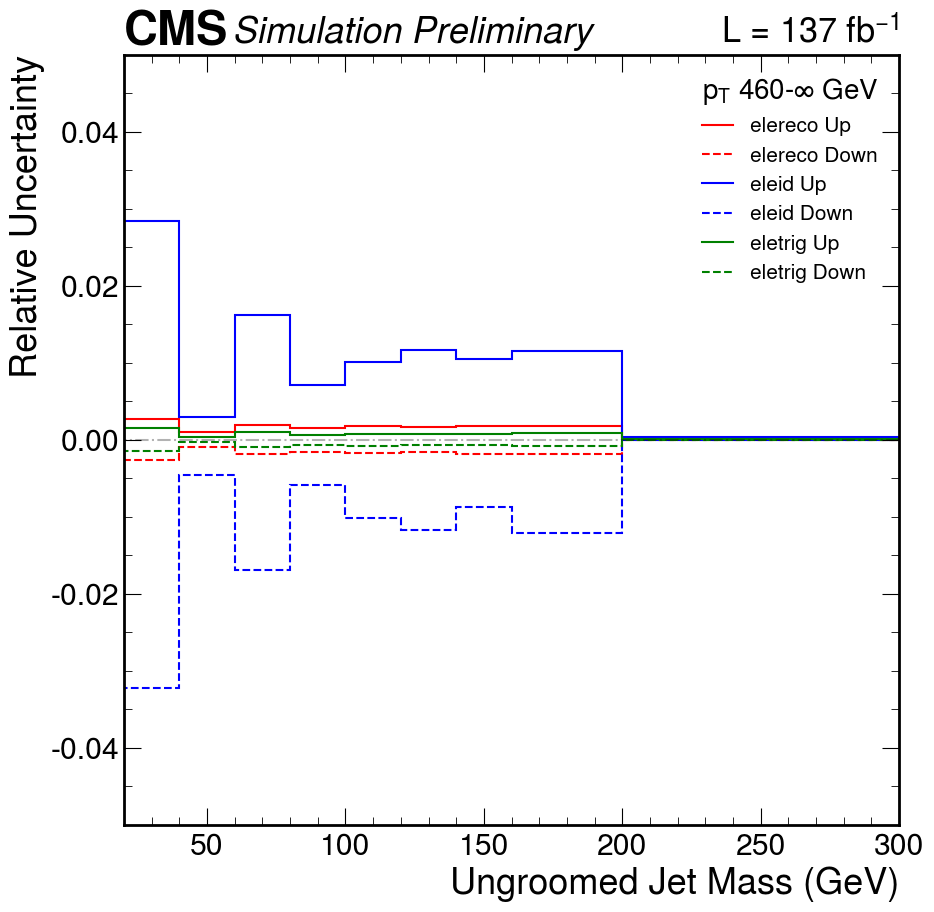

In [364]:
sys = 'elereco'
sys2 = 'eleid'
sys3 = 'eletrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    hep.histplot(unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0],unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Up' , color = 'g')
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.05, 0.05)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

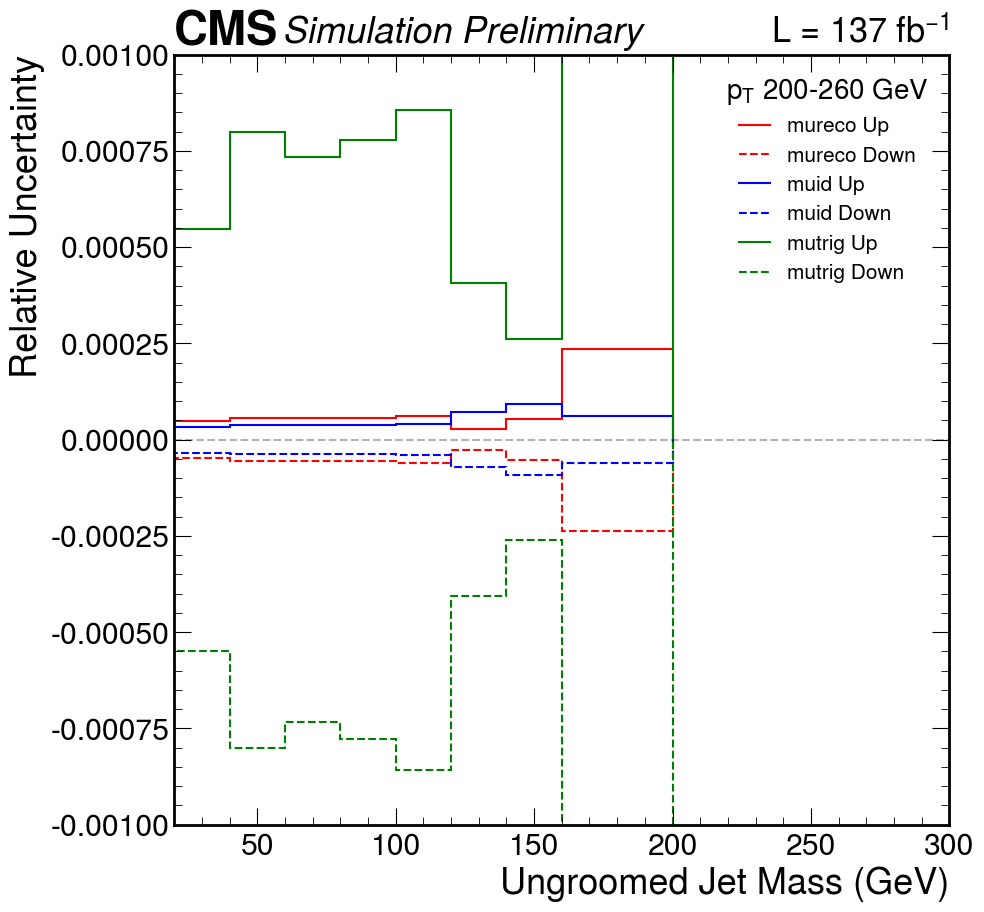

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

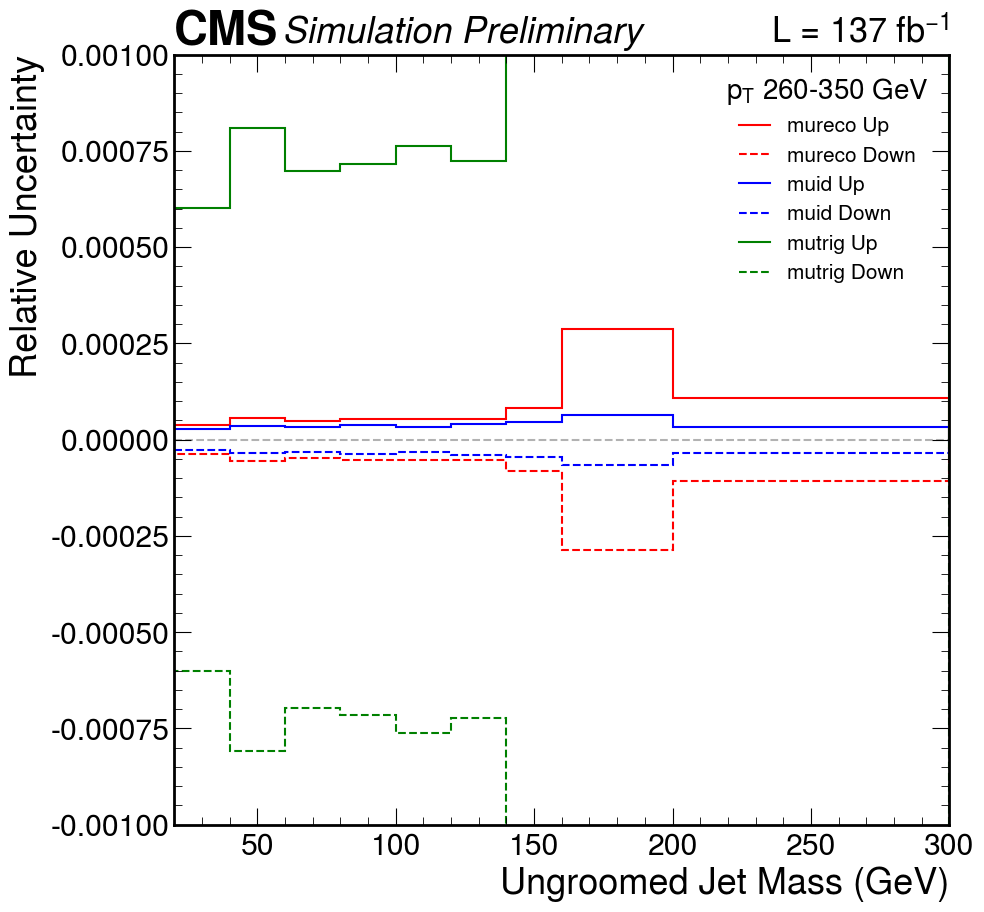

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

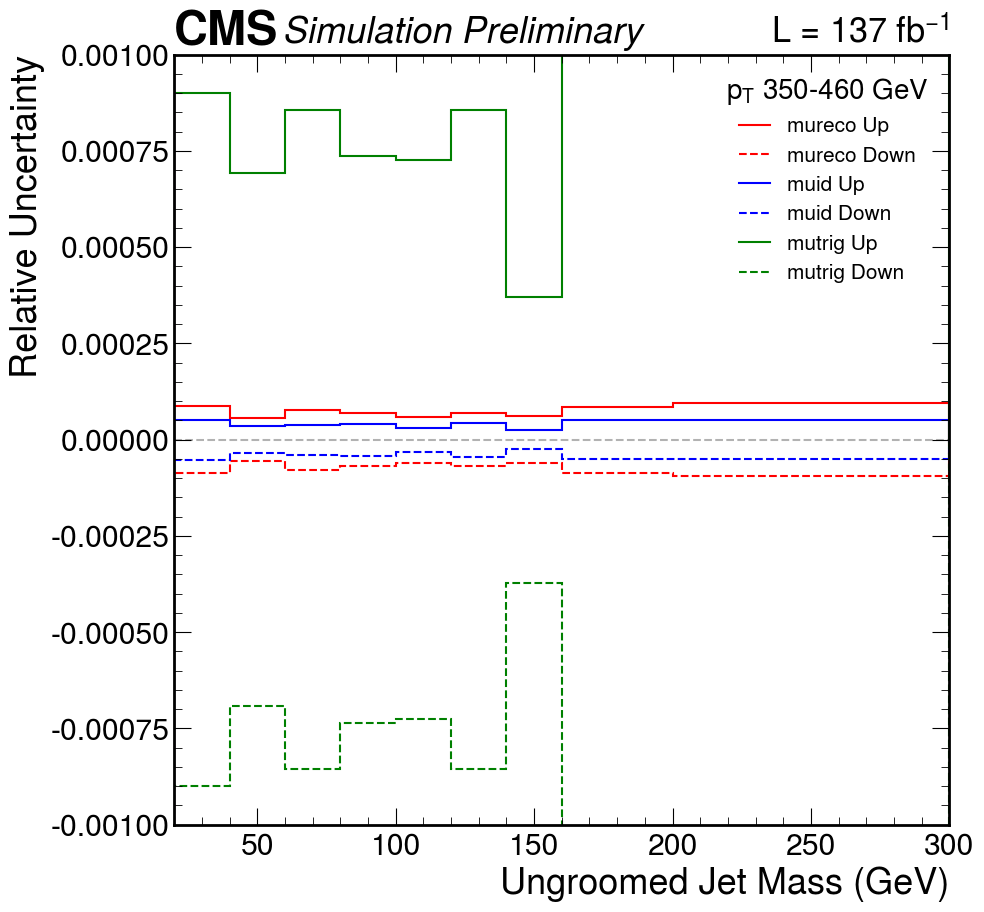

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

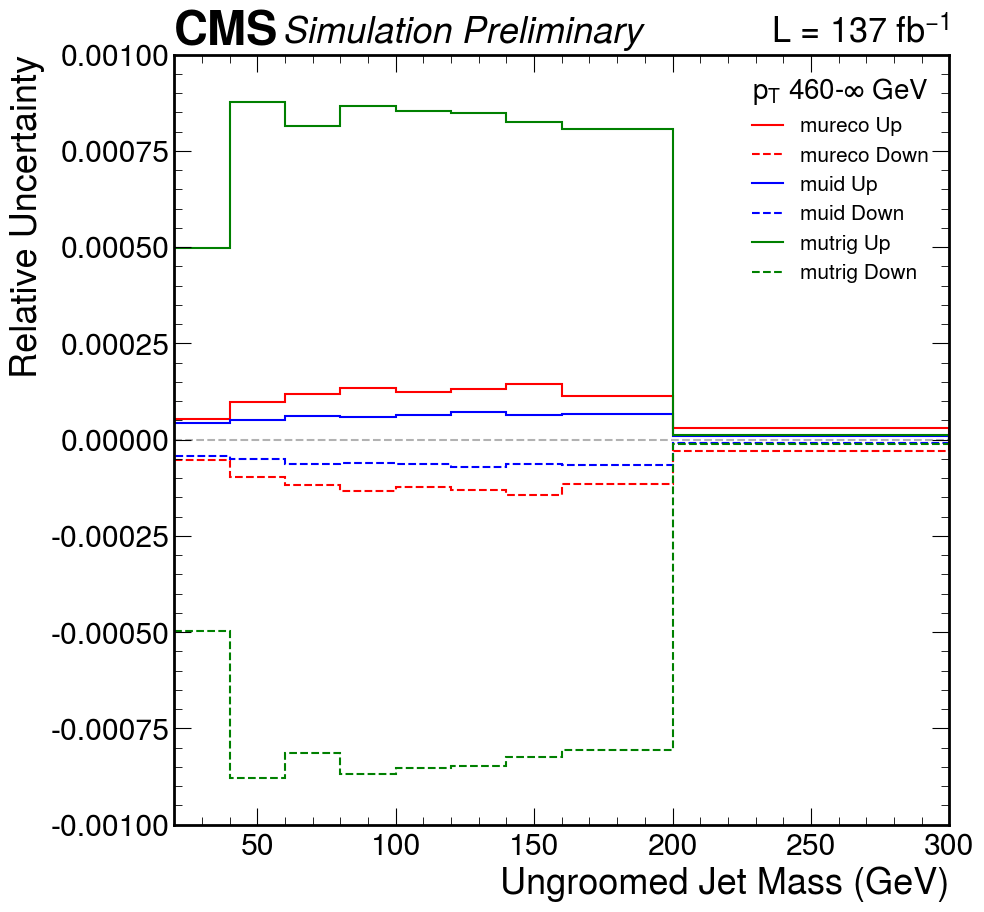

In [365]:
sys = 'mureco'
sys2 = 'muid'
sys3 = 'mutrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][1], label = sys3+' Up' , color = 'g')
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '--', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.001, 0.001)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

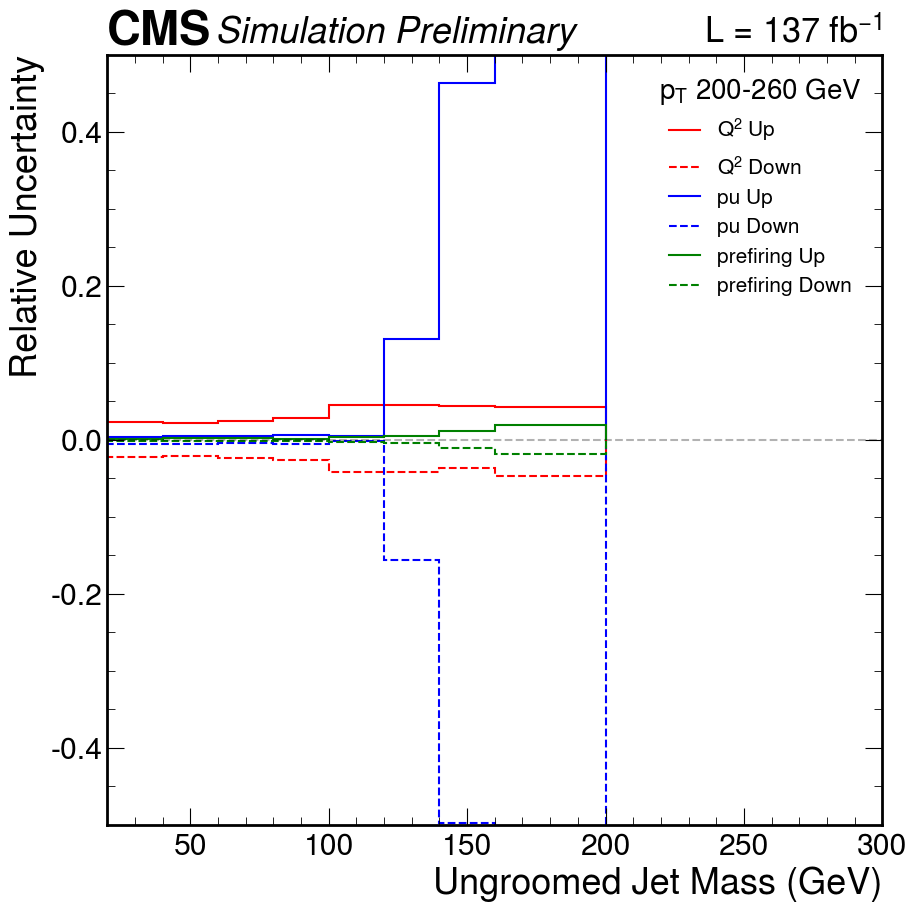

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

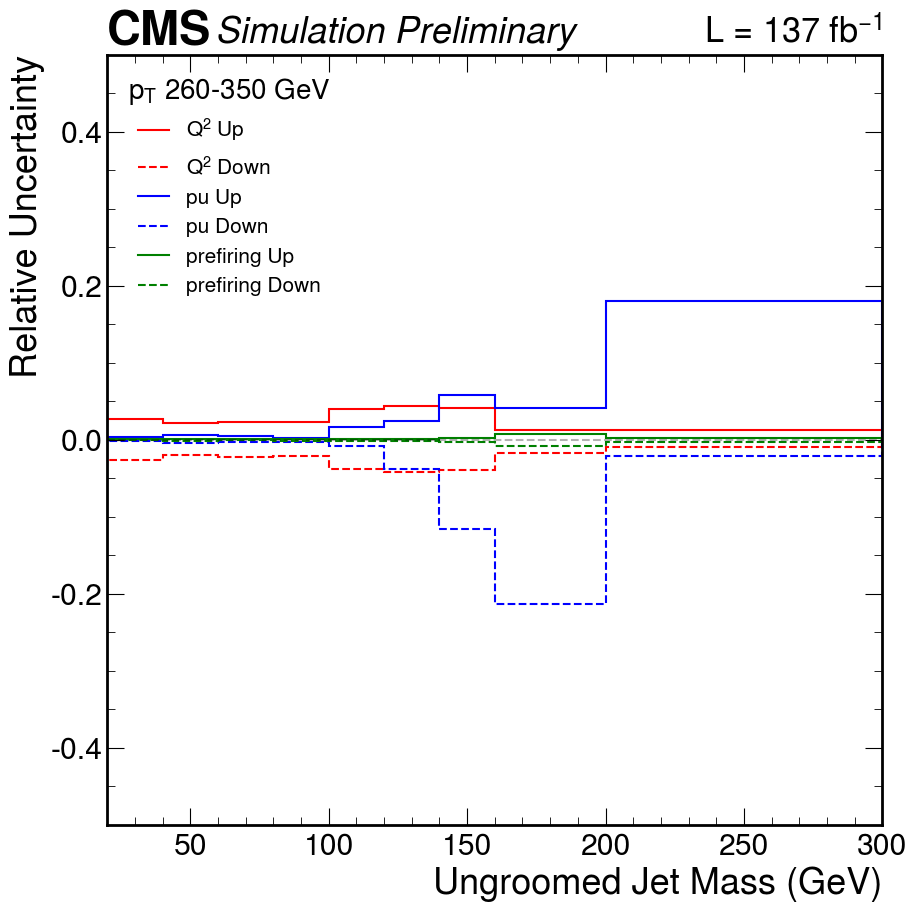

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

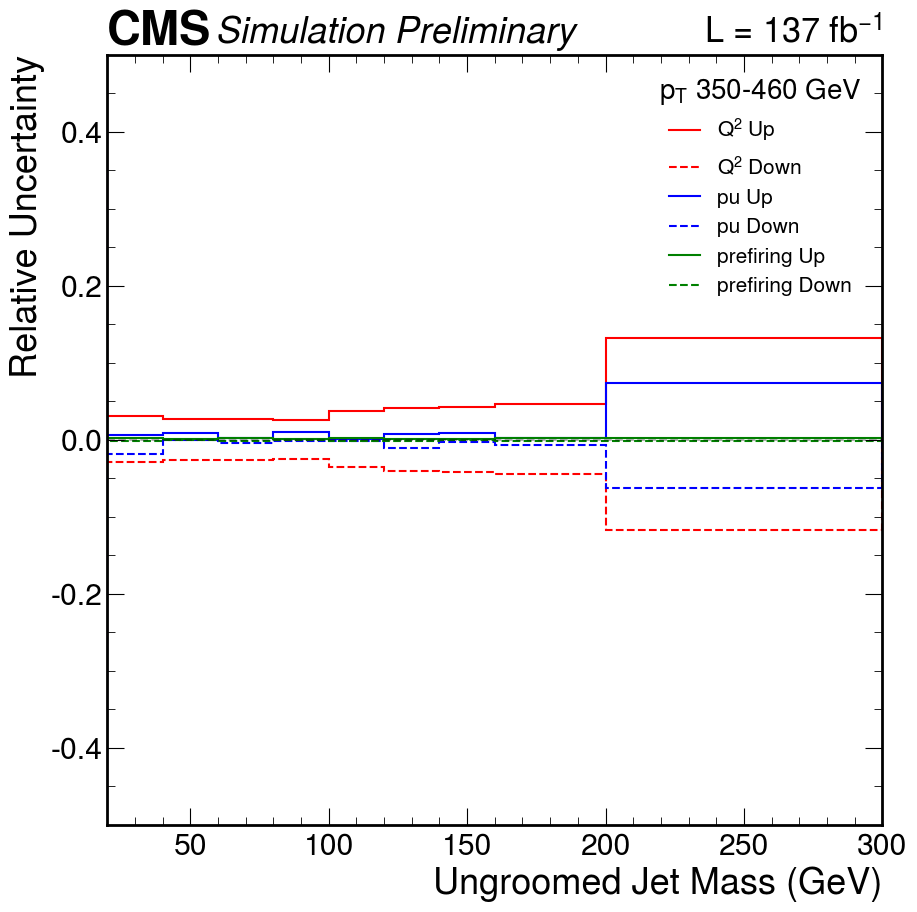

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge ])
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_p

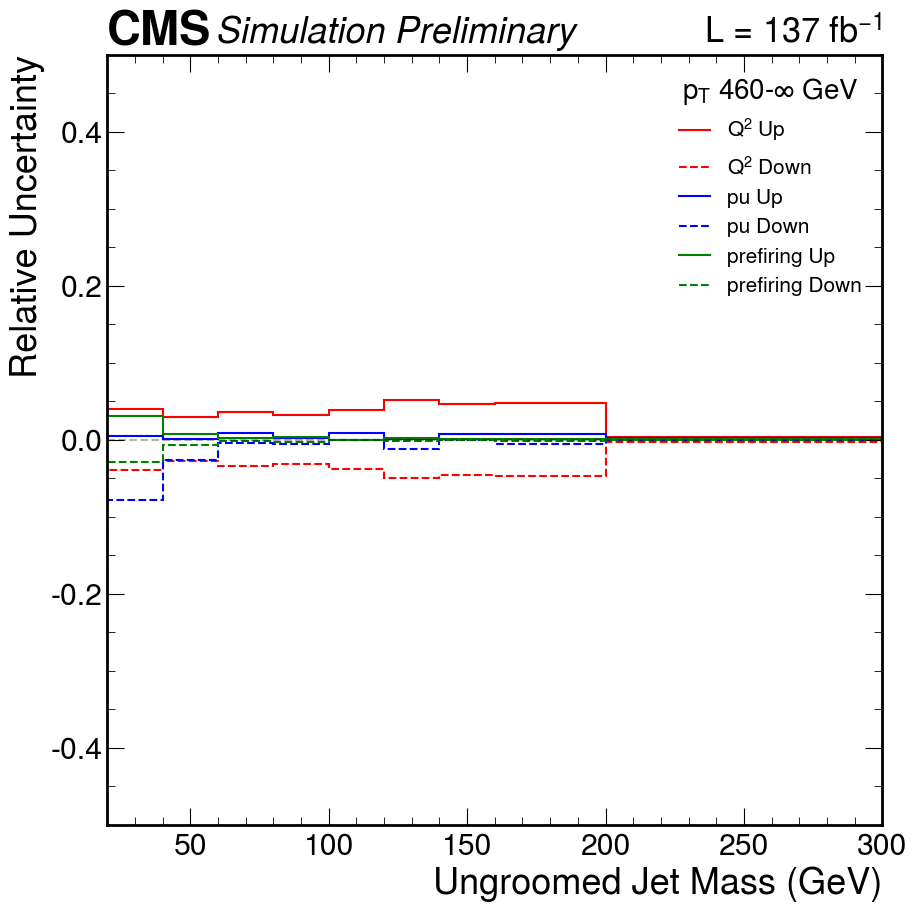

In [371]:
sys = 'q2'
sys2 = 'pu'
sys3 = 'prefiring'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label =r'$Q^2$' +' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = r'$Q^2$'+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][1], label = sys3+' Up' , color ='g' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color ='g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '--', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    plt.ylim(-0.5, 0.5)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()



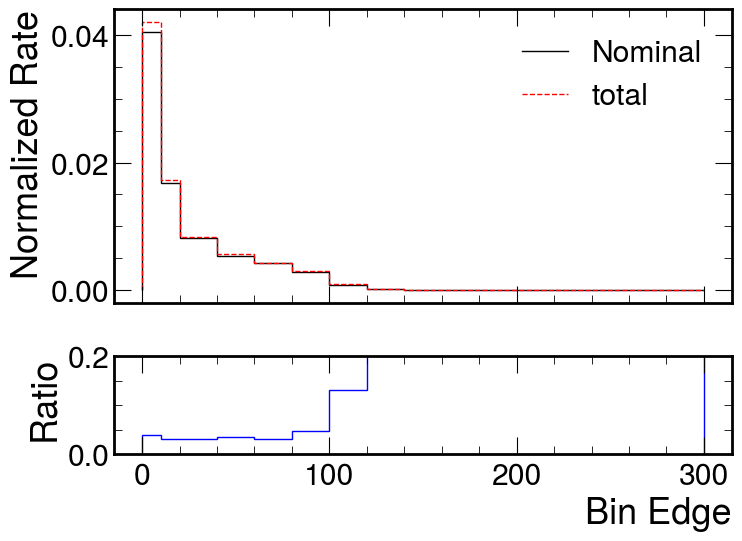

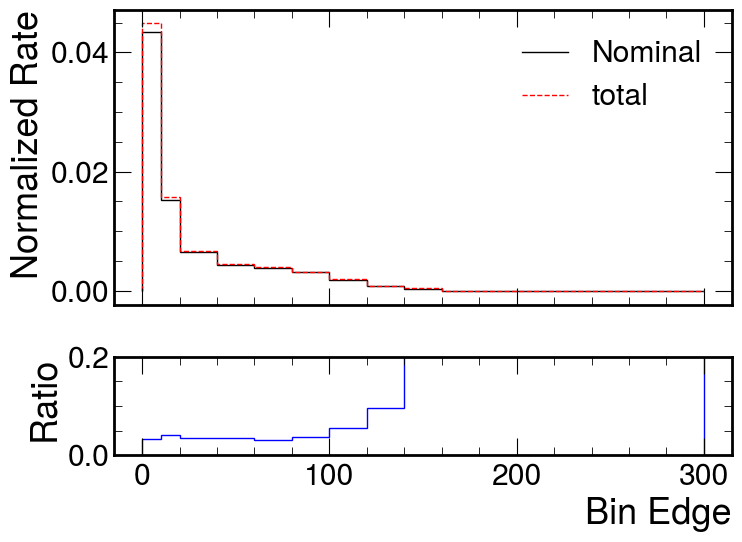

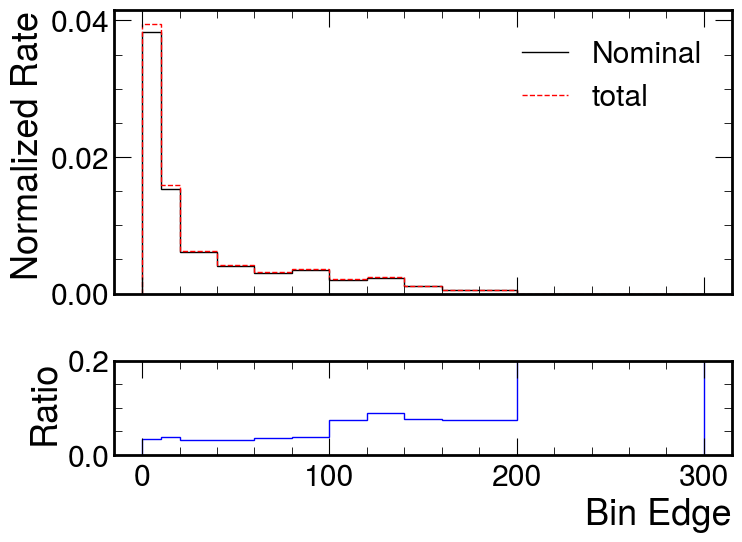

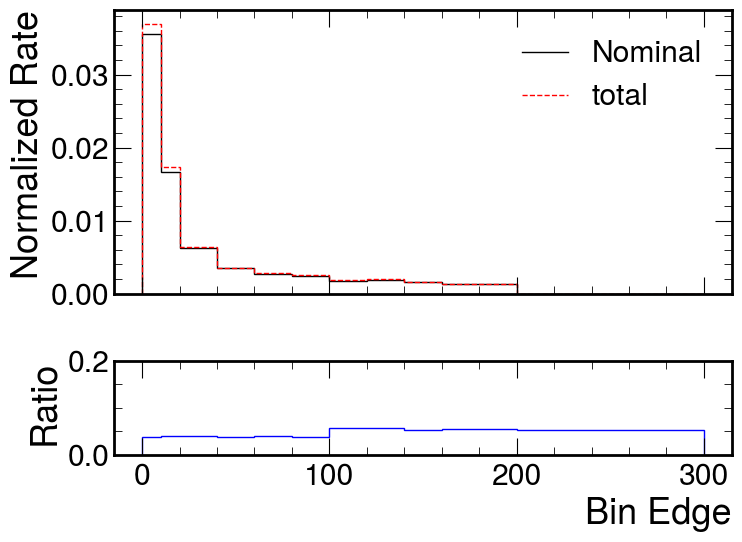

In [319]:
unfolder_dn.plot_systematic('total')

In [222]:
unfolder.total_sys_jes[i*unfolder_dn.nmbinsGen  :(i+1)*unfolder_dn.nmbinsGen]

array([ 11.91377231,  37.49932346,  64.92389397,  59.54766702,
       120.8431534 ,  43.40027207,  34.51388731,  27.9957829 ,
        10.71226491,  21.83041837,   9.44374169])

In [223]:
jk_output_list = []
for i in range(10):
    if not groomed:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_u'][{'jk':i}]
        input_data = output_data['ptjet_mjet_u_reco']
        fakes_jk = fakes
        misses_jk = (9/10)*misses
        

    else:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_g'][{'jk':i}]
        input_data = output_data['ptjet_mjet_g_reco']
        fakes_jk = fakes
        misses_jk = (9/10)*misses
        
    unfolder_jk = Unfolder(input_data, 
                    #resp_matrix_4d[{'systematic':'nominal'}] ,
                    resp_matrix_4d_jk,
                    fakes = None,
                    misses = None,
                    backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    #systematics = sys_matrix_dic,
                    systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = closure,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = True
                           )    
    # resp_matrix_4d_jk = resp_matrix_4d_jk[:,:,:hist.loc(131), : ,:hist.loc(121),:] 
    # resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:] = resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:].view() + resp_matrix_4d_jk[:,:,hist.loc(131), : ,:,:].view()
    # resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:] = resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:].view() + resp_matrix_4d_jk[:,:, :, : ,hist.loc(121),:].view()
    unfolder_jk.perform_unfold()
    jk_output_list.append(unfolder_jk.get_results()[0])

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)
sum_i 102792.11125318795
sum_i 97940.11681592866
sum_i 31340.971634578178
sum_i 14164.102187491244
Unfolder object created


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))


Regularisation USED ScanSURE
Tau value 0.008058421877614819
Output Underflow 0.0, output overflow 0.0
4.0
3.9346936392008622
11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)
sum_i 102982.47558097556
sum_i 97900.80770874562
sum_i 31293.67228217408
sum_i 14158.16862017514
Unfolder object created


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: divide by zero encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))


Regularisation USED ScanSURE
Tau value 0.008058421877614819
Output Underflow 0.0, output overflow 0.0
4.0
3.999997649682944
11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)
sum_i 102922.43717991195
sum_i 97973.74859803247
sum_i 31356.296332143982
sum_i 14157.59449735836
Unfolder object created
Regularisation USED ScanSURE
Tau value 0.008058421877614819
Output Underflow 0.0, output overflow 0.0
4.0
3.9999999998701417
11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 11 45
Info in <TUnfold::TUnfold>: 88 input bins and 43 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (signal:ptgen[200,260]:massgen[200,300])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #45
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 12/88 input bins have z

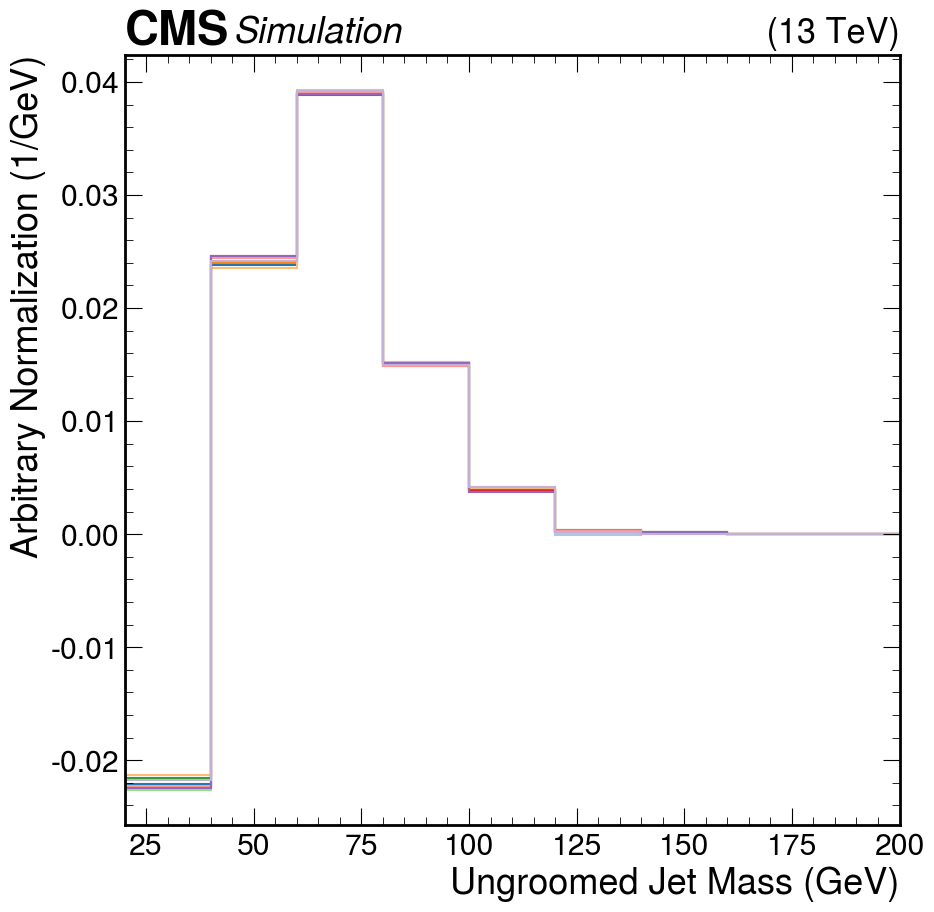

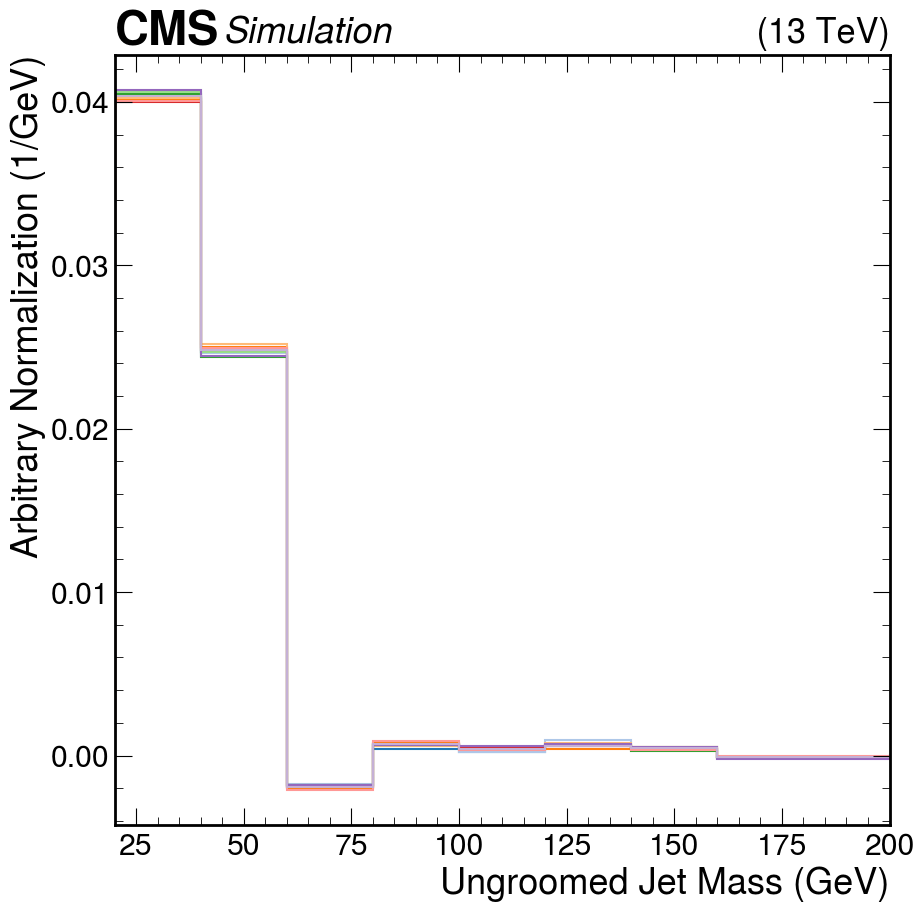

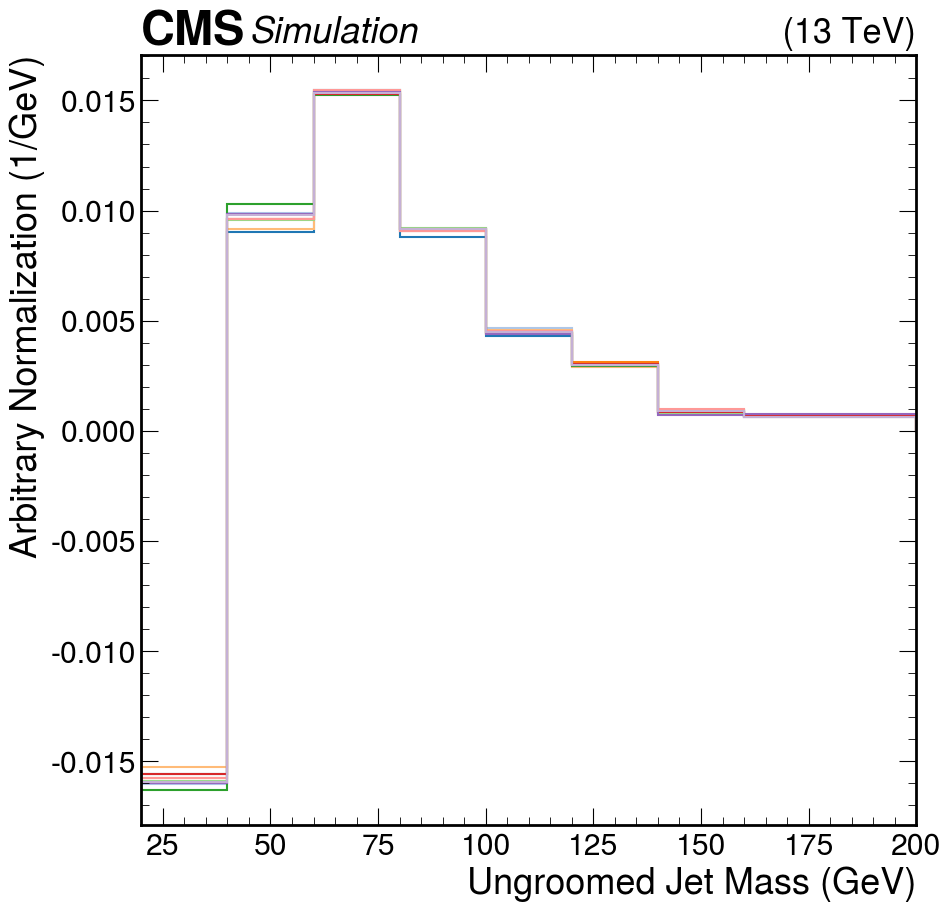

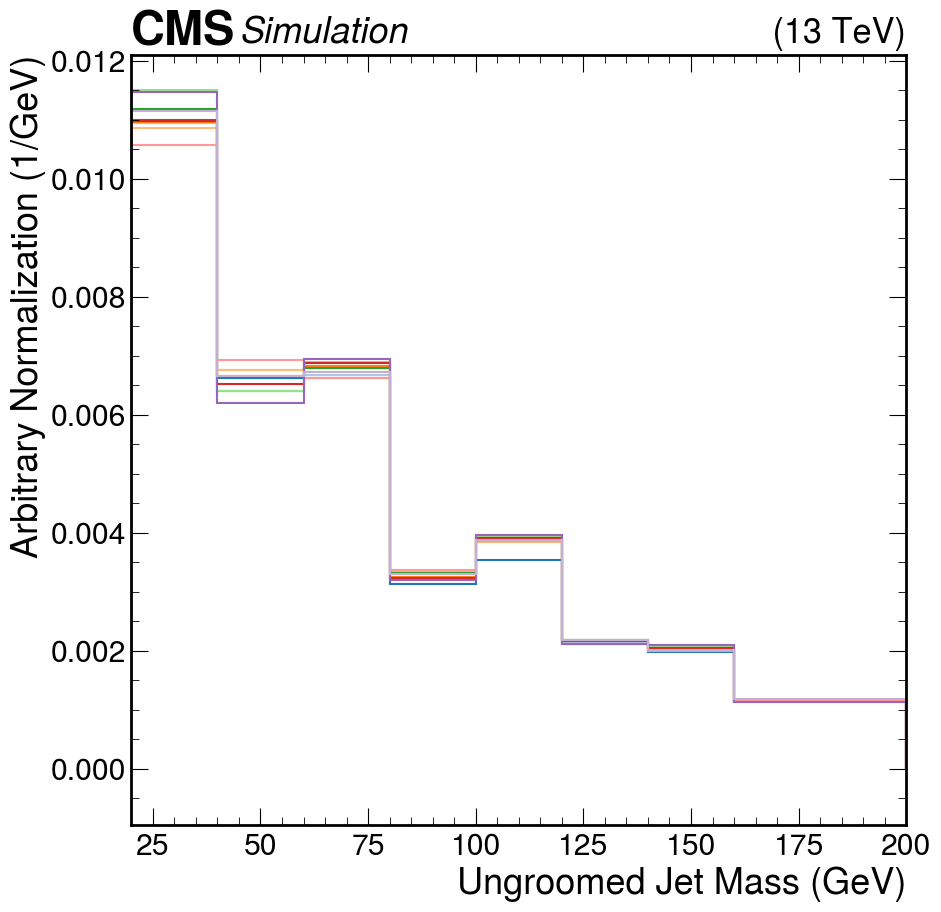

In [224]:
for ipt in range(4):
    for i in range(10):
        hep.histplot(jk_output_list[i][ipt]/mgen_width, mgen_edge)
        plt.xlim(20,200)
        if groomed:
            plt.xlabel("Groomed Jet Mass (GeV)")
        else:
            plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.ylabel("Arbitrary Normalization (1/GeV)")
    hep.cms.label()
    plt.savefig(f"plots/uncertainties/jackknife_{ipt}.png", dpi = 300)
    plt.show()
    

    

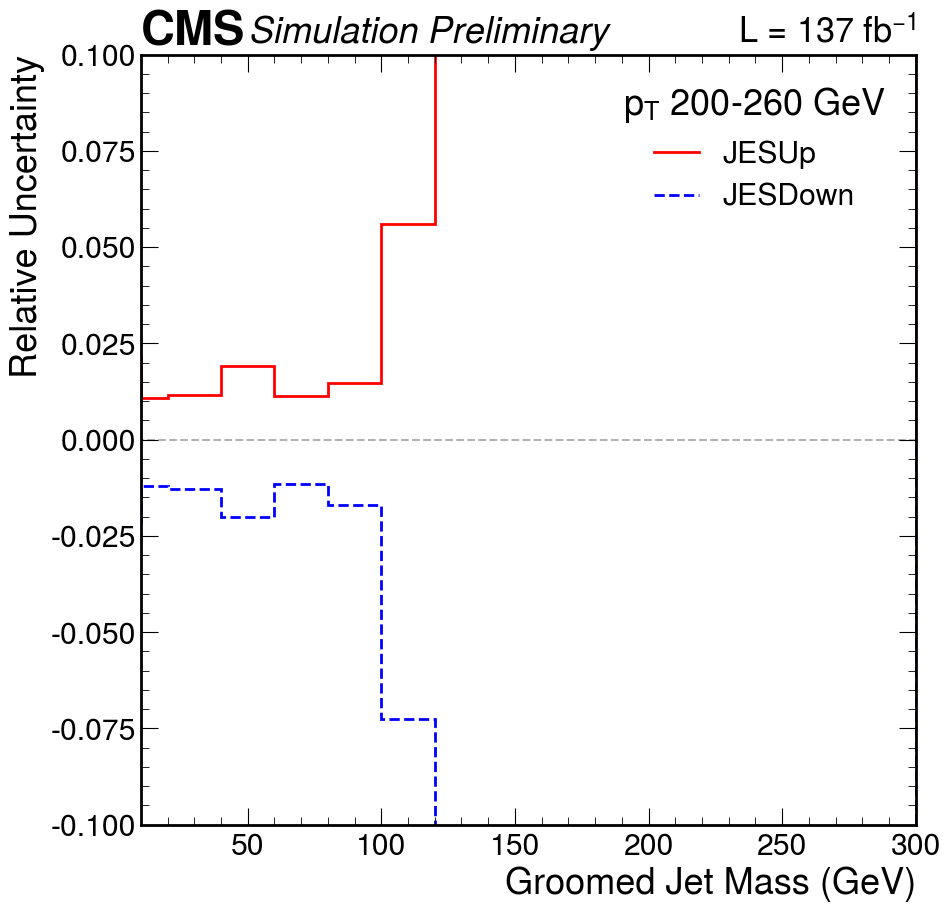

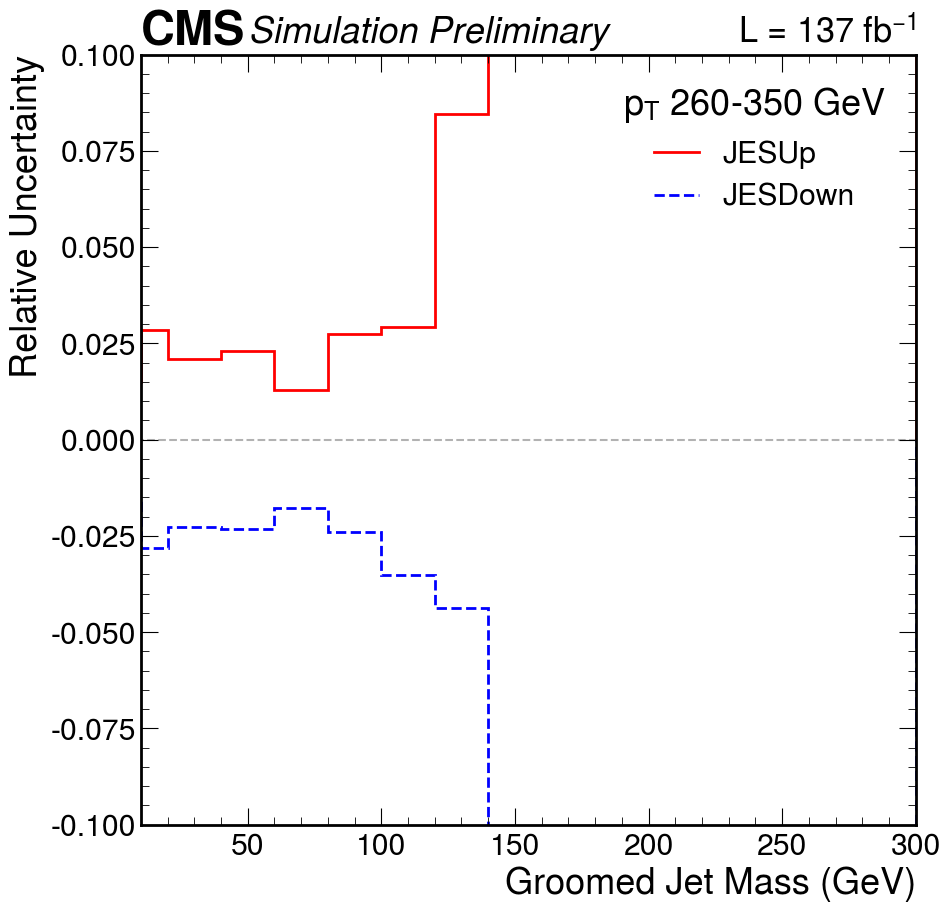

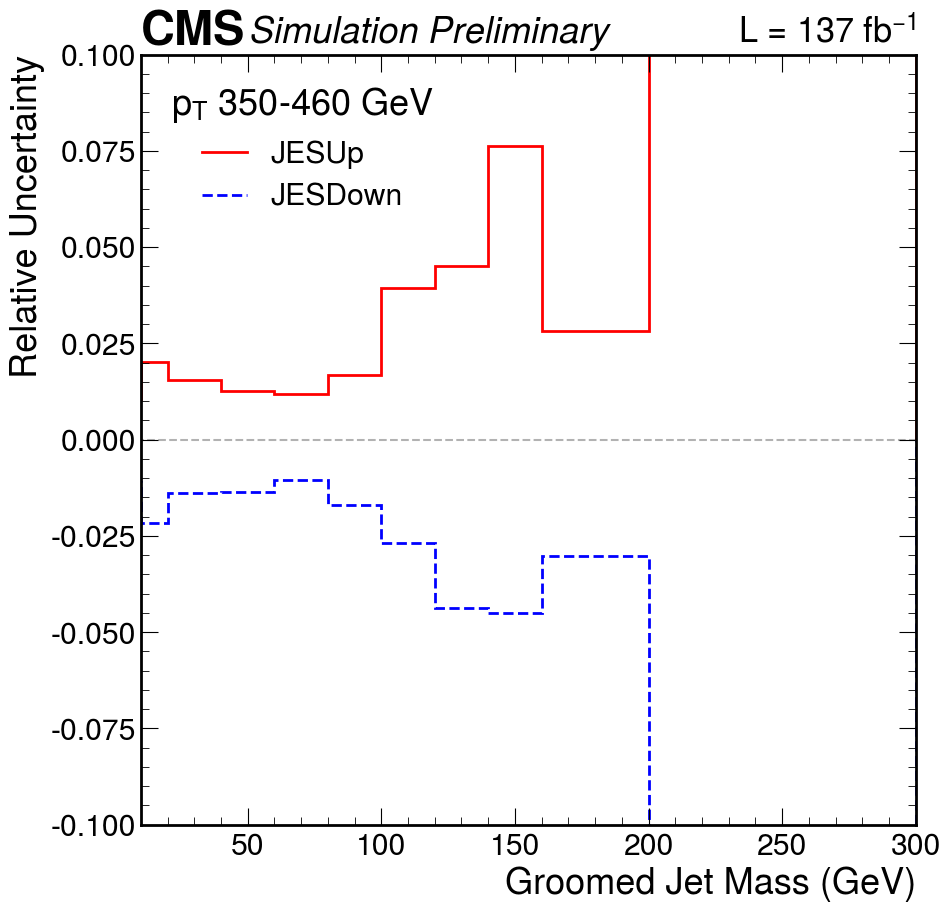

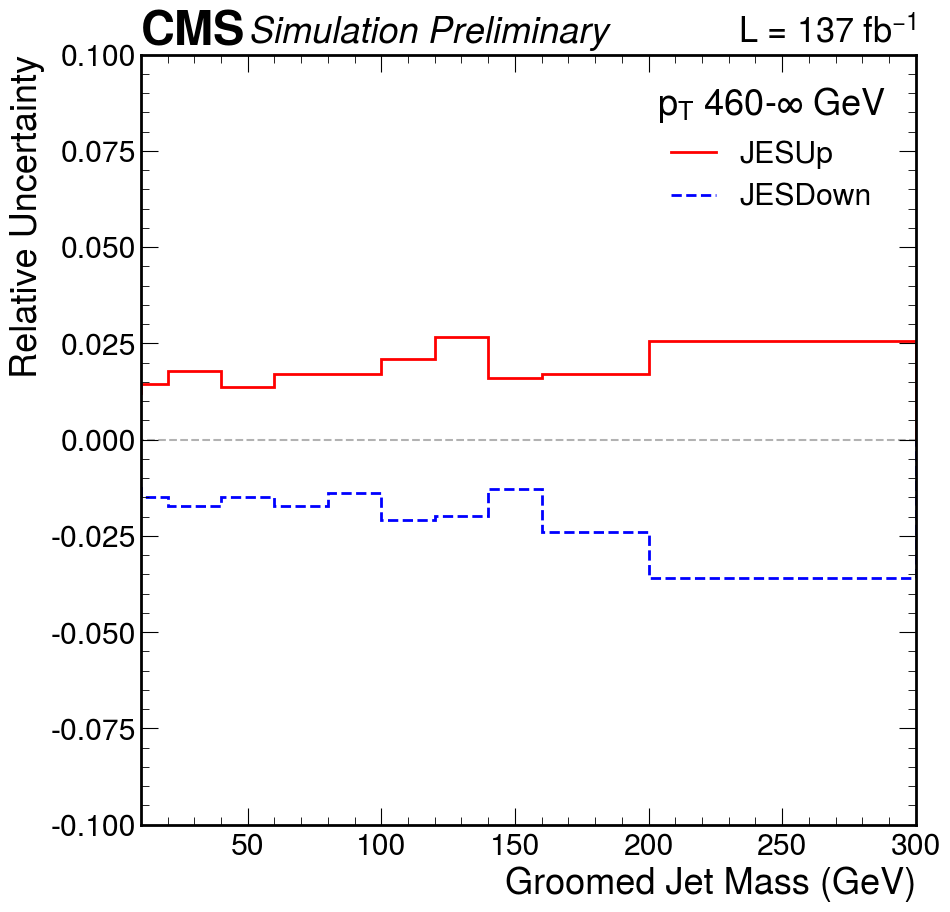

In [322]:
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
for i in range(4):
    plt.stairs(unfolder.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESUp" , color = 'red', lw = 2)
    plt.stairs(-unfolder_dn.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESDown", ls = '--' , color = 'blue', lw = 2)
    plt.hlines(0, 0, 300, color = 'k' , ls = '--', alpha = 0.3)
    plt.legend(title = title_list[i])
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    plt.ylim(-0.1, 0.1)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/jes_groomed_{i}.png', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/jes_ungroomed_{i}.png', dpi = 300)
        
    
    plt.show()

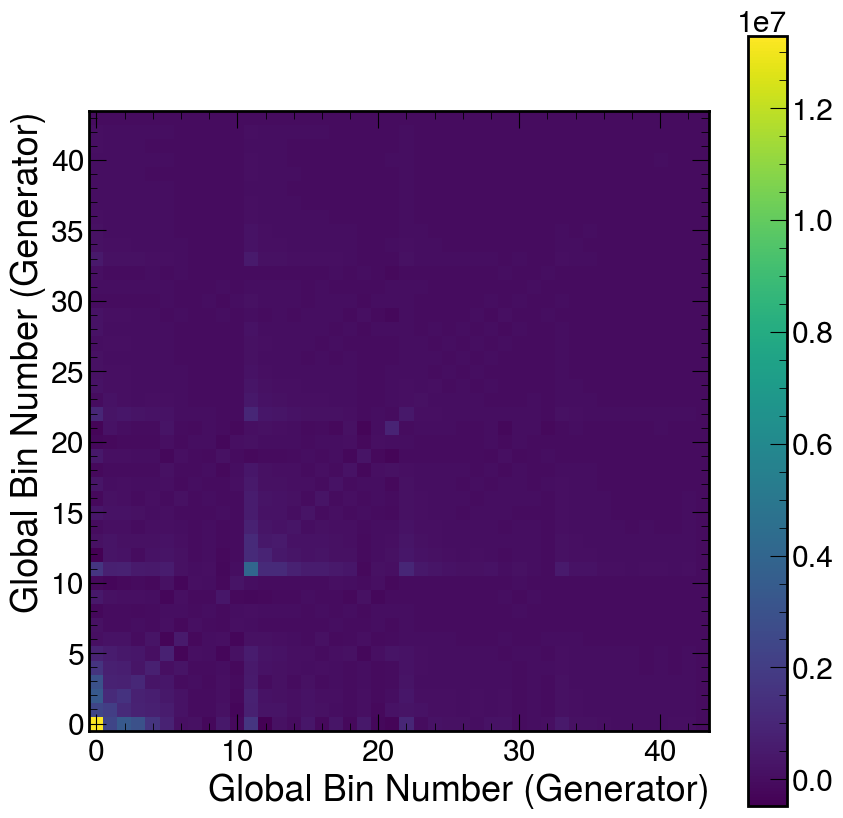

In [321]:
unfolder.plot_covariance()

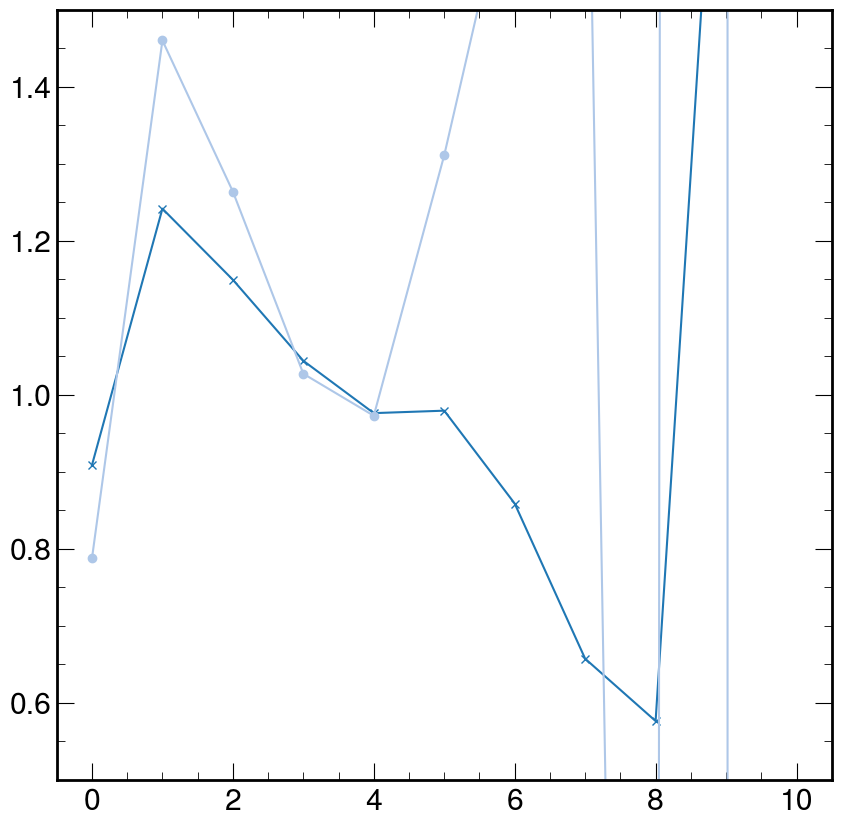

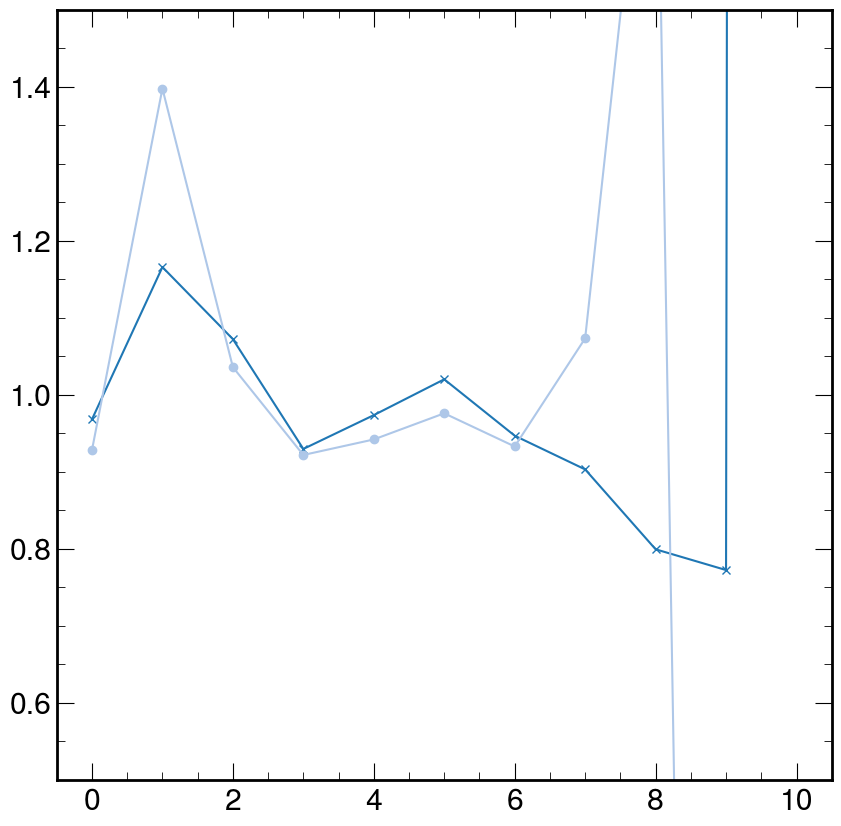

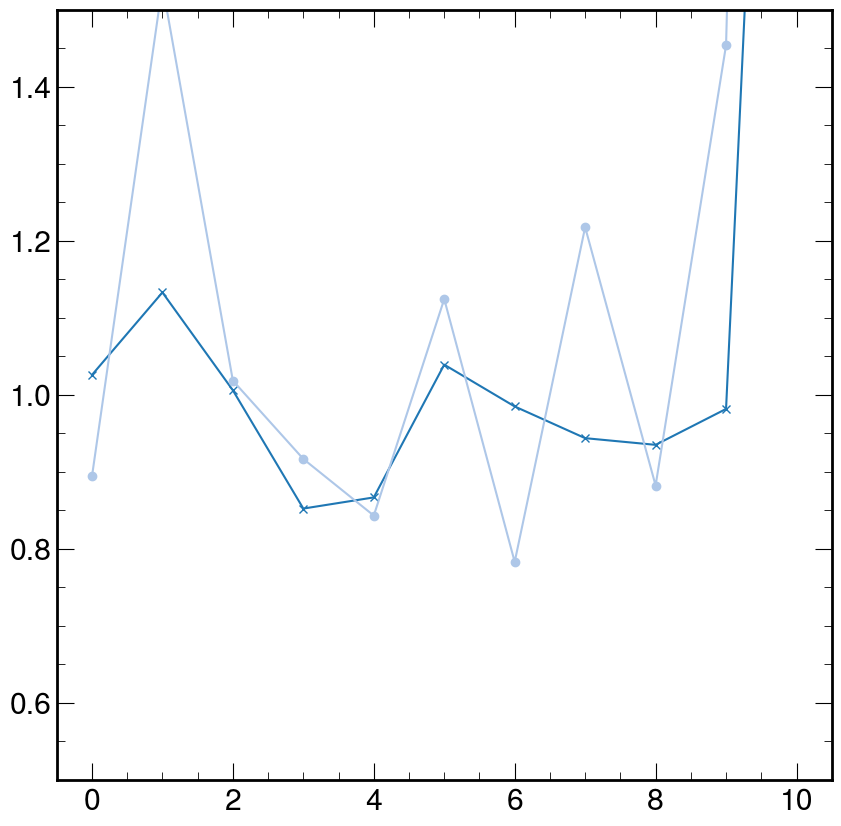

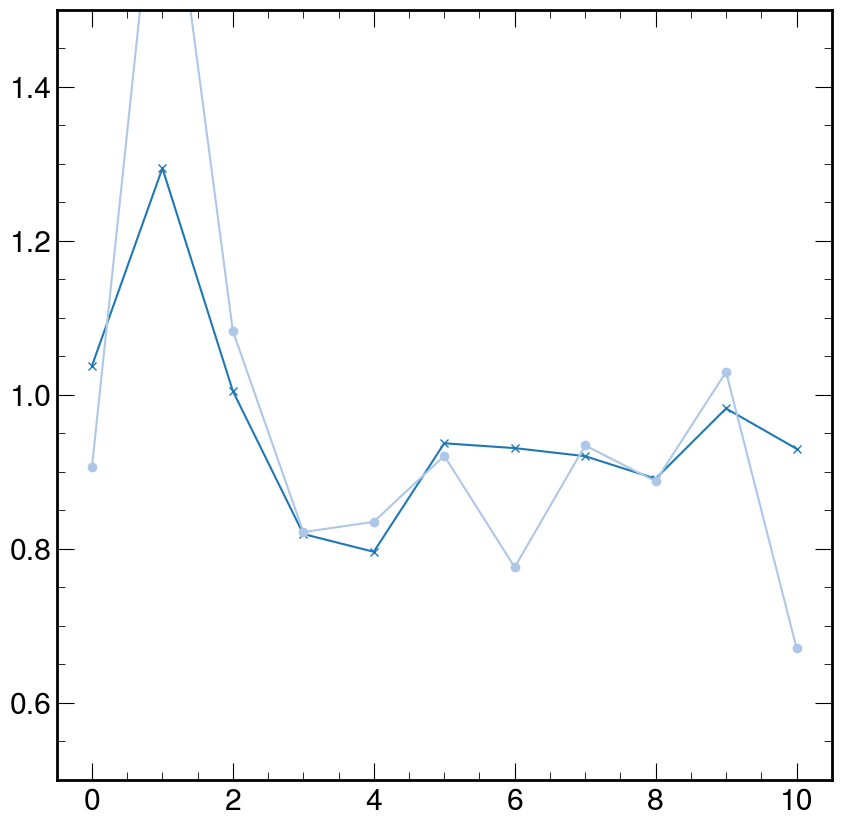

In [135]:
mc = resp_matrix_4d.project("ptgen", "mgen").values()
mc_reco =  resp_matrix_4d.project("ptreco", "mreco")[:, hist.rebin(2)].values()
mc_errors = resp_matrix_4d.project("ptgen", "mgen").variances()**0.5

for i in range(4):

    mc[i] = mc[i]/mc[i][:-1].sum()
    data_postunfold = unfolder.get_results()[0][i]/unfolder.get_results()[0][i][:-1].sum()
    data_preunfold = input_data.project("ptreco", "mreco")[i,hist.rebin(2)].values()/input_data.project("ptreco", "mreco")[i,hist.rebin(2)].values()[:-1].sum()
    
    plt.plot(data_preunfold/mc[i], marker = 'x')
    plt.plot(data_postunfold/mc[i], marker = 'o')
    plt.ylim(0.5,1.5)
    plt.show()


    

In [337]:
np.sqrt(input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values())

array([ 0.        ,  5.91607978, 39.68626967, 67.03730305, 62.68173578,
       49.50757518, 40.68169121, 33.346664  , 27.64054992, 31.25699922,
       25.21904043])

In [338]:
input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values()

array([   0.,   35., 1575., 4494., 3929., 2451., 1655., 1112.,  764.,
        977.,  636.])

In [179]:
input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values()

array([7082., 2107., 1994., 1191.,  897.,  855.,  741.,  648.,  544.,
        838.,  642.])

In [178]:
data_preunfold

array([0.40378585, 0.12013228, 0.11368949, 0.06790581, 0.05114317,
       0.0487485 , 0.0422487 , 0.03694623, 0.03101659, 0.04777923,
       0.03660414])

array([167.94579849, 152.49297941, 111.55689559,  87.57128213,
        84.14184977,  94.3893361 , 104.64845213, 112.07458232,
        99.9173807 ,  80.03818944,  40.84935345])

In [194]:
stat_unc[0]

array([113.09259547,  62.61628809,  84.4887324 ,  94.5312328 ,
       149.16019375, 147.48006396, 155.25555723,  42.54668862,
        35.1783477 ,  87.77163125, 142.30437054])

In [195]:
unfolder.stat_pt_binned[0]

array([764.68663851, 629.86152395, 532.57743005, 517.96794962,
       530.08398631, 533.13337305, 432.20443472, 204.68652888,
       113.17480353, 324.22250394, 289.56363426])

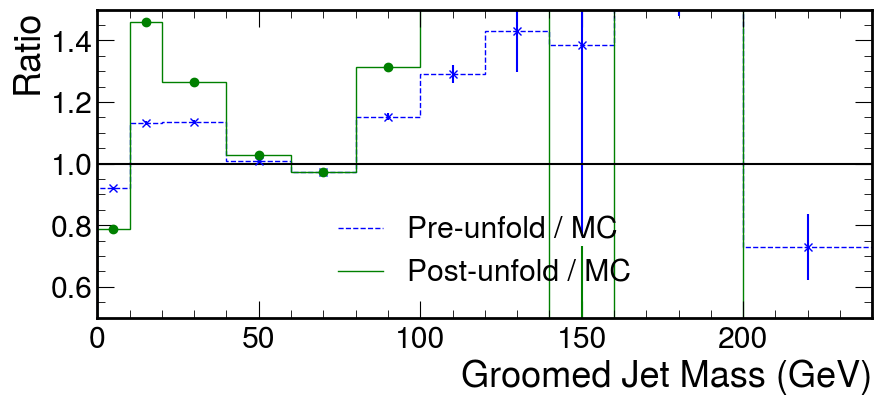

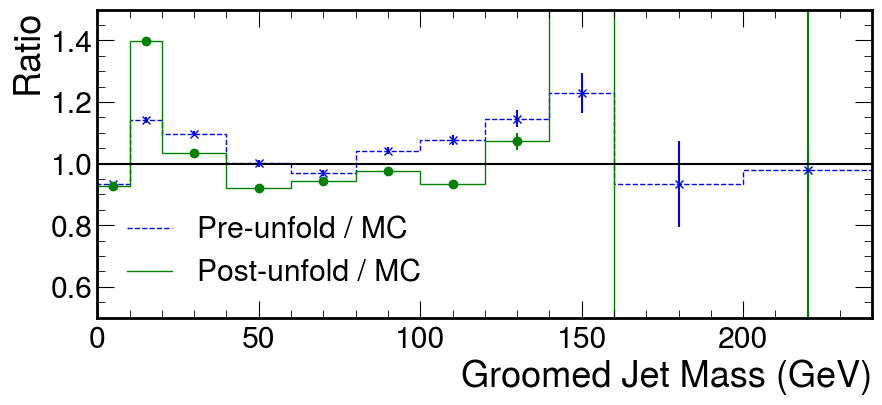

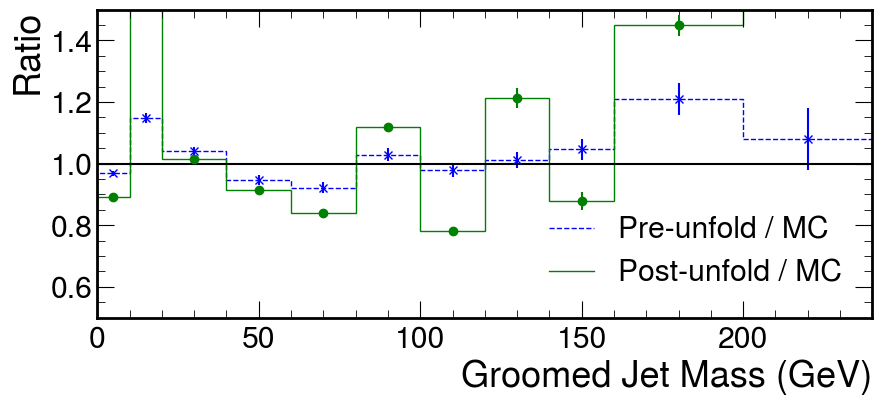

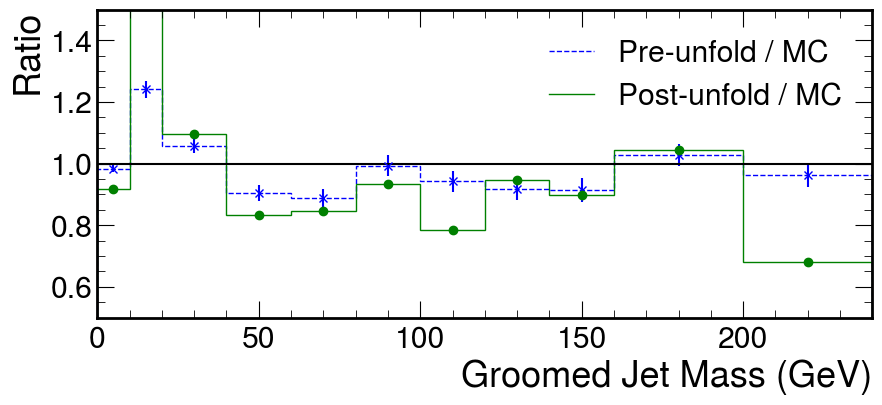

In [192]:
for i in range(4):
    # Normalize the distributions
    fig = plt.figure(figsize = (10,4))
    mc[i] = mc[i] / mc[i].sum()
    mc_reco[i] = mc_reco[i]/mc_reco[i].sum()
    data_postunfold = unfolder.get_results()[0][i] / unfolder.get_results()[0][i].sum()
    data_preunfold = input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values() / input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values().sum()

    # Calc`ulate uncertainties (example: Poisson sqrt)
    mc_unc = np.sqrt(mc[i]) / mc[i].sum()
    #post_unc = np.sqrt( unfolder.get_results()[0][i]) / unfolder.get_results()[0][i].sum()/mc[i]
    post_unc = stat_unc[i] / unfolder.get_results()[0][i].sum()/mc[i]
    pre_unc = np.sqrt( input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values()) /  input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values().sum()/mc_reco[i]

    # Plot using stairs with uncertainty bars
    plt.stairs(data_preunfold/mc_reco[i], edges=mgen_edge_mod, label='Pre-unfold / MC', color='blue', ls = '--')
    plt.errorbar((mgen_edge_mod[:-1] + mgen_edge_mod[1:]) / 2, data_preunfold/mc_reco[i], yerr=pre_unc,  fmt='x', color='blue')

    plt.stairs(data_postunfold/mc[i], edges=mgen_edge_mod, label='Post-unfold / MC', color='green')
    plt.errorbar((mgen_edge_mod[:-1] + mgen_edge_mod[1:]) / 2, data_postunfold/mc[i], yerr=post_unc, fmt='o', color='green')
    plt.hlines([1], 0, 240 , color = 'k')
    plt.ylim(0.5, 1.5)
    plt.xlim(0,240)
    if groomed:
        plt.xlabel('Groomed Jet Mass (GeV)')
    else:
        plt.xlabel('Ungroomed Jet Mass (GeV)')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()


In [183]:
herwig_input = resp_matrix_4d_herwig.project('ptreco', 'mreco')

In [186]:
jk_output_list = []
for i in range(10):
    if not groomed:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_u'][{'jk':i}]
        input_data = output_data['ptjet_mjet_u_reco']
        fakes_jk = fakes
        misses_jk = (9/10)*misses
        

    else:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_g'][{'jk':i}]
        input_data = output_data['ptjet_mjet_g_reco']
        fakes_jk = fakes
        misses_jk = (9/10)*misses

    unfolder_jk = Unfolder(input_data, resp_matrix_4d_jk[{'systematic':'nominal'}] , fakes_jk, misses_jk,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            #systematics = sys_matrix_dic_down,
                            systematics= None,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

    unfolder_jk.perform_unfold()
    jk_output_list.append(unfolder_jk.get_results()[0])
        
    # resp_matrix_4d_jk = resp_matrix_4d_jk[:,:,:hist.loc(131), : ,:hist.loc(121),:] 
    # resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:] = resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:].view() + resp_matrix_4d_jk[:,:,hist.loc(131), : ,:,:].view()
    # resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:] = resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:].view() + resp_matrix_4d_jk[:,:, :, : ,hist.loc(121),:].view()



11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
Working until background subtractions
Unfolder object created


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))


Regularisation USED ScanSURE
Tau value 5.131710407311695e-05
11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 5.0161235321779244e-05
11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 5.025194136020202e-05
11
[0.0e+0

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 88 input bins and 44 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #45
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 5/88 input bins have zero error, and are ignored.
Info in <TUnfoldDensity::ScanSURE>: logtau=-8.000000 Chi2A=428.115375 SU

In [190]:
jk_output_list = np.array(jk_output_list)

stat_unc = np.sqrt(10/9)*np.std(jk_output_list, axis = 0)

stat_unc.shape

(4, 11)

In [203]:
unfolder_herwig = Unfolder(input_data, resp_matrix_4d_herwig[{'systematic':'herwig'}] , fakes, misses,
                            backgrounds = None,
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            #systematics = sys_matrix_dic,
                            systematics= None,
                            closure = False,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

7
[    0.    20.    60.    80.   120.   140.   160. 13000.]
14
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 7.0e+01 8.0e+01 1.0e+02 1.2e+02
 1.3e+02 1.4e+02 1.5e+02 1.6e+02 2.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (56,)


In [204]:
unfolder_herwig.perform_unfold(0.00)

Working until background subtractions
Unfolder object created
Regularisation USED Custom
Tau value 0.0
Output Underflow 0.0, output overflow 0.0
335354.54547229124
368879.1827593976


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 4 output bins do not depend on the input data  0 6-7 29
Info in <TUnfold::TUnfold>: 56 input bins and 26 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[200,260]:massgen[140,160])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[200,260]:massgen[160,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #29
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal reg

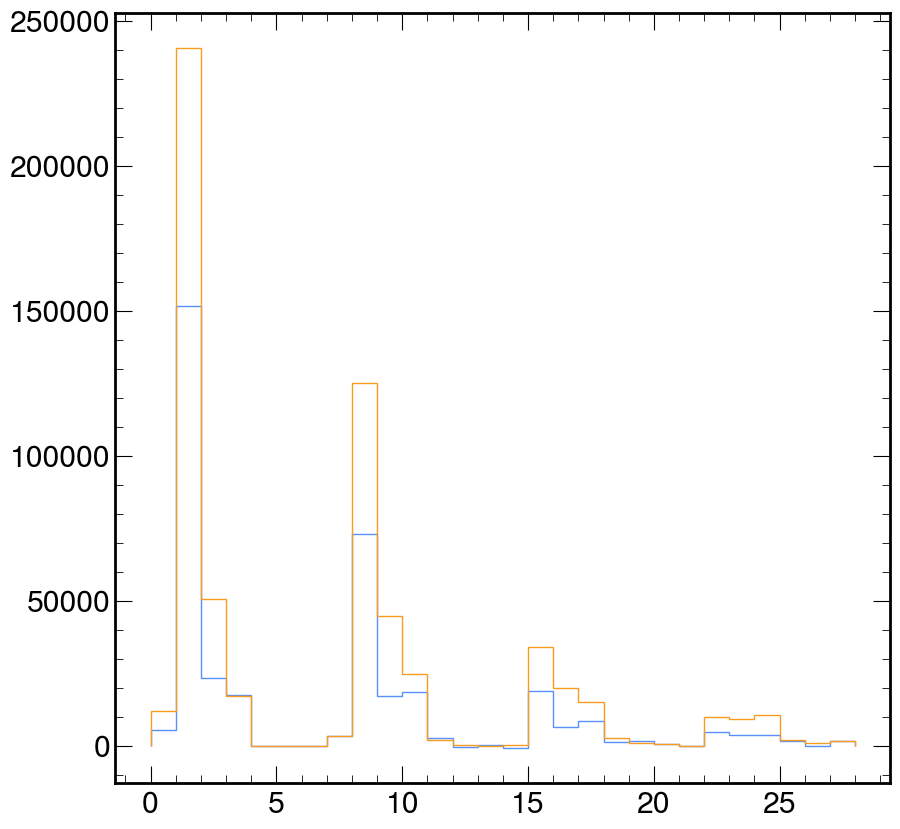

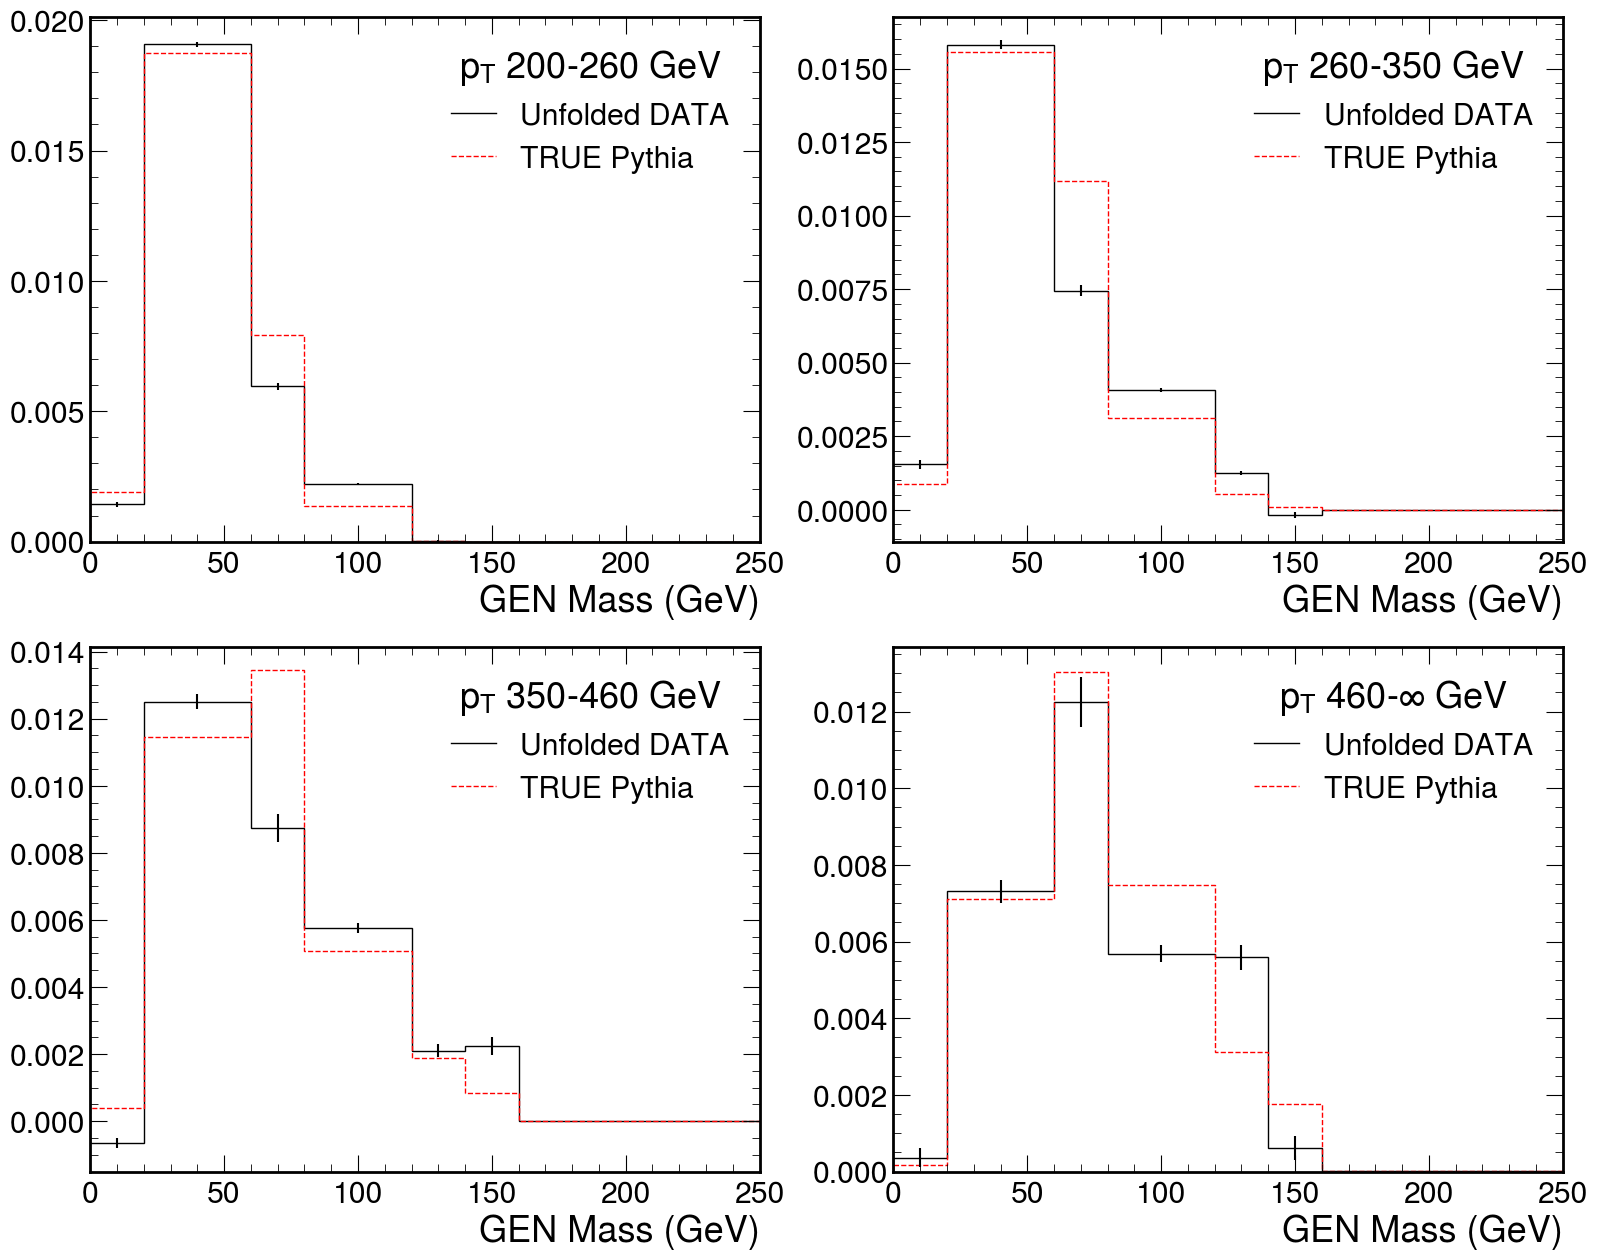

In [205]:
unfolder_herwig.plot_unfolded()

In [35]:
def make_comparison_plot(data1, unc1, data2, unc2, x_edges):
    """
    Create a two-panel figure:
      - Top: data1 (stepped line + shaded uncertainty) vs. data2 (points with error bars)
      - Bottom: (data2/data1 - 1) vs. x, with a band showing the fractional uncertainty of data1.

    Parameters
    ----------
    data1 : array-like
        Central values for the first (nominal) distribution in each bin.
    unc1 : array-like
        Uncertainties for the first (nominal) distribution in each bin.
    data2 : array-like
        Central values for the second (alternative) distribution in each bin.
    unc2 : array-like
        Uncertainties for the second (alternative) distribution in each bin.
    x_edges : array-like
        The bin edges in x (length should be len(data1)+1).

    Returns
    -------
    fig : matplotlib.figure.Figure
    (ax_top, ax_bot) : tuple of matplotlib.axes.Axes
        The top and bottom axes, respectively.
    """

    # Compute bin centers
    x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    
    # Create the figure and subplots with a ratio of heights
    fig, (ax_top, ax_bot) = plt.subplots(
        2, 1, sharex=True,
        gridspec_kw={"height_ratios": [3, 1]},

    )
    
    # -- Top Panel --
    # Plot data1 as a step curve
    ax_top.step(
        x_edges, np.append(data1, data1[-1]),  # for step(..., where='post') we often repeat last value
        where='post', color='black', label="Unfolded PYTHIA"
    )
    # Add a shaded band for the uncertainty on data1
    lower1 = data1 - unc1
    upper1 = data1 + unc1
    ax_top.fill_between(
        x_edges,
        np.append(lower1, lower1[-1]),
        np.append(upper1, upper1[-1]),
        step='post', color='gray', alpha=0.5
    )
    
    # Plot data2 with error bars
    ax_top.errorbar(
        x_centers, data2, yerr=unc2, fmt='o', color='orange', label="Unfolded herwig7"
    )
    
    # Set y-scale to log
    #ax_top.set_yscale('log')
    
    # -- Bottom Panel --
    # Compute ratio (data2 / data1) minus 1
    # Protect against division by zero just in case:
    ratio = np.zeros_like(data1, dtype=float)
    valid_bins = (data1 != 0.0)
    ratio[valid_bins] = data2[valid_bins] / data1[valid_bins]
    ratio_minus_1 = ratio - 1.0
    
    # Uncertainty band around data1 in the ratio panel:
    # data1 itself in the ratio panel is effectively 1.0,
    # so the band is ± (unc1 / data1). We'll plot that around 0.0 (i.e. ratio_minus_1 = 0).
    band = np.zeros_like(data1, dtype=float)
    band[valid_bins] = unc1[valid_bins] / data1[valid_bins]
    
    # Plot the nominal ratio line (which is 0 in "ratio_minus_1" space) plus the band
    ax_bot.axhline(0, color='black', lw=1)
    ax_bot.fill_between(
        x_edges,
        np.append(-band, -band[-1]),
        np.append(band, band[-1]),
        step='post', color='gray', alpha=0.5
    )
    
    # Compute uncertainties on data2/data1
    #   ratio_err^2 = (unc2/data1)^2 + (data2*unc1 / data1^2)^2
    ratio_err = np.zeros_like(data1, dtype=float)
    ratio_err[valid_bins] = np.sqrt(
        (unc2[valid_bins]/data1[valid_bins])**2 +
        (data2[valid_bins]*unc1[valid_bins]/(data1[valid_bins]**2))**2
    )
    
    # Plot data2/data1 - 1 with error bars
    ax_bot.errorbar(
        x_centers, ratio_minus_1, yerr=ratio_err, fmt='o', color='orange'
    )
    
    # Some reasonable y-limits for the bottom panel
    ax_bot.set_ylim(-0.2, 0.5)
    
    # Remove extra spacing
    plt.tight_layout(h_pad=0.0)
    
    return fig, (ax_top, ax_bot)

In [36]:
output_pythia, unc_pythia, _ = unfolder.get_results()

output_herwig, _, unc_herwig = unfolder_herwig.get_results()

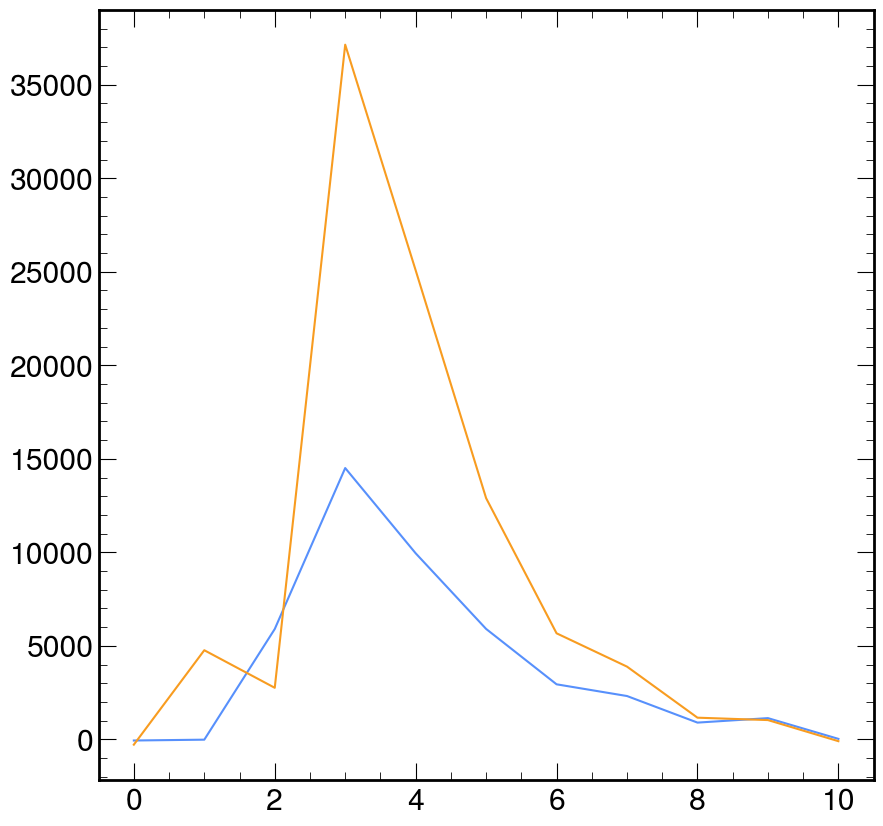

In [37]:
plt.plot(output_pythia[2])
plt.plot(output_herwig[2])

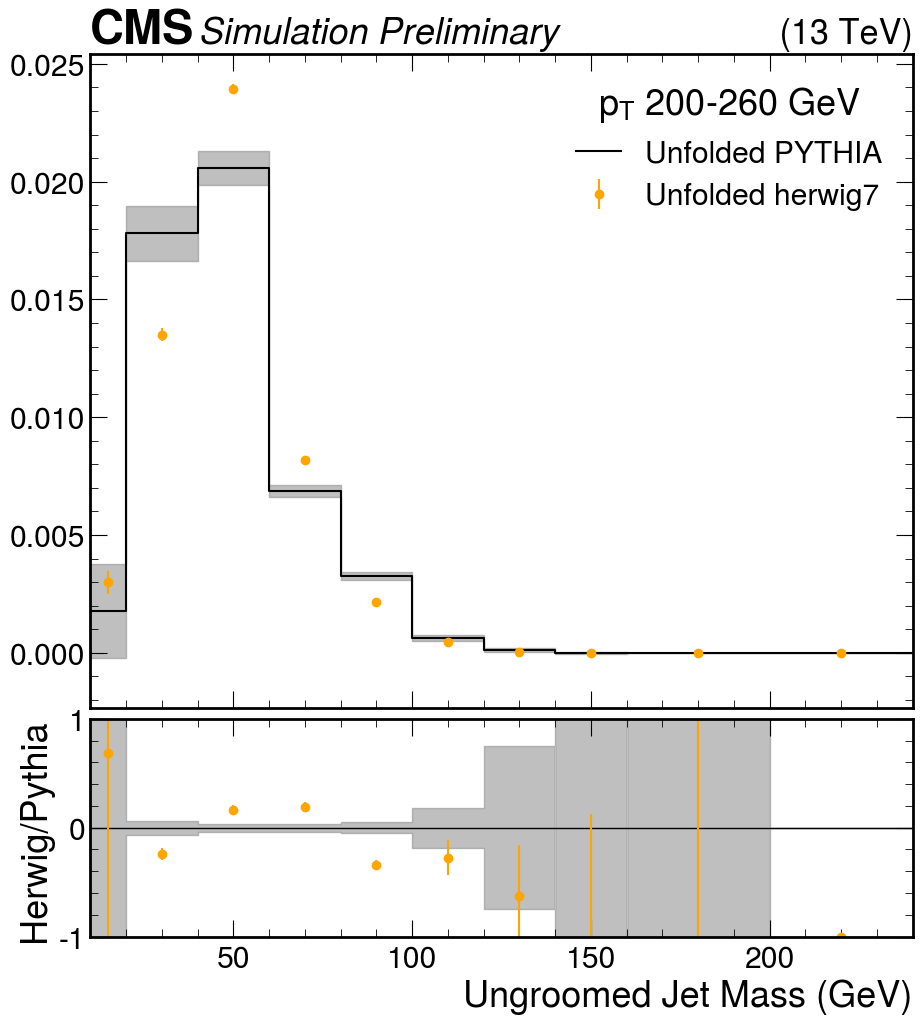

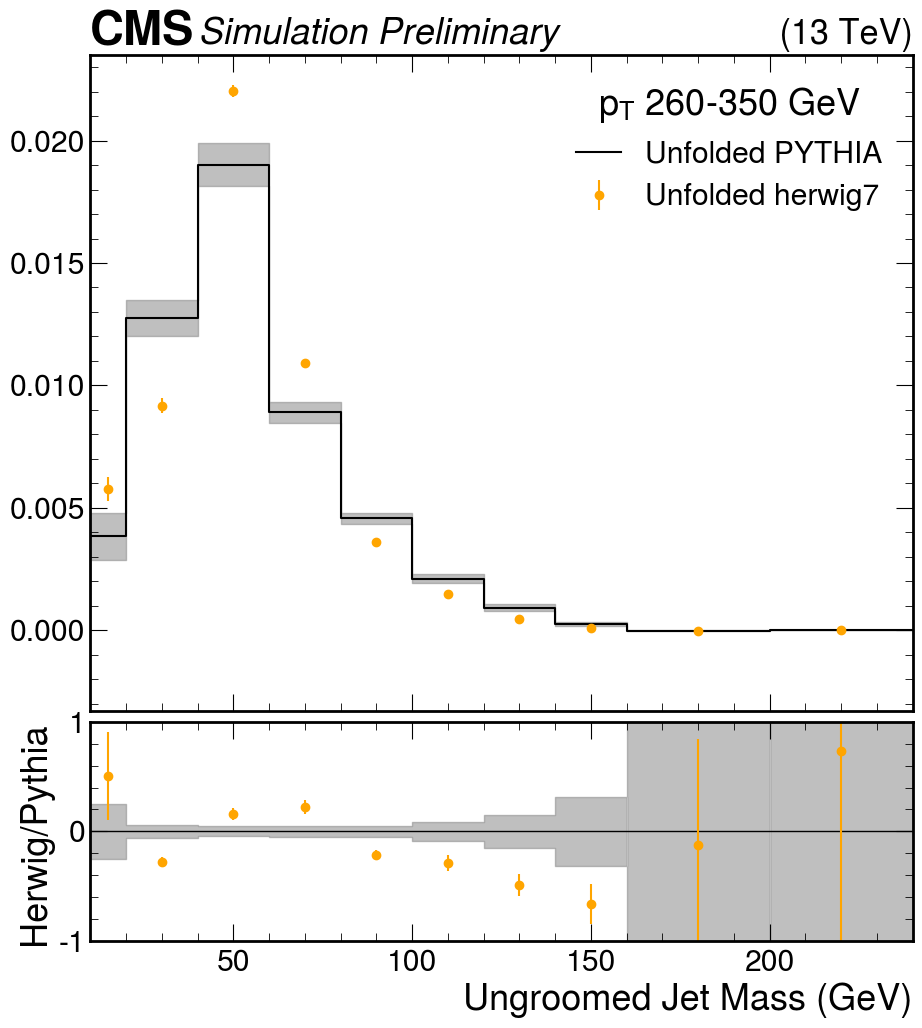

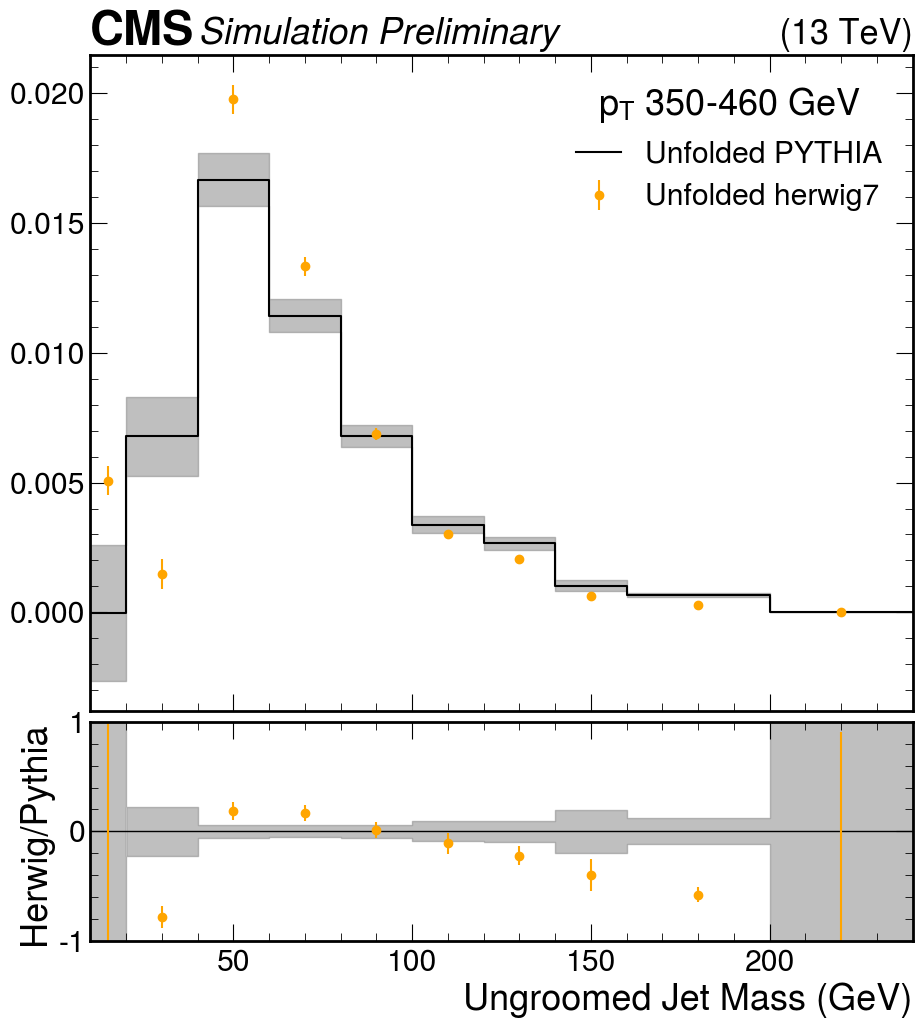

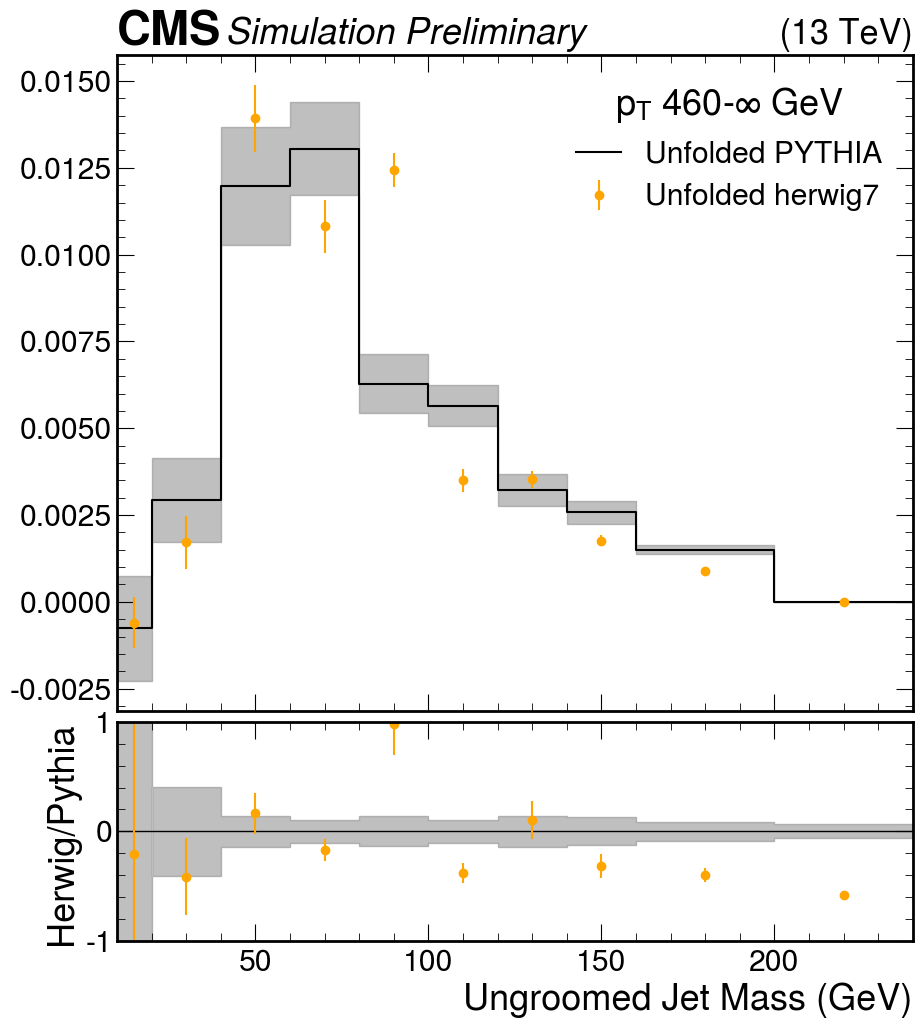

In [39]:
mgen_edge_mod = mgen_edge.copy()
mgen_edge_mod[-1] = 240
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]

for i in range(4):
    fig, (ax1, ax2) = make_comparison_plot(
            output_pythia[i]/mgen_width/output_pythia[i].sum(), unc_pythia[i]/mgen_width/output_pythia[i].sum(),
            output_herwig[i]/mgen_width/output_herwig[i].sum(), unc_herwig[i]/mgen_width/output_herwig[i].sum(),
            mgen_edge_mod
        )
    
    ax2.set_ylim(-1, 1)
    ax1.set_xlim(10,240)
    ax1.legend(title = title_list[i])
    if groomed:
        ax2.set_xlabel("Groomed Jet Mass (GeV)")

    else:
        ax2.set_xlabel("Ungroomed Jet Mass (GeV)")
    ax2.set_ylabel("Herwig/Pythia")
    hep.cms.label("Preliminary", ax = ax1)


array([3557.07287804, 1273.41933458, 1109.98653681,  870.02408462,
        627.27237339,  573.21719733,  340.35177569,  180.44672931,
        145.95089535,  330.41783166,  259.82928687, 1943.12535991,
        840.49449666,  616.40033462,  426.08832   ,  348.35693786,
        345.2875767 ,  283.24930074,  264.97992798,  216.03019528,
        227.03484313,  405.8049245 ,  585.60322532,  267.4979203 ,
        178.10231173,  114.13001958,   91.9310388 ,  116.47685781,
        125.09352344,  130.57837088,  105.3316633 ,   74.93288112,
         67.44625344,  284.42694547,  136.61203208,  101.93314389,
         53.74330609,   44.68348154,   38.47419324,   41.48419656,
         44.03366788,   34.38530408,   52.25366485,   23.36122549])

In [211]:
 resp_matrix_4d.axes['mgen'].edges

array([0.0e+00, 1.0e+01, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
       1.2e+02, 1.4e+02, 1.6e+02, 2.0e+02, 1.3e+04])

In [207]:
widths

array([1.00e+01, 1.00e+01, 2.00e+01, 2.00e+01, 2.00e+01, 2.00e+01,
       2.00e+01, 2.00e+01, 2.00e+01, 4.00e+01, 1.28e+04])

In [208]:
data_list = []
for ipt in range(4):
    edges = [1.00e+01, 1.00e+01, 2.00e+01, 2.00e+01, 2.00e+01, 2.00e+01,
       2.00e+01, 2.00e+01, 2.00e+01, 4.00e+01, 1.28e+04]
    y_data =  resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen')[ipt, :].values()
    
    y_data = y_data/y_data.sum()

    y2_data = unfolder.get_results()[0][ipt]
    y2_data = y2_data/y2_data.sum()
    up = unfolder.get_results()[1][ipt]
    down = unfolder_dn.get_results()[1][ipt]
    stat_unc_up = stat_unc[i]
    data_list.append([edges, y2_data, stat_unc_up, up, down, y_data])
    

ValueError: Size mismatch between "values" and "edges". Expected `len(values) + 1 == len(edges)`, but `len(values) = 7` and `len(edges) = 7`.

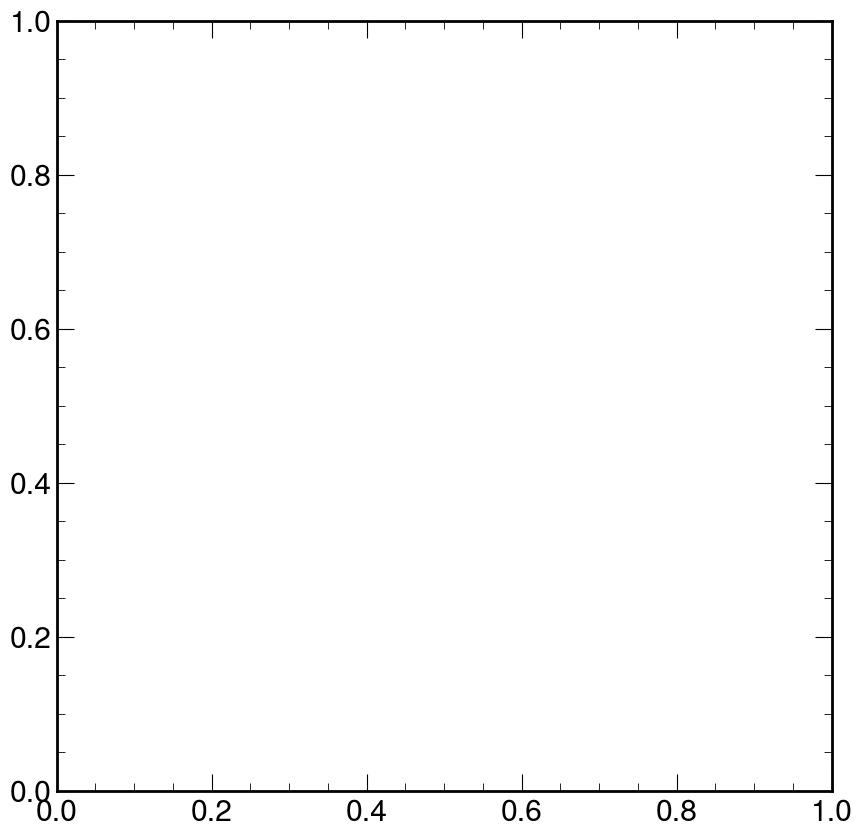

In [209]:
markers = ['o', 's', 'D', '^', 'v']
ptbinsGen = ptgen_edge
ipt = 0 
for i in range(4):
    x_data = resp_matrix_4d.axes['mgen'].centers  
    widths = resp_matrix_4d.axes['mgen'].widths
    if not groomed:
        if i == 3:
            x_data = [5.0e+00, 1.5e+01, 40,  7.0e+01, 100,
       1.3e+02, 1.5e+02, 1.8e+02, 225]
#widths = resp_matrix_4d.axes['mgen'].widths
            widths = [10,10,40,20,40,20,20, 40, 12540]
        
    
    power_text = r'$\times 10^{{{}}}$'.format(i)
    pt_text = r'$p_T$ '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + ' GeV ' + power_text
    ipt = ipt + 1
    if i==0:
        plt.stairs(np.array(data_list[i][1][:-4])*(10**i), data_list[i][0][:-4], color = 'black' )
        plt.plot(x_data[:-4], np.array(data_list[i][1][:-4])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    elif i==1:
        plt.stairs(np.array(data_list[i][1][:-3])*(10**i), data_list[i][0][:-3], color = 'black' )
        plt.plot(x_data[:-3], np.array(data_list[i][1][:-3])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
        
    else:    
        plt.stairs(np.array(data_list[i][1])*(10**i), data_list[i][0], color = 'black' )   
            
        plt.plot(x_data, np.array(data_list[i][1])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    plt.xlim(0,100)
    plt.yscale('log')
    plt.ylim(10**-5, 60)
    plt.xlim(20, 200)
    plt.ylim()
    widths[-1] = 20
    if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        #custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    plt.xlabel(xlabel)
    plt.ylabel( ylabel)
    
    sys_up = np.array(data_list[i][3])*10**i 
    sys_down = np.array(data_list[i][4])*10**i 
    tot_up = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)
    tot_down = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)

    if i ==0:
        plt.bar(x_data[:-4], # x
            2*np.array(data_list[i][2][:-4])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - (np.array(data_list[i][2][:-4])*(10**i)), color='b',  width=widths[:-4], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-4])*10**i)
        plt.bar(x_data[:-4], # x
            tot_up[:-4] + tot_down[:-4], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - tot_down[:-4], color = 'cyan', width=widths[:-4], label='Total Unc')
    elif i ==1:
        idx = 3
        plt.bar(x_data[:-idx], # x
            2*np.array(data_list[i][2][:-idx])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - (np.array(data_list[i][2][:-idx])*(10**i)), color='b',  width=widths[:-idx], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-idx])*10**i)
        plt.bar(x_data[:-idx], # x
            tot_up[:-idx] + tot_down[:-idx], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - tot_down[:-idx], color = 'cyan', width=widths[:-idx], label='Total Unc')
    else:
        plt.bar(x_data, # x
            2*np.array(data_list[i][2])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - (np.array(data_list[i][2])*(10**i)), color='b',  width=widths, label='Stat. Unc.')
        print(np.array(data_list[i][2])*10**i)
        plt.bar(x_data, # x
            tot_up + tot_down, # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - tot_down, color = 'cyan', width=widths, label='Total Unc')
for i in range(4):  
    if i == 0:
        idx = 4
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    elif i == 1:
        idx = 3
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    else:

        plt.stairs(np.array(data_list[i][5][:])*(10**i), data_list[i][0][:], color = 'red', label = ' PYTHIA', lw = 2  )
handles, labels = plt.gca().get_legend_handles_labels()
        
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
labels.append(custom_text)

# Add legend with the custom entry
hep.cms.label("Preliminary", data = 1)
by_label = dict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(), fontsize = 12)